In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import colors
from numpy.ma import masked_invalid
from time import time
from tqdm import tqdm

from util import decode_npy

In [56]:
# relevant constants
DF = pd.read_csv('../data/main_table.csv')
DF = DF.loc[DF.w_median.notnull()]
DF_S82 = pd.read_csv('../data/main_table_S82.csv')
DF_S82 = DF_S82.loc[DF_S82.w_median.notnull()]

FIGURE_PATH = '../figures'

W_MEDIAN_COLNAME = 'w_median'
W_MEAN_COLNAME = 'w_mean'
SGW_COLNAME = 'w_rrms'
W_STD_COLNAME = 'w_std'

D_MEDIAN_COLNAME = 'D_median'
D_MEAN_COLNAME = 'D_mean'
SGD_COLNAME = 'D_rrms'
D_STD_COLNAME = 'D_std'

d_MEDIAN_COLNAME = 'd_median'
d_MEAN_COLNAME = 'd_mean'
SGd_COLNAME = 'd_rrms'
d_STD_COLNAME = 'd_std'

R_MAG_COLNAME  = 'psfMag_r'
G_MAG_COLNAME  = 'psfMag_g'
U_MAG_COLNAME  = 'psfMag_u'
GAIA_G_COLNAME = 'phot_g_mean_mag'

CN = '#f6af00'
CV = '#800080'
CQ = '#007e53'

MIN_W, MAX_W = 0, 2
MIN_SGW, MAX_SGW = 0, 0.5
S = 4

In [3]:
# plot fontsize settings

SMALL_FONT_SIZE = 22
MEDIUM_FONT_SIZE = 28
LARGE_FONT_SIZE = 28

plt.rc('font', size=SMALL_FONT_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_FONT_SIZE)   # fontsize of the figure title

In [4]:
RES = 100
bins_std = np.linspace(0, 0.5, RES)
bins_avg = np.linspace(0, 2, RES)

AN = 1 #0.15
AV = 1 #0.3
AQ = 1 #0.5

# whole sky

## full resolution, linear

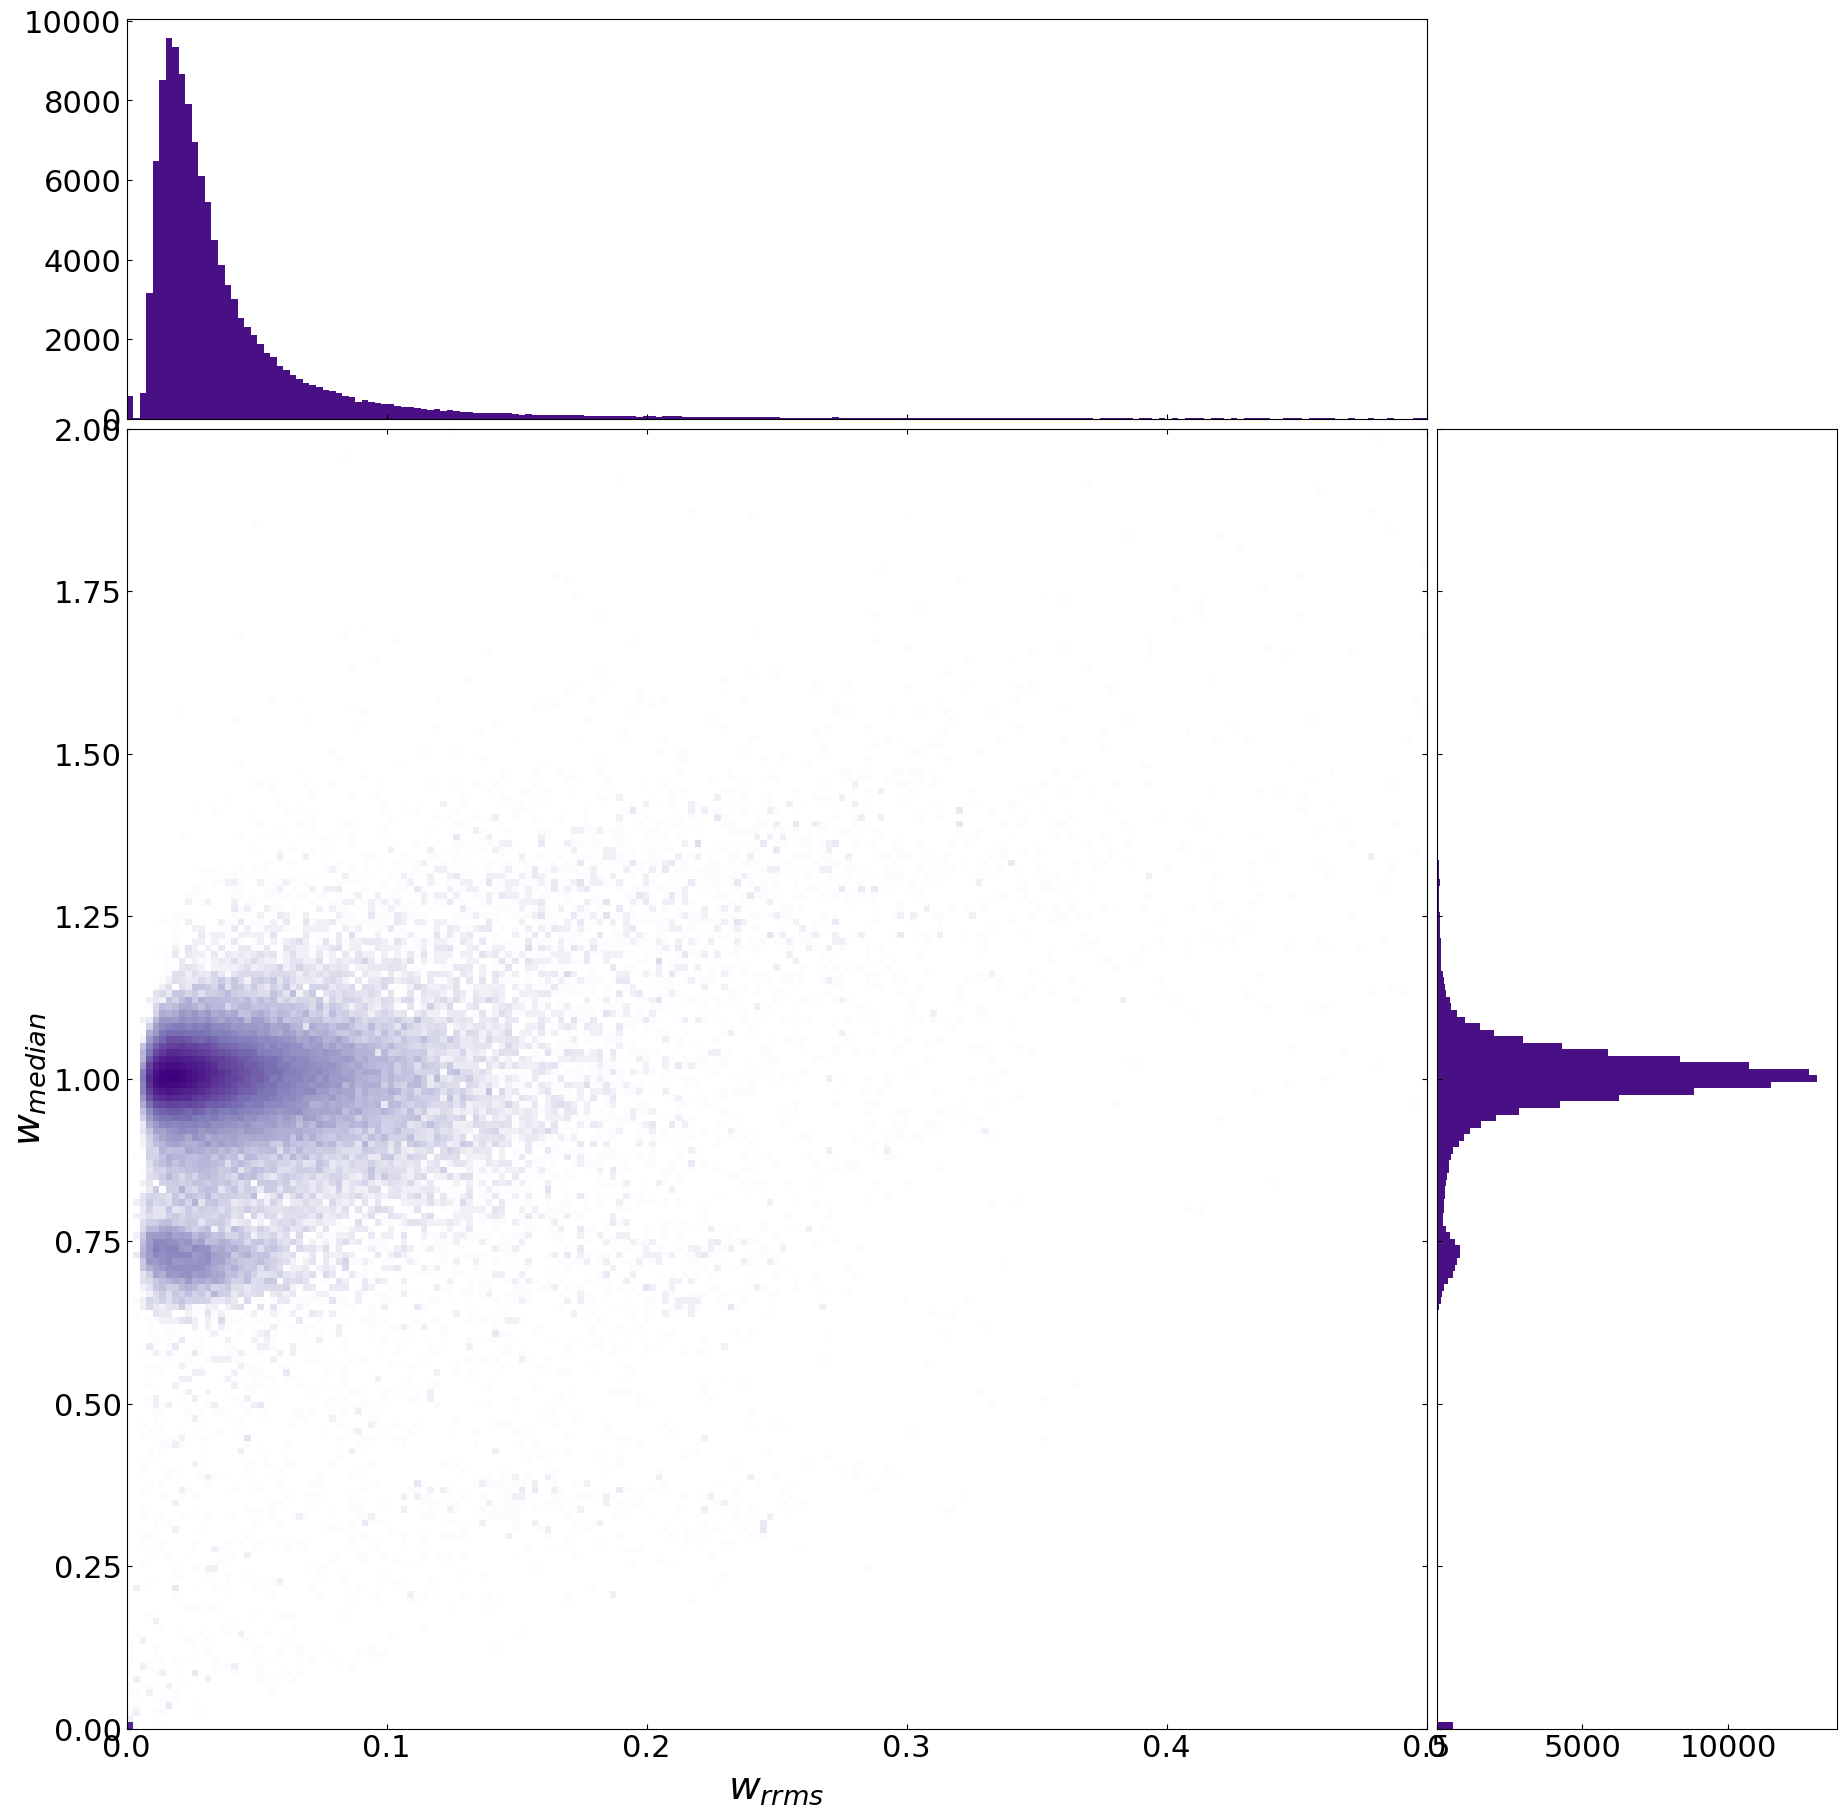

In [5]:
plt.figure(figsize=(20, 20))

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]


ax_main = plt.axes(rect_scatter)
ax_main.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)


ax_main.set_xlim(MIN_SGW, MAX_SGW)
ax_main.set_ylim(MIN_W, MAX_W)

ax_main.set_xlabel('$w_{rrms}$')
ax_main.set_ylabel('$w_{median}$')

# main 2d histogram
bins_std_4pi = np.linspace(0, 0.5, RES*2)
bins_avg_4pi = np.linspace(0, 2, RES*2)
hist, _, _ = np.histogram2d(DF[SGW_COLNAME], DF[W_MEDIAN_COLNAME],
                            bins=(bins_std_4pi, bins_avg_4pi))

ax_main.pcolormesh(bins_std_4pi, bins_avg_4pi, hist.T, cmap='Purples', norm='log')

# marginal histograms
ax_histx.hist(DF[SGW_COLNAME], bins=bins_std_4pi, color='#481084')
ax_histy.hist(DF[W_MEDIAN_COLNAME], bins=bins_avg_4pi, orientation='horizontal', color='#481084')

ax_histx.set_xlim(ax_main.get_xlim())
ax_histy.set_ylim(ax_main.get_ylim())

# plt.scatter(DF[SGW_COLNAME], DF[W_MEDIAN_COLNAME], c='xkcd:violet',  s=S, alpha=0.2)
# plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
# plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

# plt.legend()

plt.savefig('../figures/ww_hist_fullres_lin.png', dpi=600)
plt.show()

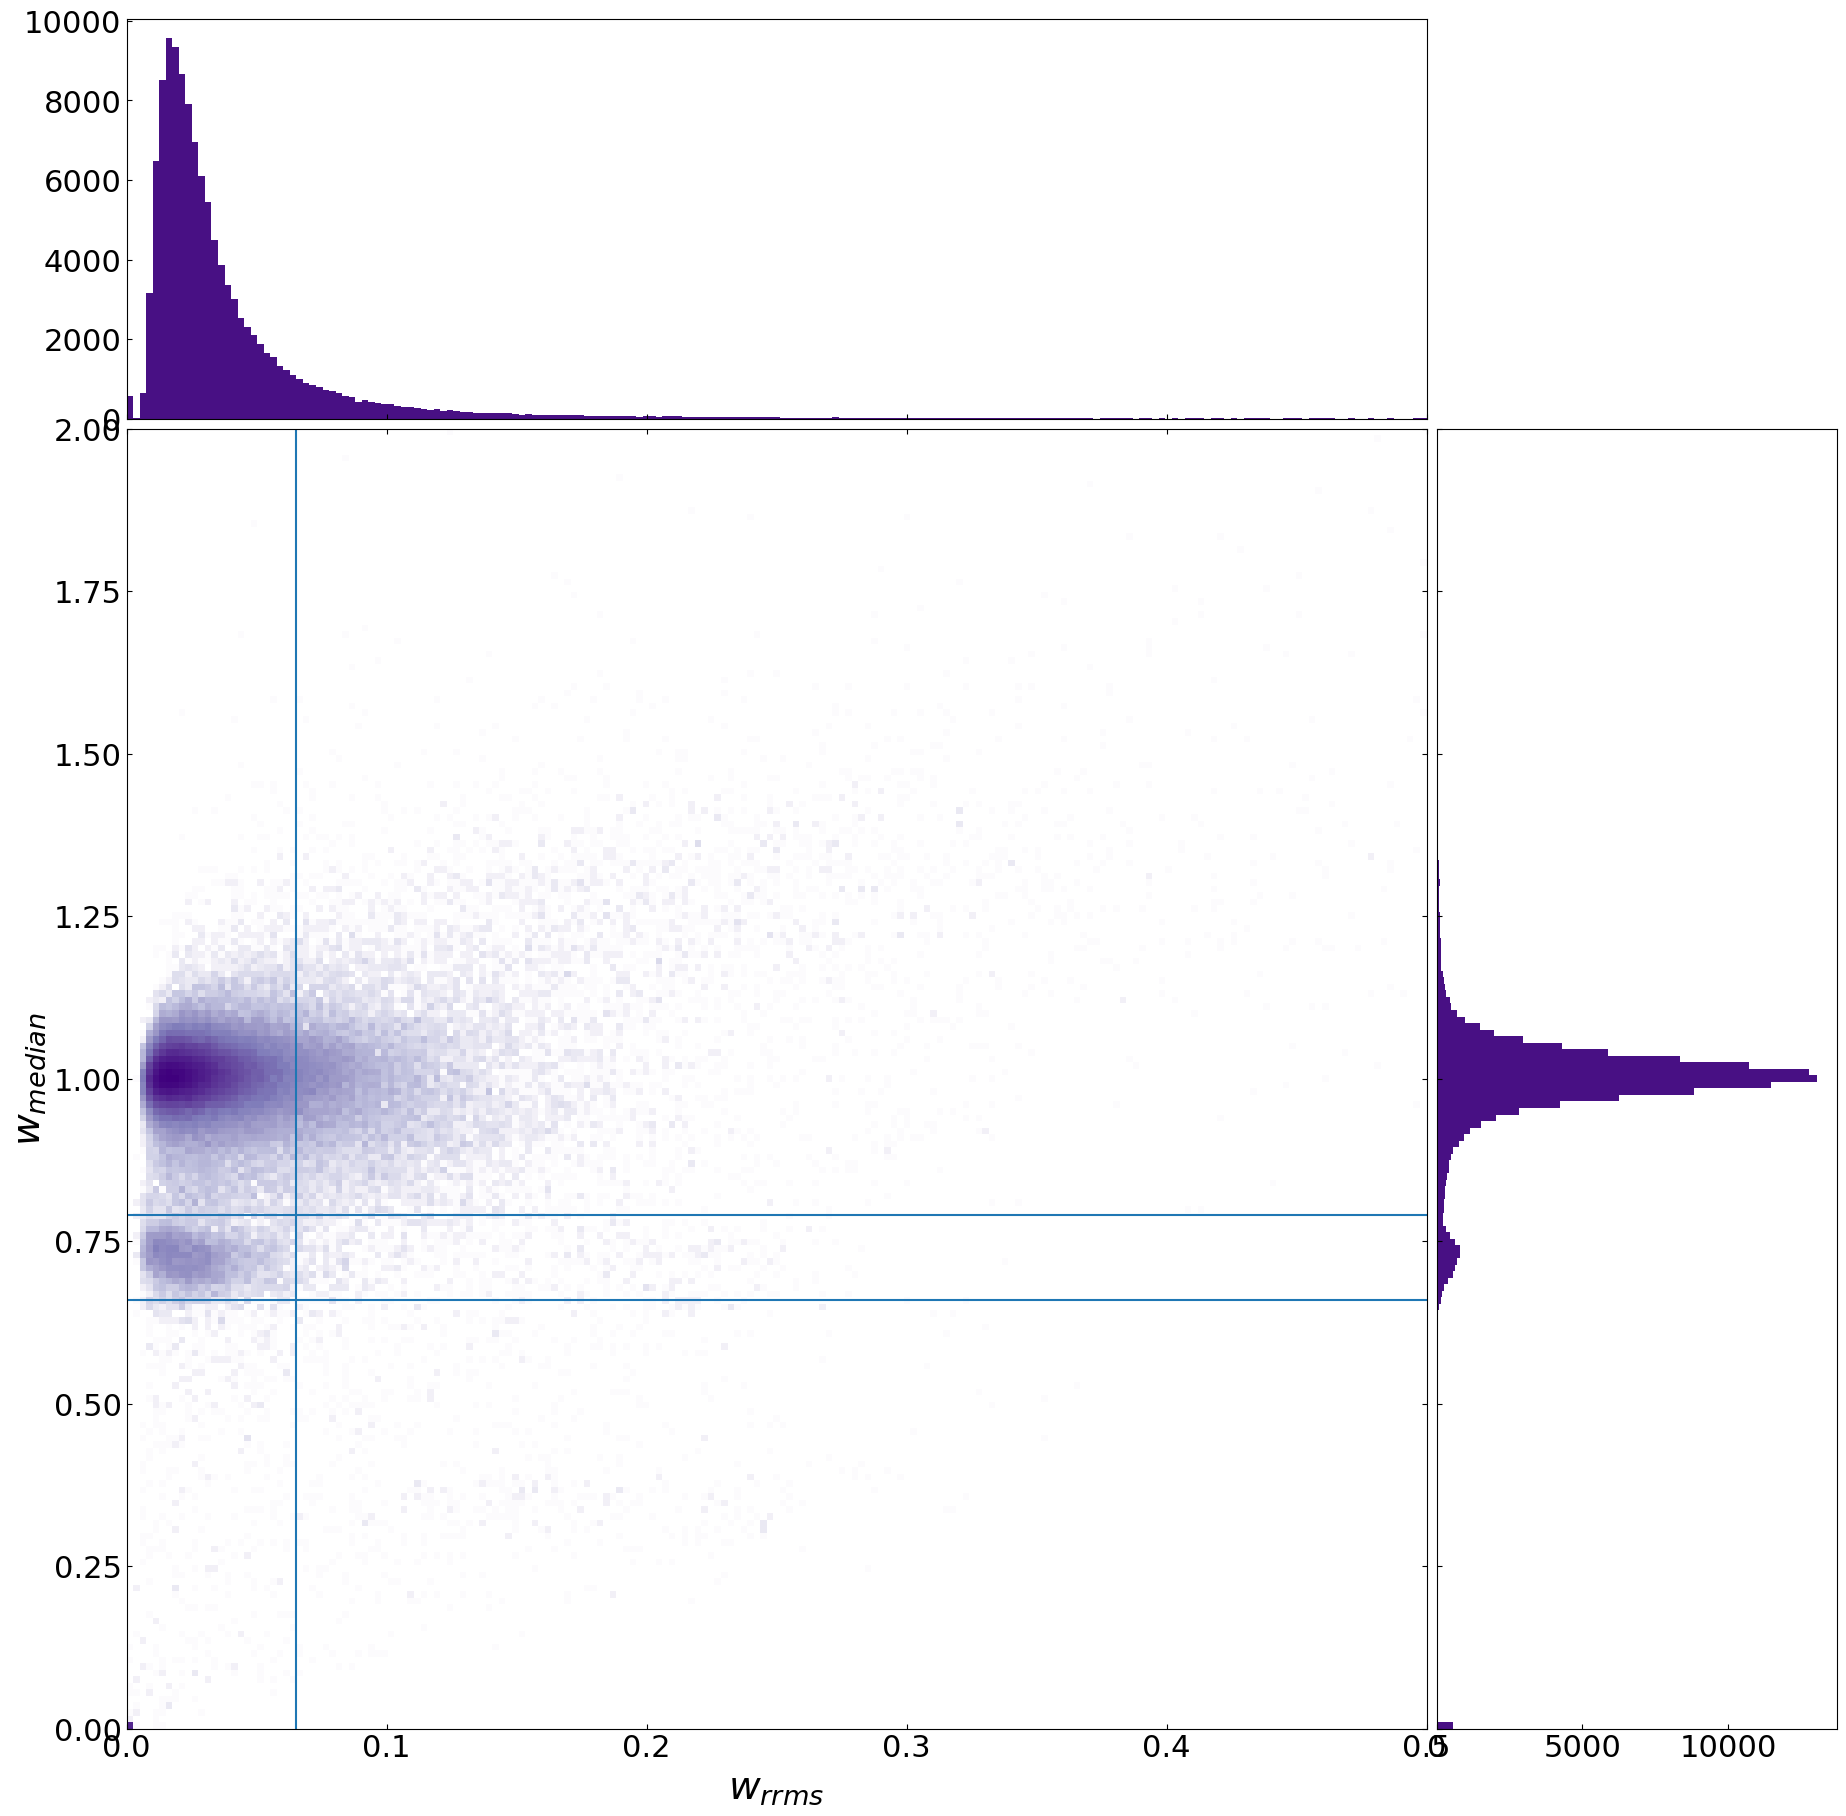

In [6]:
plt.figure(figsize=(20, 20))

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]


ax_main = plt.axes(rect_scatter)
ax_main.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)


ax_main.set_xlim(MIN_SGW, MAX_SGW)
ax_main.set_ylim(MIN_W, MAX_W)

ax_main.set_xlabel('$w_{rrms}$')
ax_main.set_ylabel('$w_{median}$')

# main 2d histogram
bins_std_4pi = np.linspace(0, 0.5, RES*2)
bins_avg_4pi = np.linspace(0, 2, RES*2)
hist, _, _ = np.histogram2d(DF[SGW_COLNAME], DF[W_MEDIAN_COLNAME],
                            bins=(bins_std_4pi, bins_avg_4pi))

ax_main.pcolormesh(bins_std_4pi, bins_avg_4pi, hist.T, cmap='Purples', norm='log')

# marginal histograms
ax_histx.hist(DF[SGW_COLNAME], bins=bins_std_4pi, color='#481084')
ax_histy.hist(DF[W_MEDIAN_COLNAME], bins=bins_avg_4pi, orientation='horizontal', color='#481084')

ax_histx.set_xlim(ax_main.get_xlim())
ax_histy.set_ylim(ax_main.get_ylim())

# plt.scatter(DF[SGW_COLNAME], DF[W_MEDIAN_COLNAME], c='xkcd:violet',  s=S, alpha=0.2)
# plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
# plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

# plt.legend()

ax_main.axvline(0.065)
ax_main.axhline(0.79)
ax_main.axhline(0.66)

plt.savefig('../figures/ww_hist_fullres_lin.png', dpi=600)
plt.show()

In [7]:
LIM_MODE_RMS_UPPER = 0.065
LIM_MODE_MED_LOWER = 0.66
LIM_MODE_MED_UPPER = 0.79

In [8]:
gMr = lambda x: x[G_MAG_COLNAME] - x[R_MAG_COLNAME]
uMg = lambda x: x[U_MAG_COLNAME] - x[G_MAG_COLNAME]

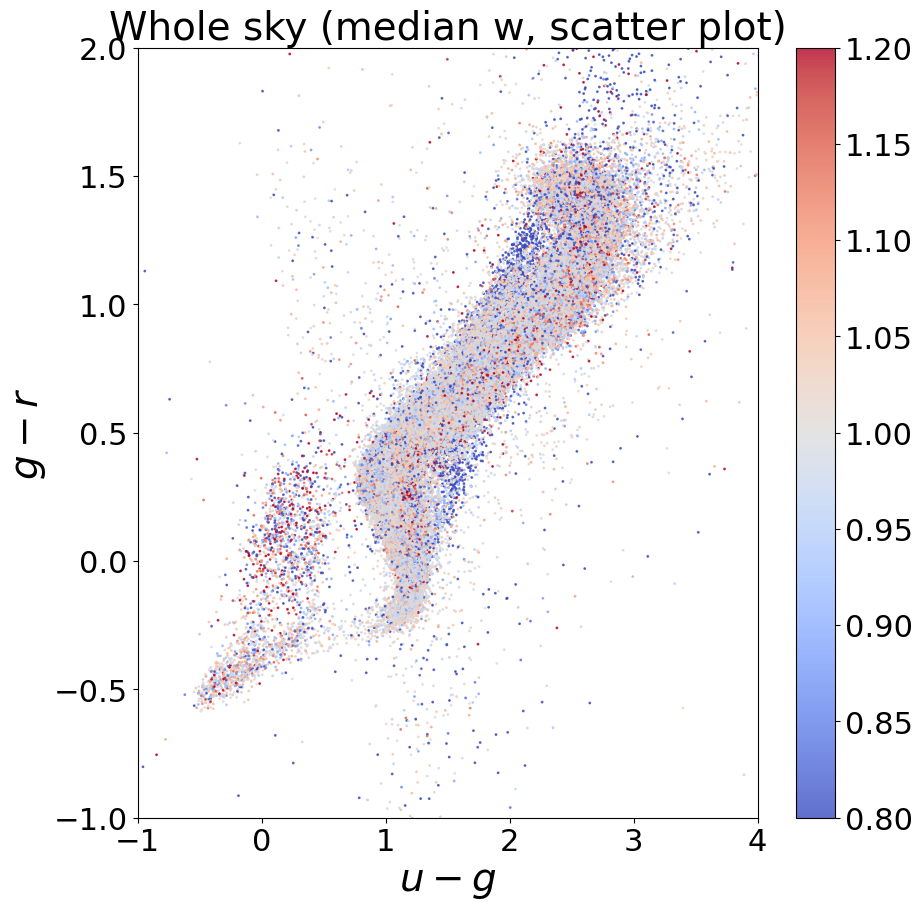

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
W_MAX = 1.2
W_MIN = 0.8

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (median w, scatter plot)')

sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
                cmap='coolwarm', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_scatter.png', dpi=600)

plt.show()

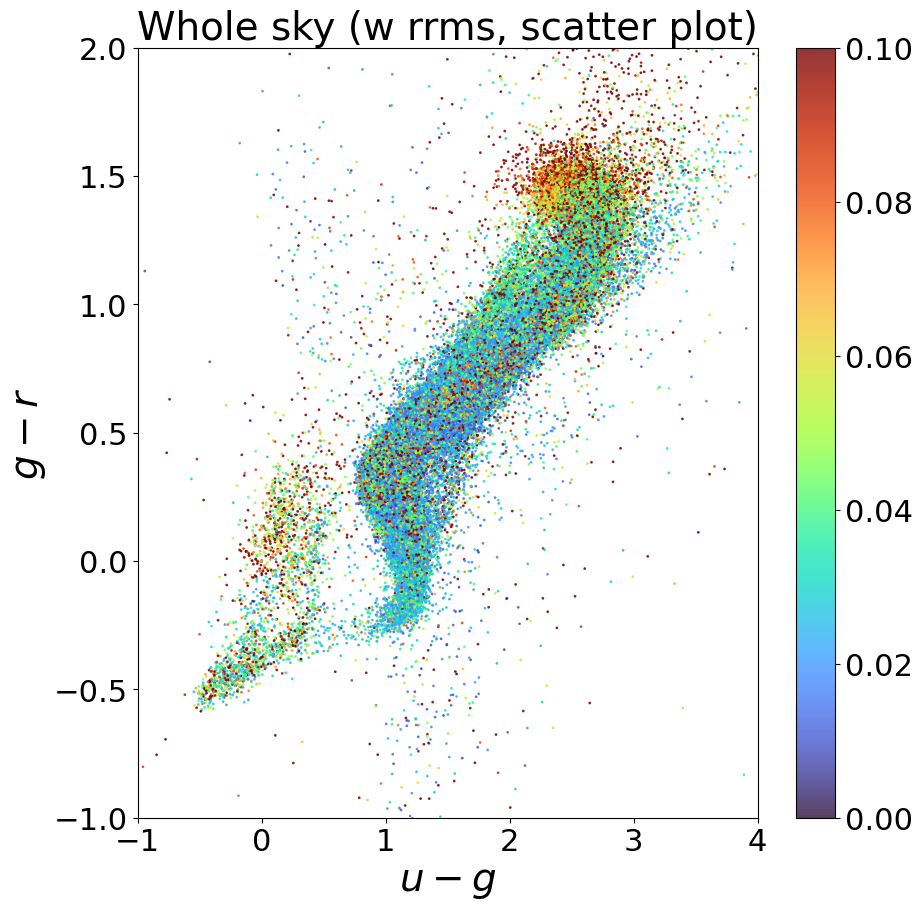

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
WR_MAX = 0.1
WR_MIN = 0.0

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (w rrms, scatter plot)')

sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
                cmap='turbo', c=DF[SGW_COLNAME], vmin=WR_MIN, vmax=WR_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_scatter_rrms.png', dpi=600)

plt.show()

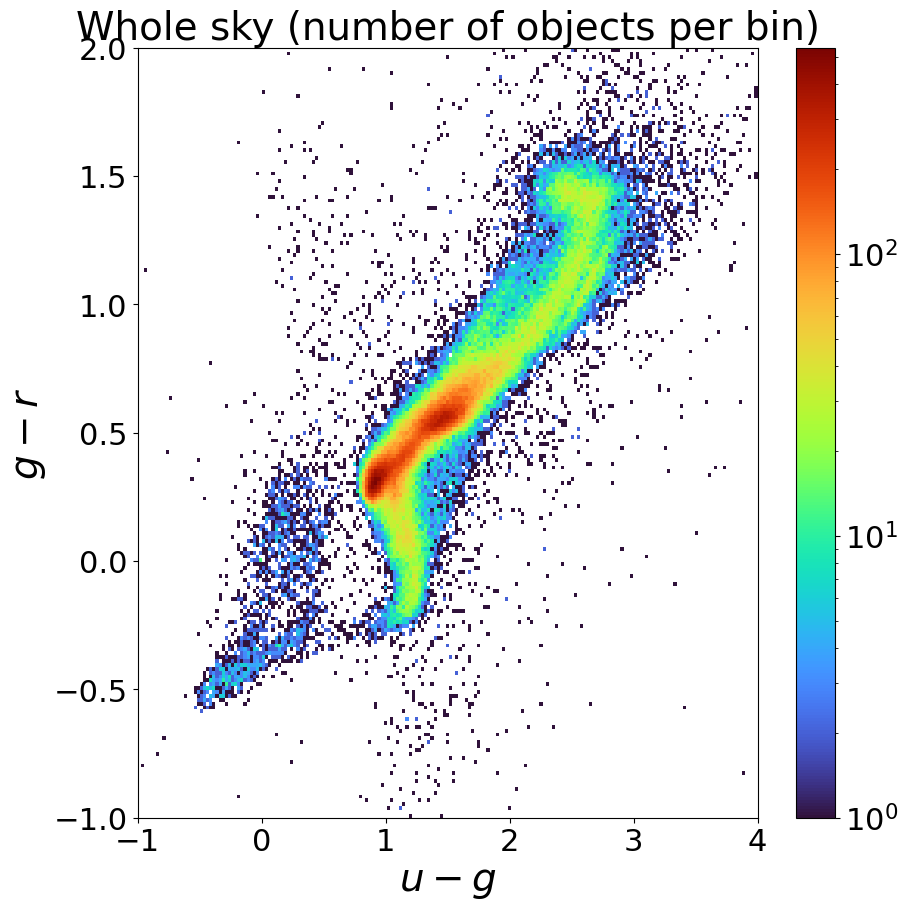

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
W_MAX = 1.2
W_MIN = 0.8

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (number of objects per bin)')


bins_gMr = np.linspace(-1, 2, RES*2)
bins_uMg = np.linspace(-1, 4, RES*2)
hist, _, _ = np.histogram2d(uMg(DF), gMr(DF), bins=(bins_uMg, bins_gMr))

sc = ax.pcolormesh(bins_uMg, bins_gMr, hist.T, cmap='turbo', norm='log')

# sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
#                 cmap='BrBG', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_histogram_number.png', dpi=600)

plt.show()

/tmp/ipykernel_303221/3104790177.py:16: RuntimeWarning: invalid value encountered in divide
  hist_median = np.histogram2d(uMg(DF), gMr(DF), bins=(bins_uMg, bins_gMr), weights=DF[W_MEDIAN_COLNAME])[0]/hist


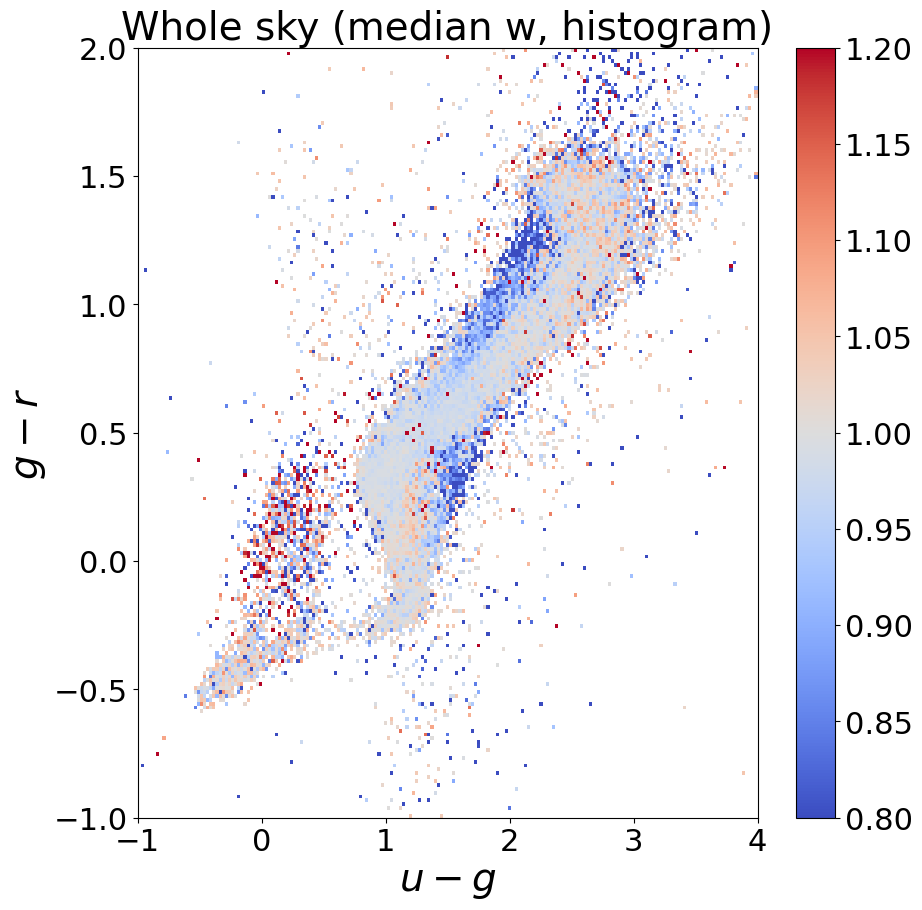

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
W_MAX = 1.2
W_MIN = 0.8

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (median w, histogram)')


bins_gMr = np.linspace(-1, 2, RES*2)
bins_uMg = np.linspace(-1, 4, RES*2)
hist_median = np.histogram2d(uMg(DF), gMr(DF), bins=(bins_uMg, bins_gMr), weights=DF[W_MEDIAN_COLNAME])[0]/hist

sc = ax.pcolormesh(bins_uMg, bins_gMr, hist_median.T, cmap='coolwarm', norm='linear', vmin=W_MIN, vmax=W_MAX)

# sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
#                 cmap='BrBG', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_histogram_median.png', dpi=600)

plt.show()

/tmp/ipykernel_303221/397419419.py:16: RuntimeWarning: invalid value encountered in divide
  hist_median = np.histogram2d(uMg(DF), gMr(DF), bins=(bins_uMg, bins_gMr), weights=DF[SGW_COLNAME])[0]/hist


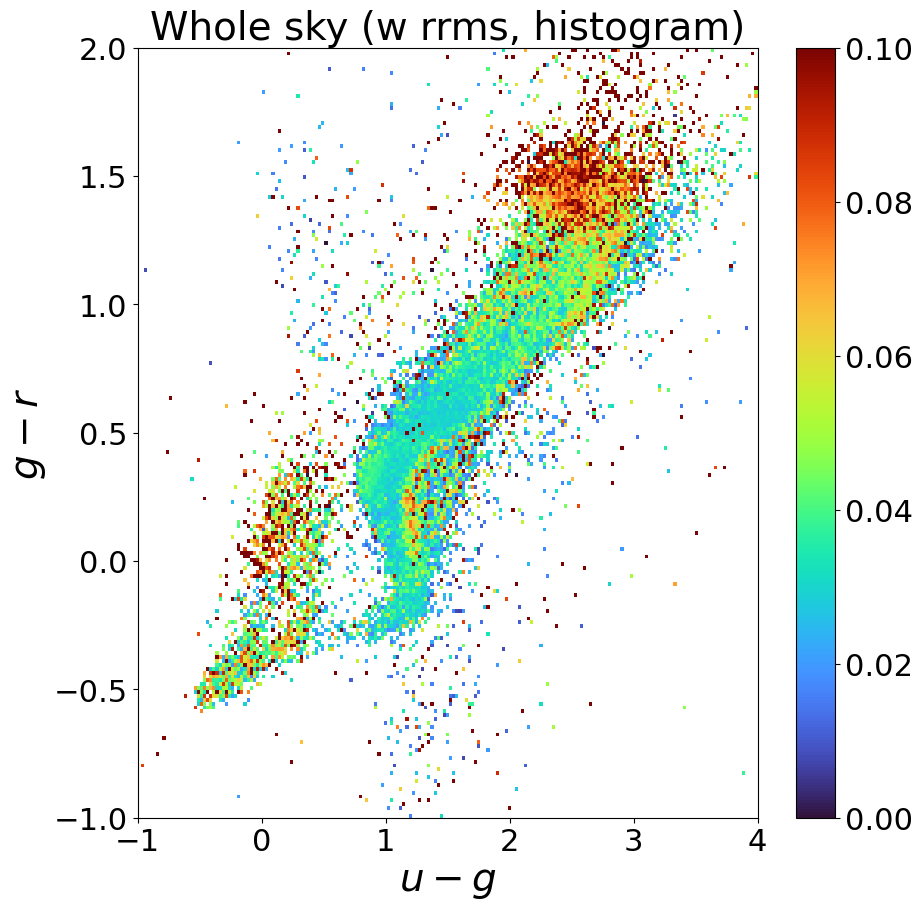

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
WR_MAX = 0.1
WR_MIN = 0.0

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (w rrms, histogram)')


bins_gMr = np.linspace(-1, 2, RES*2)
bins_uMg = np.linspace(-1, 4, RES*2)
hist_median = np.histogram2d(uMg(DF), gMr(DF), bins=(bins_uMg, bins_gMr), weights=DF[SGW_COLNAME])[0]/hist

sc = ax.pcolormesh(bins_uMg, bins_gMr, hist_median.T, cmap='turbo', norm='linear', vmin=WR_MIN, vmax=WR_MAX)

# sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
#                 cmap='BrBG', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_histogram_rrms.png', dpi=600)

plt.show()

# 2nd mode

In [45]:
df = DF[(DF[SGW_COLNAME] < LIM_MODE_RMS_UPPER) \
        & (DF[W_MEDIAN_COLNAME] < LIM_MODE_MED_UPPER) \
        & (DF[W_MEDIAN_COLNAME] > LIM_MODE_MED_LOWER)]
df

source_id  clean_sdssdr13_oid  original_ext_source_id  \
129     3689922166248251264            74465711     1237671264959922194   
359     3794901474884507648            65137713     1237648720693362740   
621     1435601168105267840           442504737     1237651298187214911   
718     1438598372378666240           449692613     1237651298185969680   
721     1432419804225335168           432926300     1237651211214389273   
...                     ...                 ...                     ...   
149160  2507529558128561664            68067982     1237663783673856022   
149582   140218076487178112           337926923     1237670458581713359   
149793  3562453034461202944             7029168     1237671168316014654   
149832  3562545217343398528             7749792     1237671167779536944   
150199   852398730191544704           423349415     1237657634875703333   

        angular_distance     gaia_ra   gaia_dec  phot_g_mean_mag      bp_g  \
129             0.033155  192.294584   0.155967        16.969307  0.210939   
359             0.008562  178.893303  -0.600526        16.724886  0.196354   
621             0.026225  261.769506  59.626849        16.733915  0.146338   
718             0.065464  260.000038  62.360619        16.540821  0.312820   
721             0.023359  257.952867  56.411947        16.785557  0.194878   
...                  ...         ...        ...              ...       ...   
149160          0.062812   30.434485  -0.360285        15.560700  0.298047   
149582          0.090757   43.946352  34.895808        16.687223  1.514399   
149793          0.108626  165.976737 -16.299500        14.595302  0.214625   
149832          0.079747  166.718708 -15.780699        16.214666  0.317801   
150199          0.027741  150.734992  53.521808        16.331942  0.270224   

            g_rp                objId  ...  q_median    q_rrms    w_mean  \
129     0.366880  1237671264959922194  ...  0.785011  0.033463  0.779770   
359     0.414913  1237648720693362740  ...  0.789599  0.027177  0.781856   
621     0.296581  1237651298187214911  ...  0.778579  0.034148  0.773384   
718     0.483179  1237651298185969680  ...  0.696238  0.039911  0.701916   
721     0.308472  1237651211214389273  ...  0.724153  0.023592  0.722127   
...          ...                  ...  ...       ...       ...       ...   
149160  0.474843  1237663783673856022  ...  0.733578  0.011907  0.732464   
149582  1.197355  1237670458581713359  ...  0.797280  0.064813  0.793761   
149793  0.393503  1237671168316014654  ...  0.731791  0.065409  0.727600   
149832  0.480142  1237671167779536944  ...  0.691871  0.024650  0.691284   
150199  0.438657  1237657634875703333  ...  0.755143  0.028811  0.740613   

           w_std  w_median    w_rrms    D_mean     D_std  D_median    D_rrms  
129     0.023461  0.779840  0.024254  0.220230  0.023461  0.220160  0.024254  
359     0.021528  0.781055  0.026165  0.218144  0.021528  0.218945  0.026165  
621     0.038132  0.774076  0.035012  0.226616  0.038132  0.225924  0.035012  
718     0.033820  0.694202  0.045067  0.298084  0.033820  0.305798  0.045067  
721     0.029009  0.716740  0.024043  0.277873  0.029009  0.283260  0.024043  
...          ...       ...       ...       ...       ...       ...       ...  
149160  0.017981  0.732285  0.018495  0.267536  0.017981  0.267715  0.018495  
149582  0.122417  0.787034  0.061983  0.221609  0.091706  0.213461  0.061923  
149793  0.041115  0.735670  0.058031  0.272400  0.041115  0.264330  0.058031  
149832  0.015603  0.690527  0.019258  0.308716  0.015603  0.309473  0.019258  
150199  0.036568  0.752598  0.023948  0.259387  0.036568  0.247402  0.023948  

[5395 rows x 41 columns]

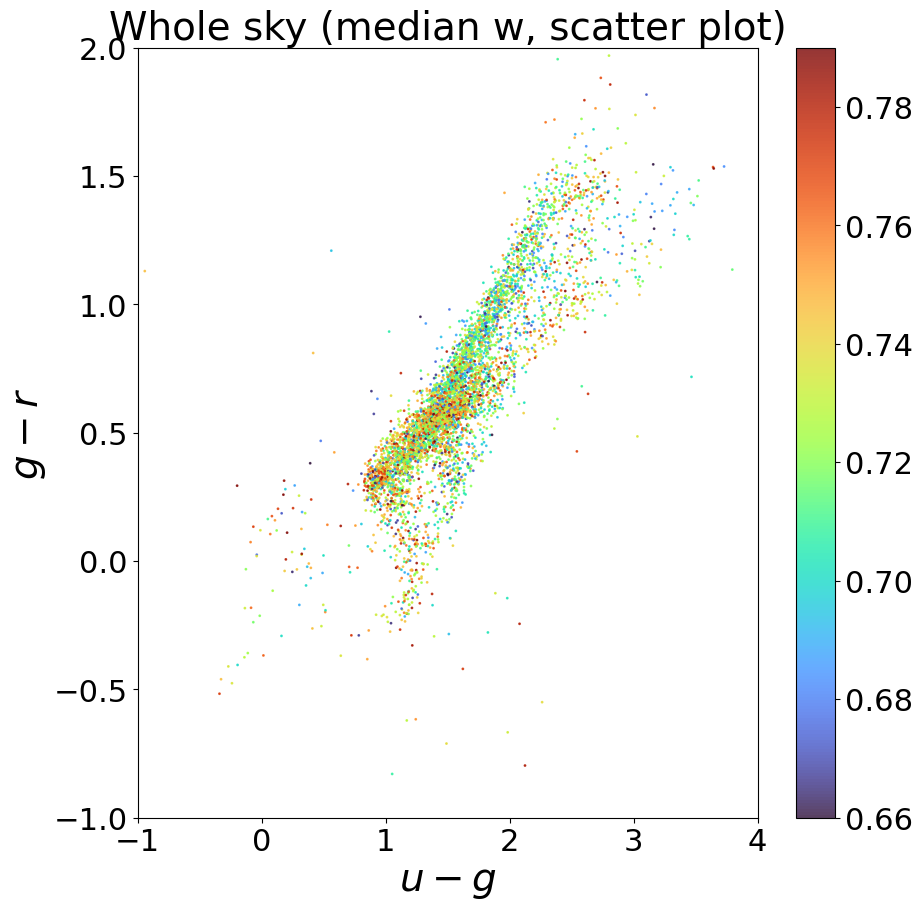

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
W_MAX = LIM_MODE_MED_UPPER
W_MIN = LIM_MODE_MED_LOWER

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (median w, scatter plot)')

sc = ax.scatter(uMg(df), gMr(df), s=S_cc, label='all', alpha=0.8,
                cmap='turbo', c=df[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_scatter_mode2.png', dpi=600)

plt.show()

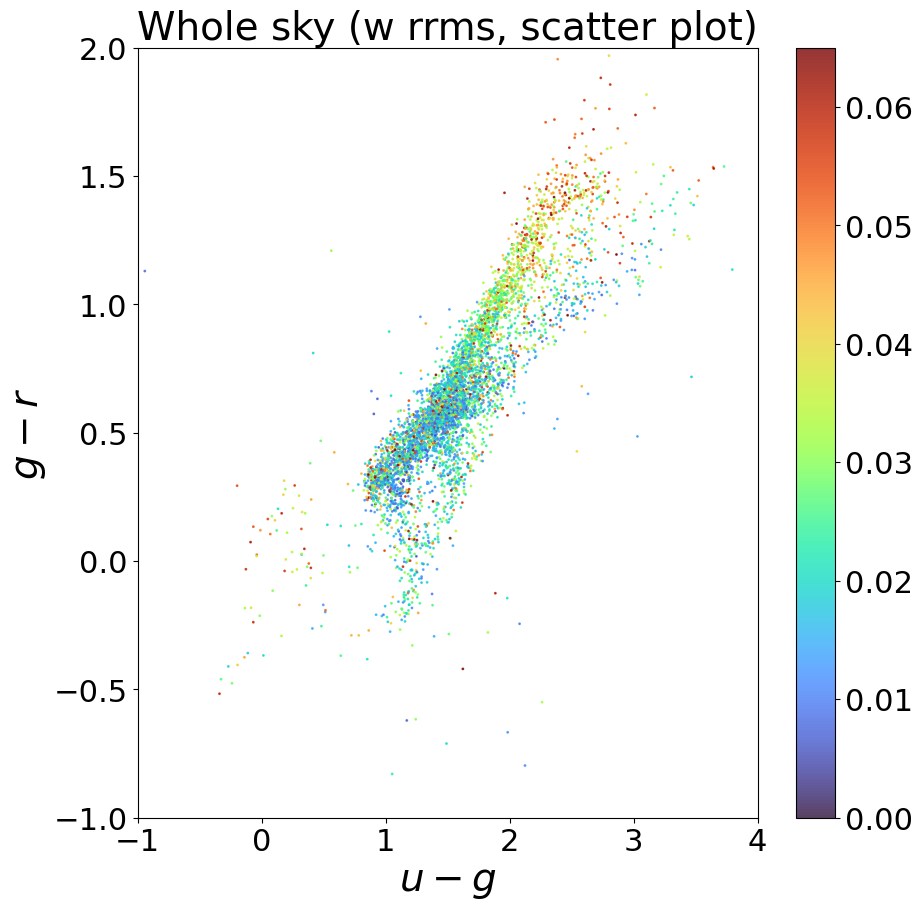

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
WR_MAX = LIM_MODE_RMS_UPPER
WR_MIN = 0.0

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (w rrms, scatter plot)')

sc = ax.scatter(uMg(df), gMr(df), s=S_cc, label='all', alpha=0.8,
                cmap='turbo', c=df[SGW_COLNAME], vmin=WR_MIN, vmax=WR_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_scatter_rrms_mode2.png', dpi=600)

plt.show()

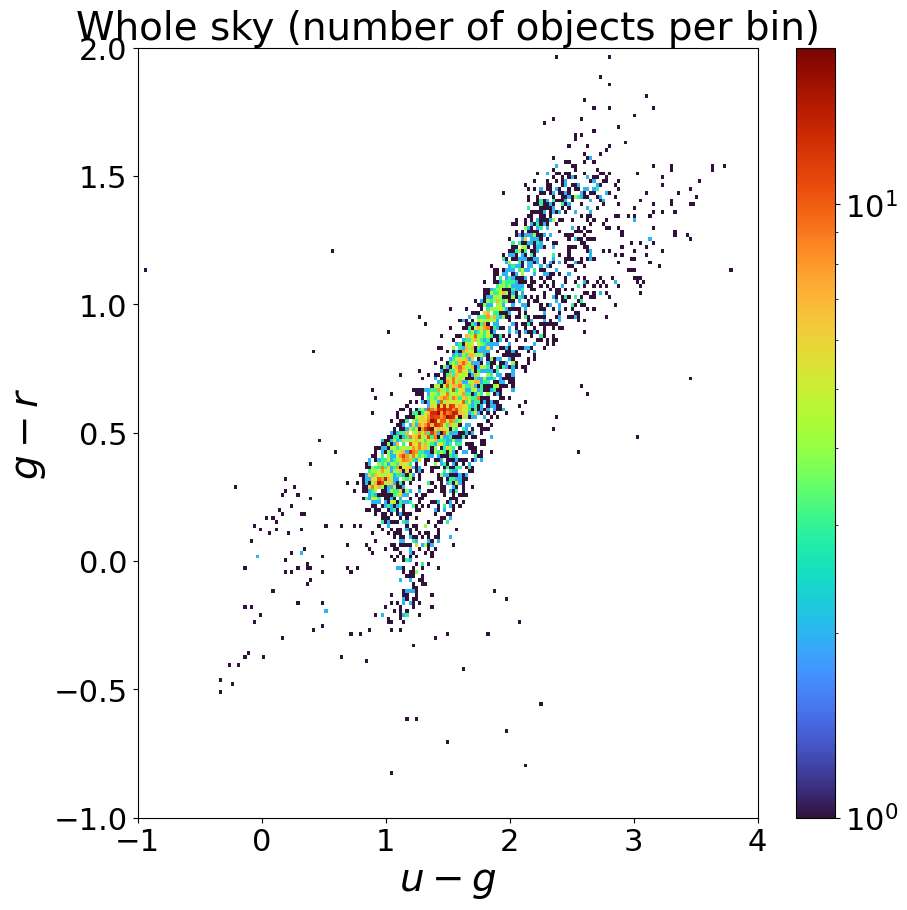

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
W_MAX = 1.2
W_MIN = 0.8

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (number of objects per bin)')


bins_gMr = np.linspace(-1, 2, RES*2)
bins_uMg = np.linspace(-1, 4, RES*2)
hist, _, _ = np.histogram2d(uMg(df), gMr(df), bins=(bins_uMg, bins_gMr))

sc = ax.pcolormesh(bins_uMg, bins_gMr, hist.T, cmap='turbo', norm='log')

# sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
#                 cmap='BrBG', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_histogram_number_mode2.png', dpi=600)

plt.show()

/tmp/ipykernel_303221/2773501848.py:16: RuntimeWarning: invalid value encountered in divide
  hist_median = np.histogram2d(uMg(df), gMr(df), bins=(bins_uMg, bins_gMr), weights=df[W_MEDIAN_COLNAME])[0]/hist


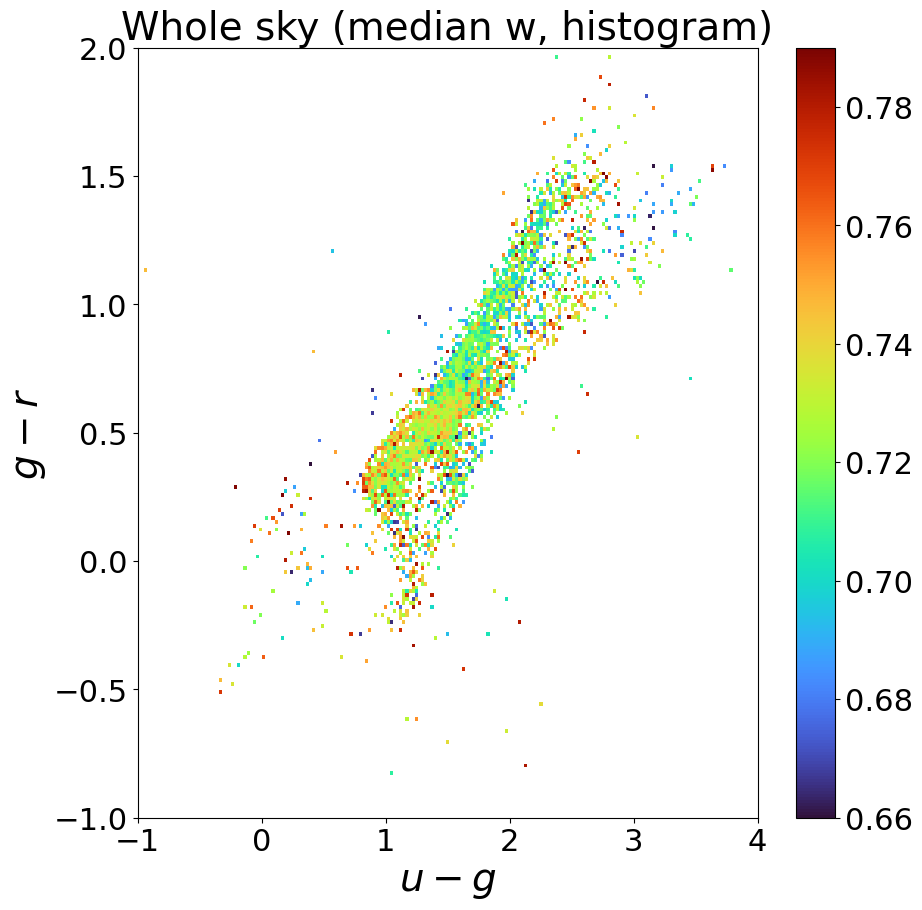

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
W_MAX = LIM_MODE_MED_UPPER
W_MIN = LIM_MODE_MED_LOWER

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (median w, histogram)')


bins_gMr = np.linspace(-1, 2, RES*2)
bins_uMg = np.linspace(-1, 4, RES*2)
hist_median = np.histogram2d(uMg(df), gMr(df), bins=(bins_uMg, bins_gMr), weights=df[W_MEDIAN_COLNAME])[0]/hist

sc = ax.pcolormesh(bins_uMg, bins_gMr, hist_median.T, cmap='turbo', norm='linear', vmin=W_MIN, vmax=W_MAX)

# sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
#                 cmap='BrBG', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_histogram_median_mode2.png', dpi=600)

plt.show()

/tmp/ipykernel_303221/2958230039.py:16: RuntimeWarning: invalid value encountered in divide
  hist_median = np.histogram2d(uMg(df), gMr(df), bins=(bins_uMg, bins_gMr), weights=df[SGW_COLNAME])[0]/hist


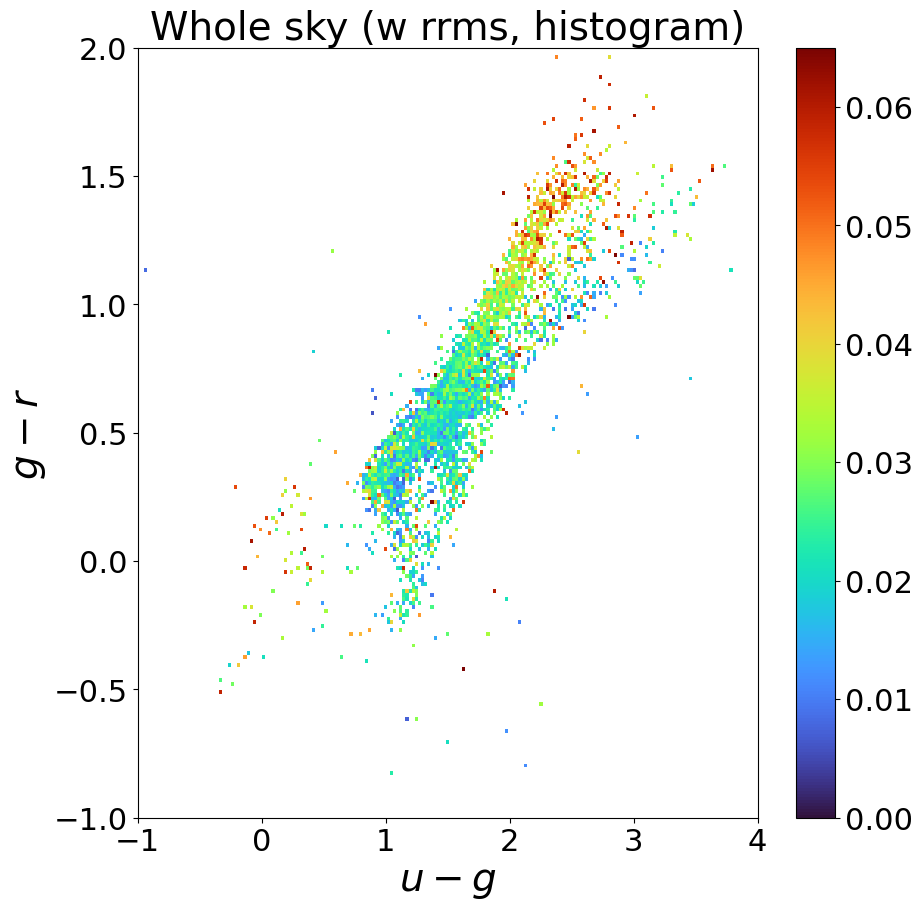

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

S_cc = 1
WR_MAX = LIM_MODE_RMS_UPPER
WR_MIN = 0.0

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_title('Whole sky (w rrms, histogram)')


bins_gMr = np.linspace(-1, 2, RES*2)
bins_uMg = np.linspace(-1, 4, RES*2)
hist_median = np.histogram2d(uMg(df), gMr(df), bins=(bins_uMg, bins_gMr), weights=df[SGW_COLNAME])[0]/hist

sc = ax.pcolormesh(bins_uMg, bins_gMr, hist_median.T, cmap='turbo', norm='linear', vmin=WR_MIN, vmax=WR_MAX)

# sc = ax.scatter(uMg(DF), gMr(DF), s=S_cc, label='all', alpha=0.8,
#                 cmap='BrBG', c=DF[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

plt.savefig('../figures/cc_whole_sky_histogram_rrms_mode2.png', dpi=600)

plt.show()

---
# S82
---

## rms cuts

In [161]:
L = [ 0, 0.02, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45 ]

df_mode1 = DF_S82[DF_S82[W_MEDIAN_COLNAME] > LIM_MODE_MED_UPPER]
cuts = [ df_mode1[(df_mode1[SGW_COLNAME] > L[i]) & (df_mode1[SGW_COLNAME] < L[i+1])] for i in range(len(L)-1)]
L = L[1:]

N_tot    = np.zeros(len(L))
N_nonvar = np.zeros(len(L))
N_var    = np.zeros(len(L))
N_quasar = np.zeros(len(L))
N_unk    = np.zeros(len(L))
N_ambi   = np.zeros(len(L))

# cuts[0].count()
for i in range(len(L)):
    is_nonvar = cuts[i].nonvar_match_num == 1
    is_var    = cuts[i].var_match_num == 1
    is_quasar = cuts[i].quasar_match_num == 1
    
    N_tot[i]    = cuts[i].count().w_median
    N_nonvar[i] = cuts[i][is_nonvar & ~is_var & ~is_quasar].count().w_median
    N_var[i]    = cuts[i][~is_nonvar & is_var & ~is_quasar].count().w_median
    N_quasar[i] = cuts[i][~is_nonvar & ~is_var & is_quasar].count().w_median
    N_unk[i]    = cuts[i][~(is_nonvar | is_var | is_quasar)].count().w_median
    N_ambi[i]   = N_tot[i] - N_nonvar[i] - N_var[i] - N_quasar[i] - N_unk[i]

    
is_nonvar = df_mode1.nonvar_match_num == 1
is_var    = df_mode1.var_match_num == 1
is_quasar = df_mode1.quasar_match_num == 1 
M_var = df_mode1[~is_nonvar & is_var & ~is_quasar].count().w_median

completeness = [ N_var[i]/M_var for i in range(len(L)) ]
purity = [ N_var[i]/N_tot[i] for i in range(len(L)) ]
other_purity = [ N_var[i]/(N_tot[i]-N_unk[i]) for i in range(len(L)) ]

In [162]:
purity

[0.00749211356466877,
 0.013011863758132415,
 0.017579841781423966,
 0.012089810017271158,
 0.031088082901554404,
 0.06548672566371681,
 0.12403100775193798,
 0.2777777777777778,
 0.2222222222222222,
 0.26666666666666666,
 0.4,
 0.3333333333333333]

In [163]:
completeness

[0.076,
 0.136,
 0.24,
 0.084,
 0.144,
 0.148,
 0.064,
 0.06,
 0.016,
 0.016,
 0.008,
 0.004]

In [164]:
other_purity

[0.0099113197704747,
 0.017223910840932118,
 0.022988505747126436,
 0.016600790513833993,
 0.045,
 0.10306406685236769,
 0.23529411764705882,
 0.4838709677419355,
 0.8,
 0.8,
 1.0,
 0.5]

In [165]:
L = np.array(L)
purity = np.array(purity)
other_purity = np.array(other_purity)
completeness = np.array(completeness)

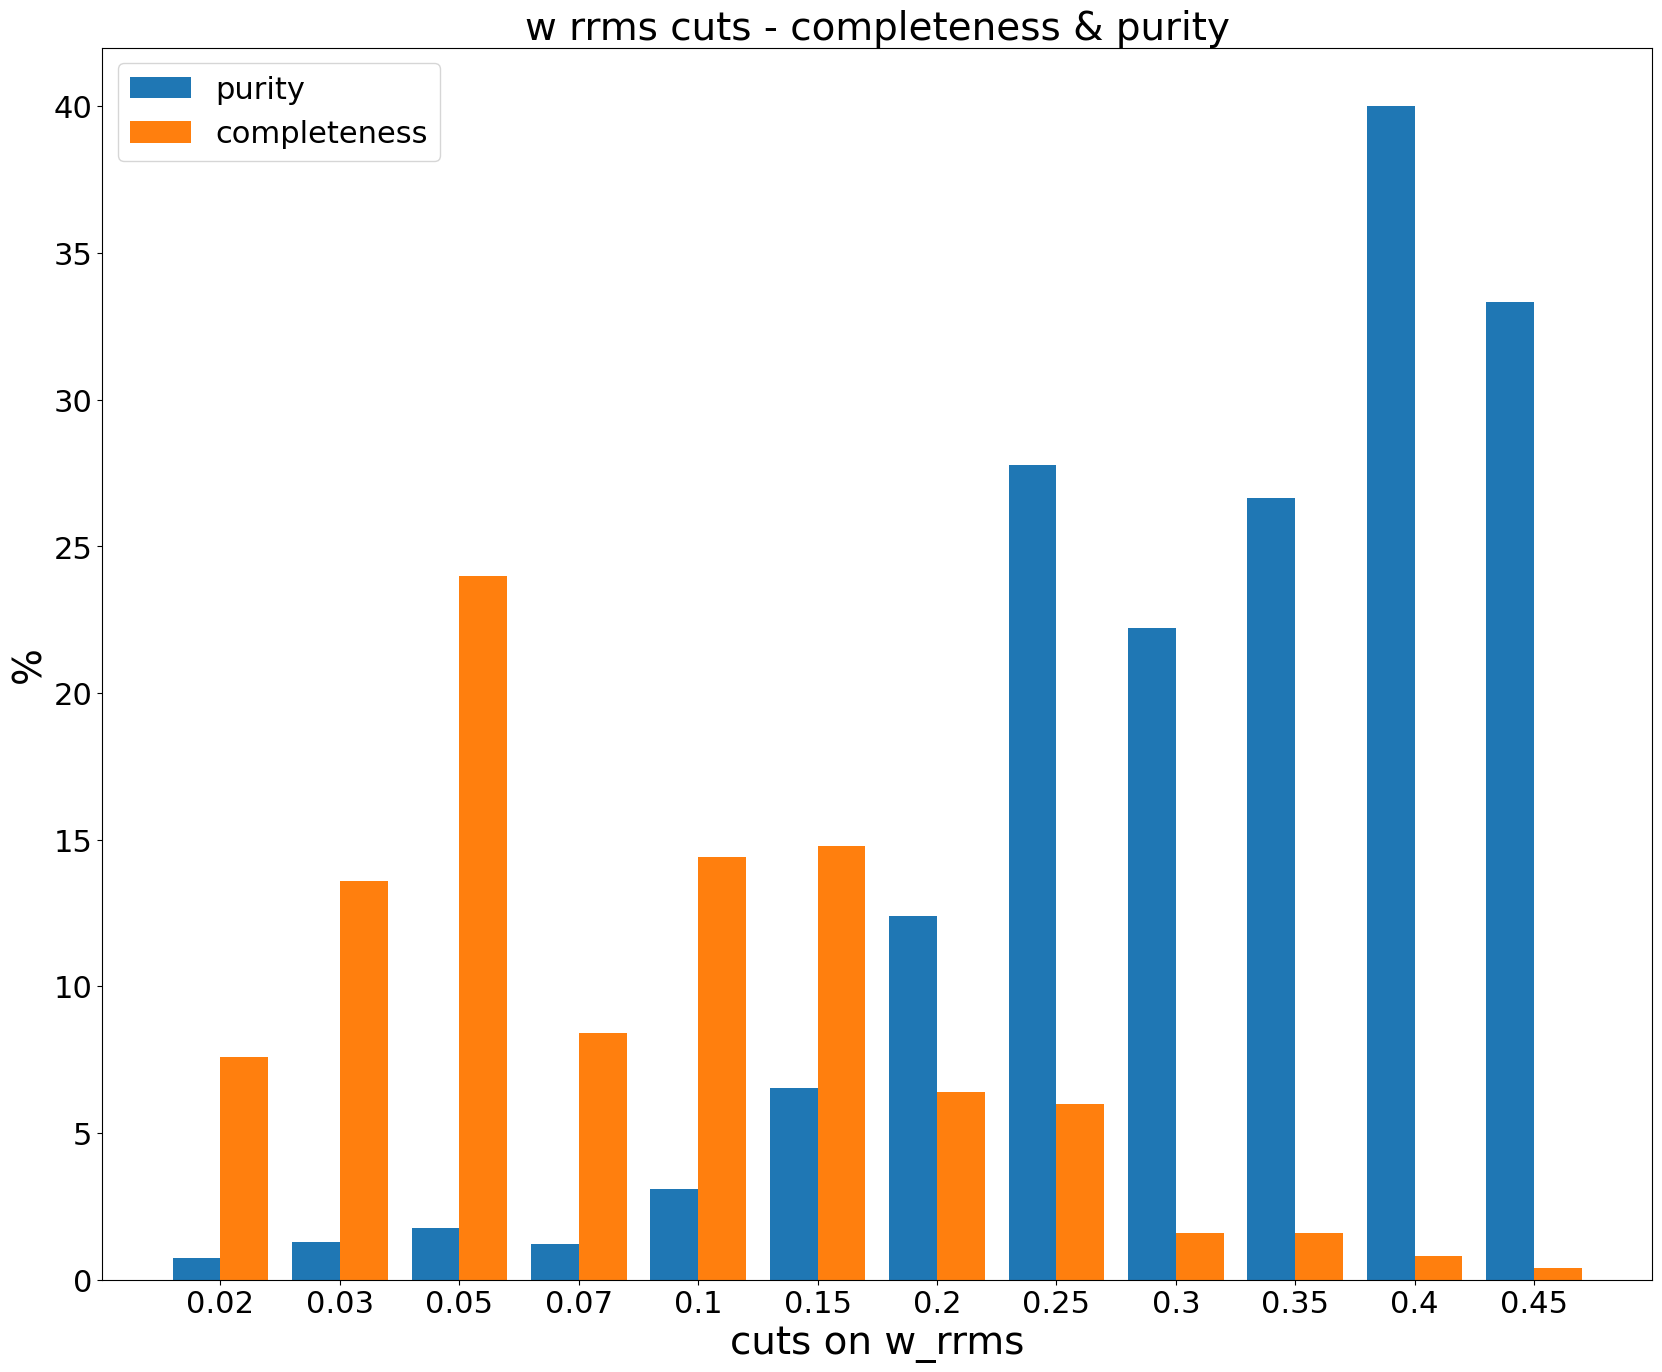

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(20, 16))


ax.set_xlabel('cuts on w_rrms')
ax.set_ylabel('%')
ax.set_title('w rrms cuts - completeness & purity')

ax.bar(np.arange(len(L)) - 0.2, purity*100, width=0.4, label='purity')
ax.bar(np.arange(len(L)) + 0.2, completeness*100, width=0.4, label='completeness')
ax.legend()

ax.set_xticks(range(len(L)), L)

plt.savefig('../figures/completeness_purity.png', dpi=600)

None

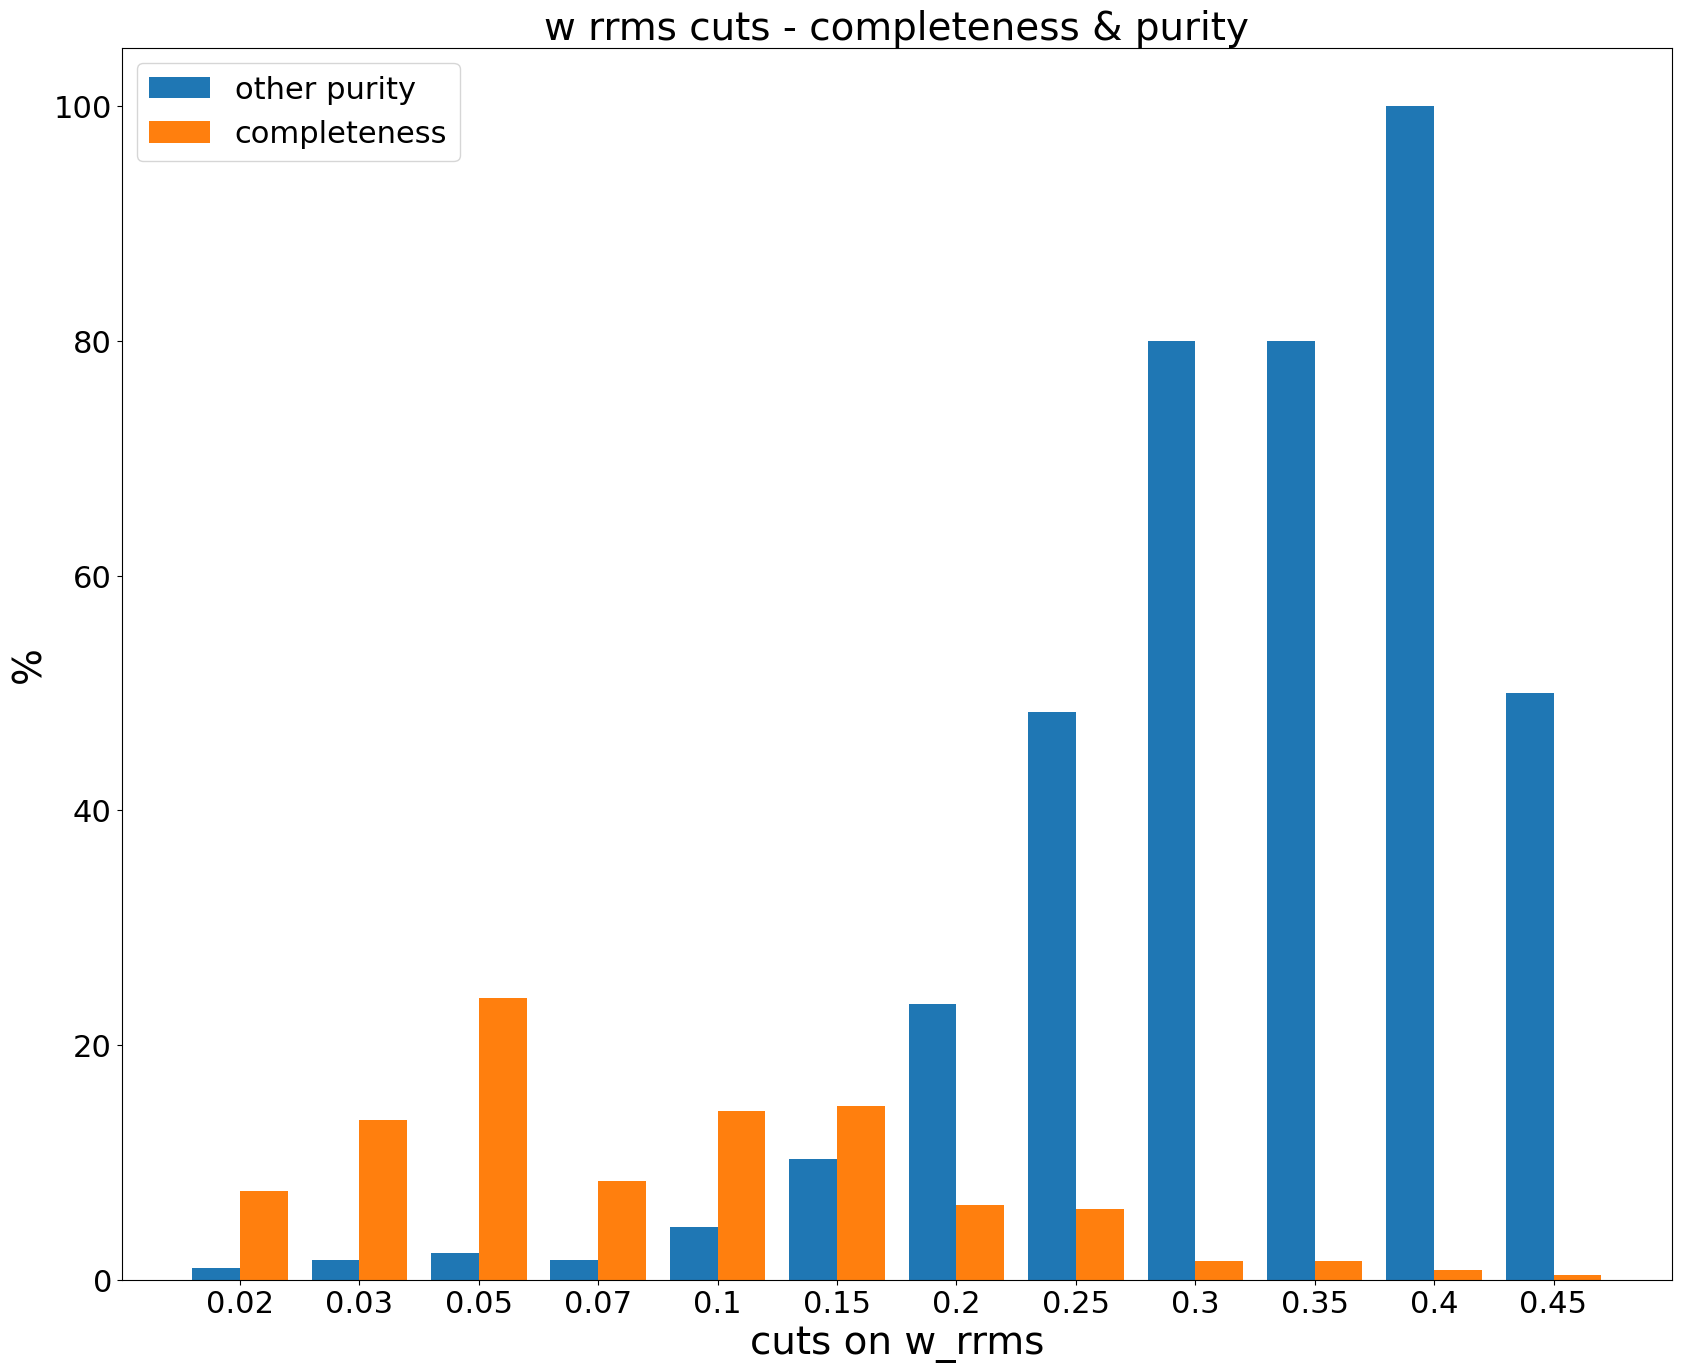

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(20, 16))


ax.set_xlabel('cuts on w_rrms')
ax.set_ylabel('%')
ax.set_title('w rrms cuts - completeness & purity')

ax.bar(np.arange(len(L)) - 0.2, other_purity*100, width=0.4, label='other purity')
ax.bar(np.arange(len(L)) + 0.2, completeness*100, width=0.4, label='completeness')
ax.legend()

ax.set_xticks(range(len(L)), L)

plt.savefig('../figures/completeness_other_purity.png', dpi=600)

None

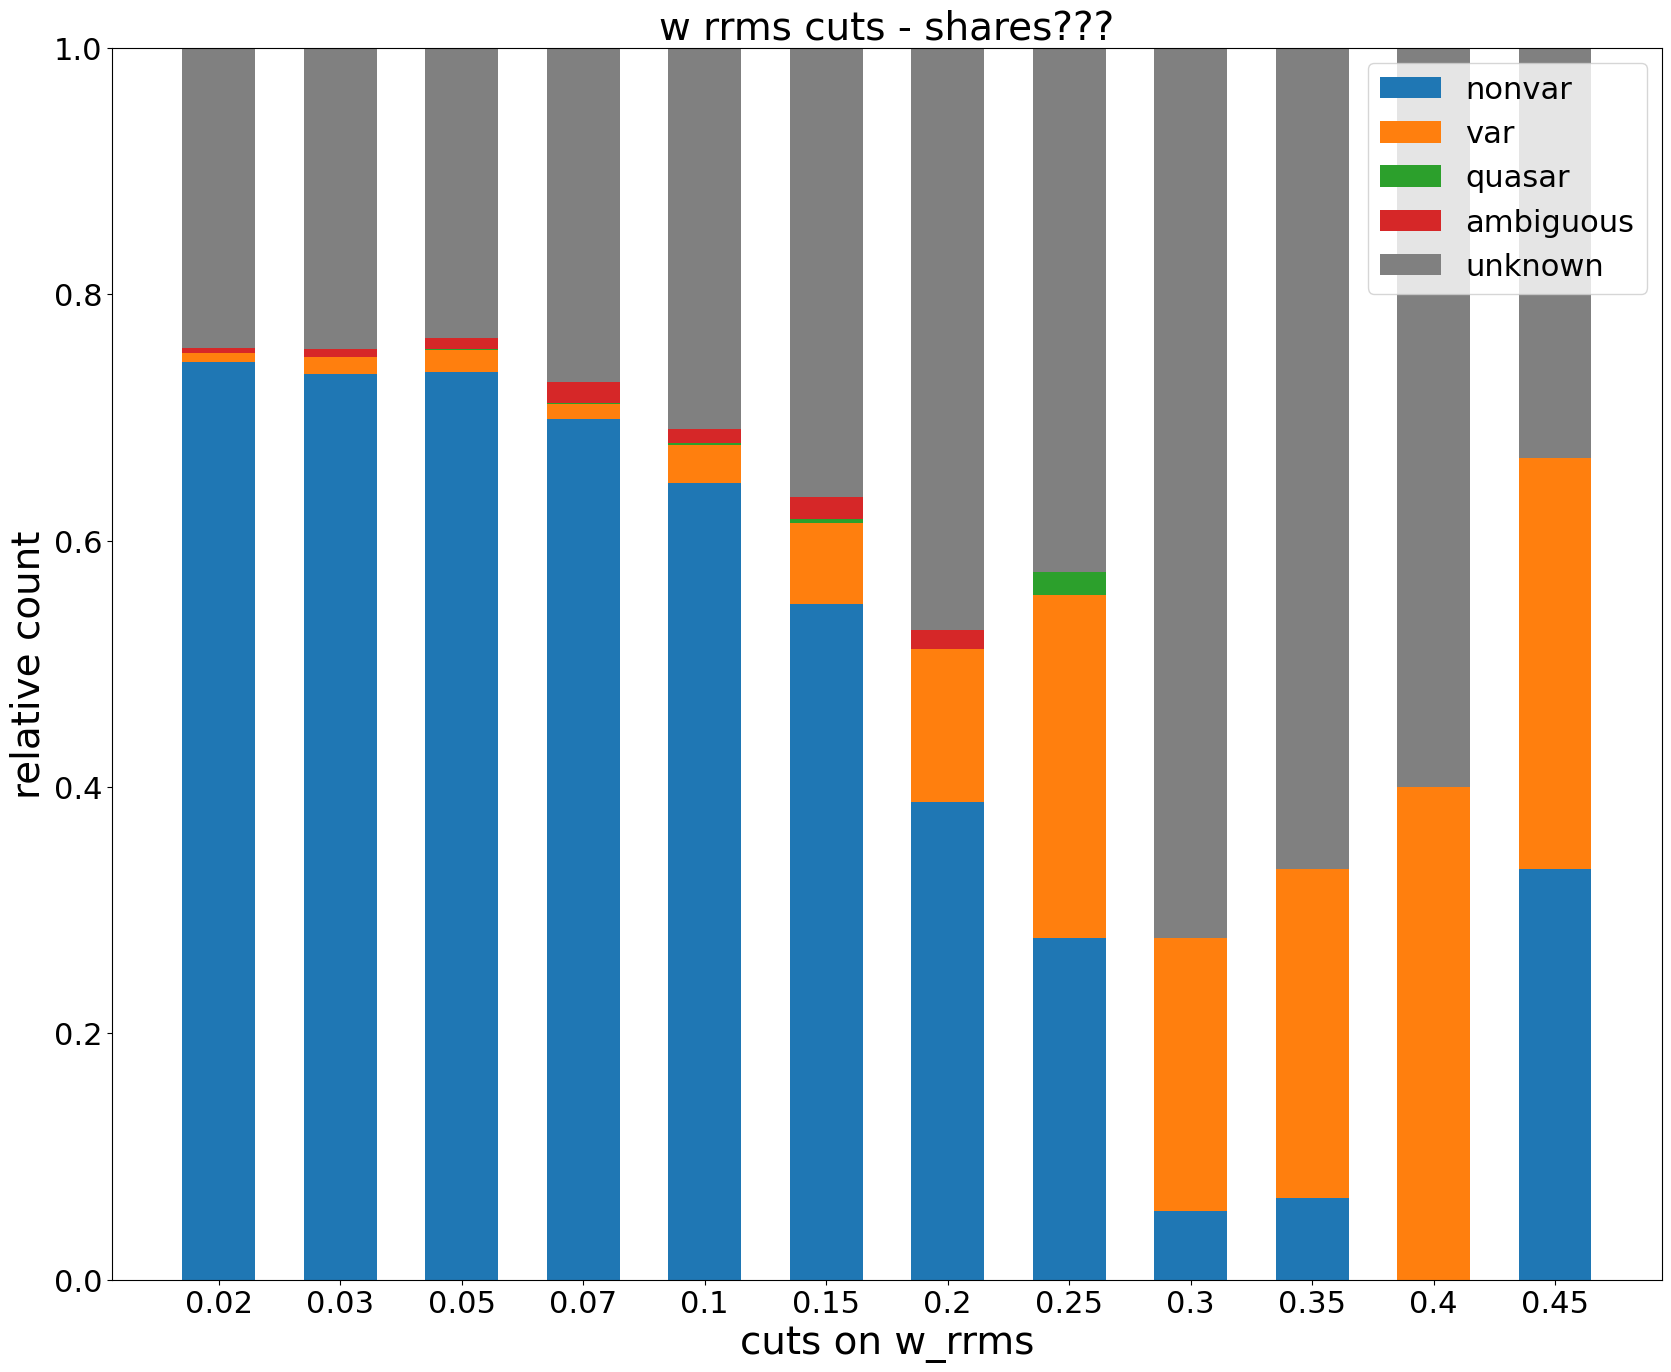

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(20, 16))


ax.set_xlabel('cuts on w_rrms')
ax.set_ylabel('relative count')
ax.set_ylim(0, 1)
ax.set_title('w rrms cuts - shares???')

ax.bar(np.arange(len(L)), N_nonvar/N_tot, width=0.6, label='nonvar')
ax.bar(np.arange(len(L)), N_var/N_tot, width=0.6, label='var', bottom=N_nonvar/N_tot)
ax.bar(np.arange(len(L)), N_quasar/N_tot, width=0.6, label='quasar', bottom=(N_nonvar+N_var)/N_tot)
ax.bar(np.arange(len(L)), N_ambi/N_tot, width=0.6, label='ambiguous', bottom=(N_nonvar+N_var+N_quasar)/N_tot)
ax.bar(np.arange(len(L)), N_unk/N_tot, width=0.6, label='unknown', bottom=(N_nonvar+N_var+N_quasar+N_ambi)/N_tot, color='gray')
ax.legend()

ax.set_xticks(range(len(L)), L)

# plt.savefig('../figures/cut_percentages.png', dpi=600)

None

/tmp/ipykernel_303221/881721433.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  sc = ax[i][j].scatter(uMg(cuts[2*i+j]), gMr(cuts[2*i+j]), s=6, label='all', alpha=0.8,


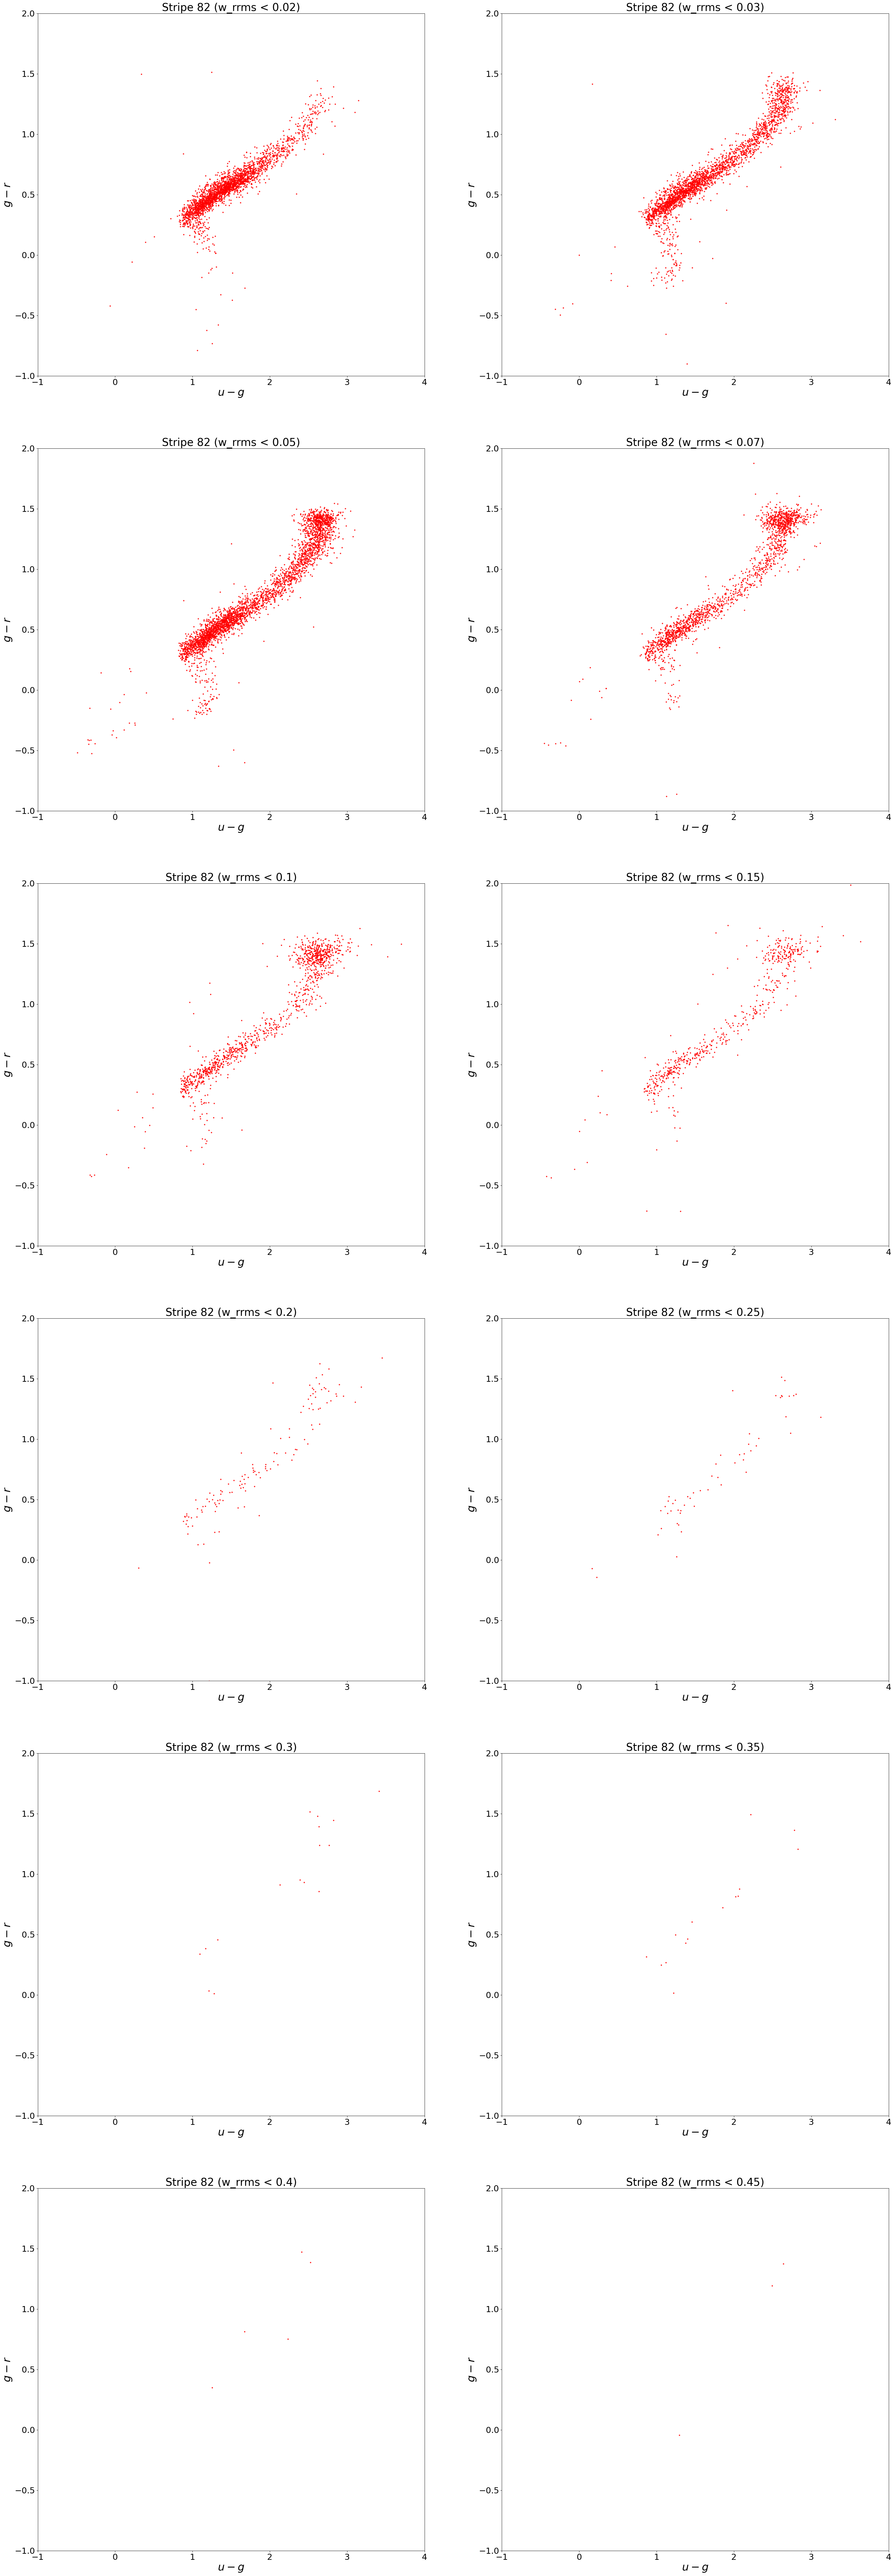

In [182]:
fig, ax = plt.subplots(6, 2, figsize=(40, 120))

S_cc = 1
W_MAX = 1.2
W_MIN = 0.8

for i in range(6):
    for j in range(2):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(f'Stripe 82 (w_rrms < {L[2*i+j]})')
       
        sc = ax[i][j].scatter(uMg(cuts[2*i+j]), gMr(cuts[2*i+j]), s=6, label='all', alpha=0.8,
                        cmap='turbo', c='red', vmin=W_MIN, vmax=W_MAX)
        

plt.savefig('../figures/cc_cuts.png', dpi=300)

plt.show()

## var/nonvar/quasar

In [57]:
is_nonvar = DF_S82.nonvar_match_num == 1
is_var    = DF_S82.var_match_num == 1
is_quasar = DF_S82.quasar_match_num == 1

nonvar_subset = DF_S82[is_nonvar & ~is_var & ~is_quasar]
var_subset    = DF_S82[~is_nonvar & is_var & ~is_quasar]
quasar_subset = DF_S82[~is_nonvar & ~is_var & is_quasar]
# ambi_subset   = DF[is_nonvar | is_var | is_quasar & ~(is_nonvar ^ is_var ^ is_quasar)]
none_subset   = DF_S82[~is_nonvar & ~is_var & ~is_quasar]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


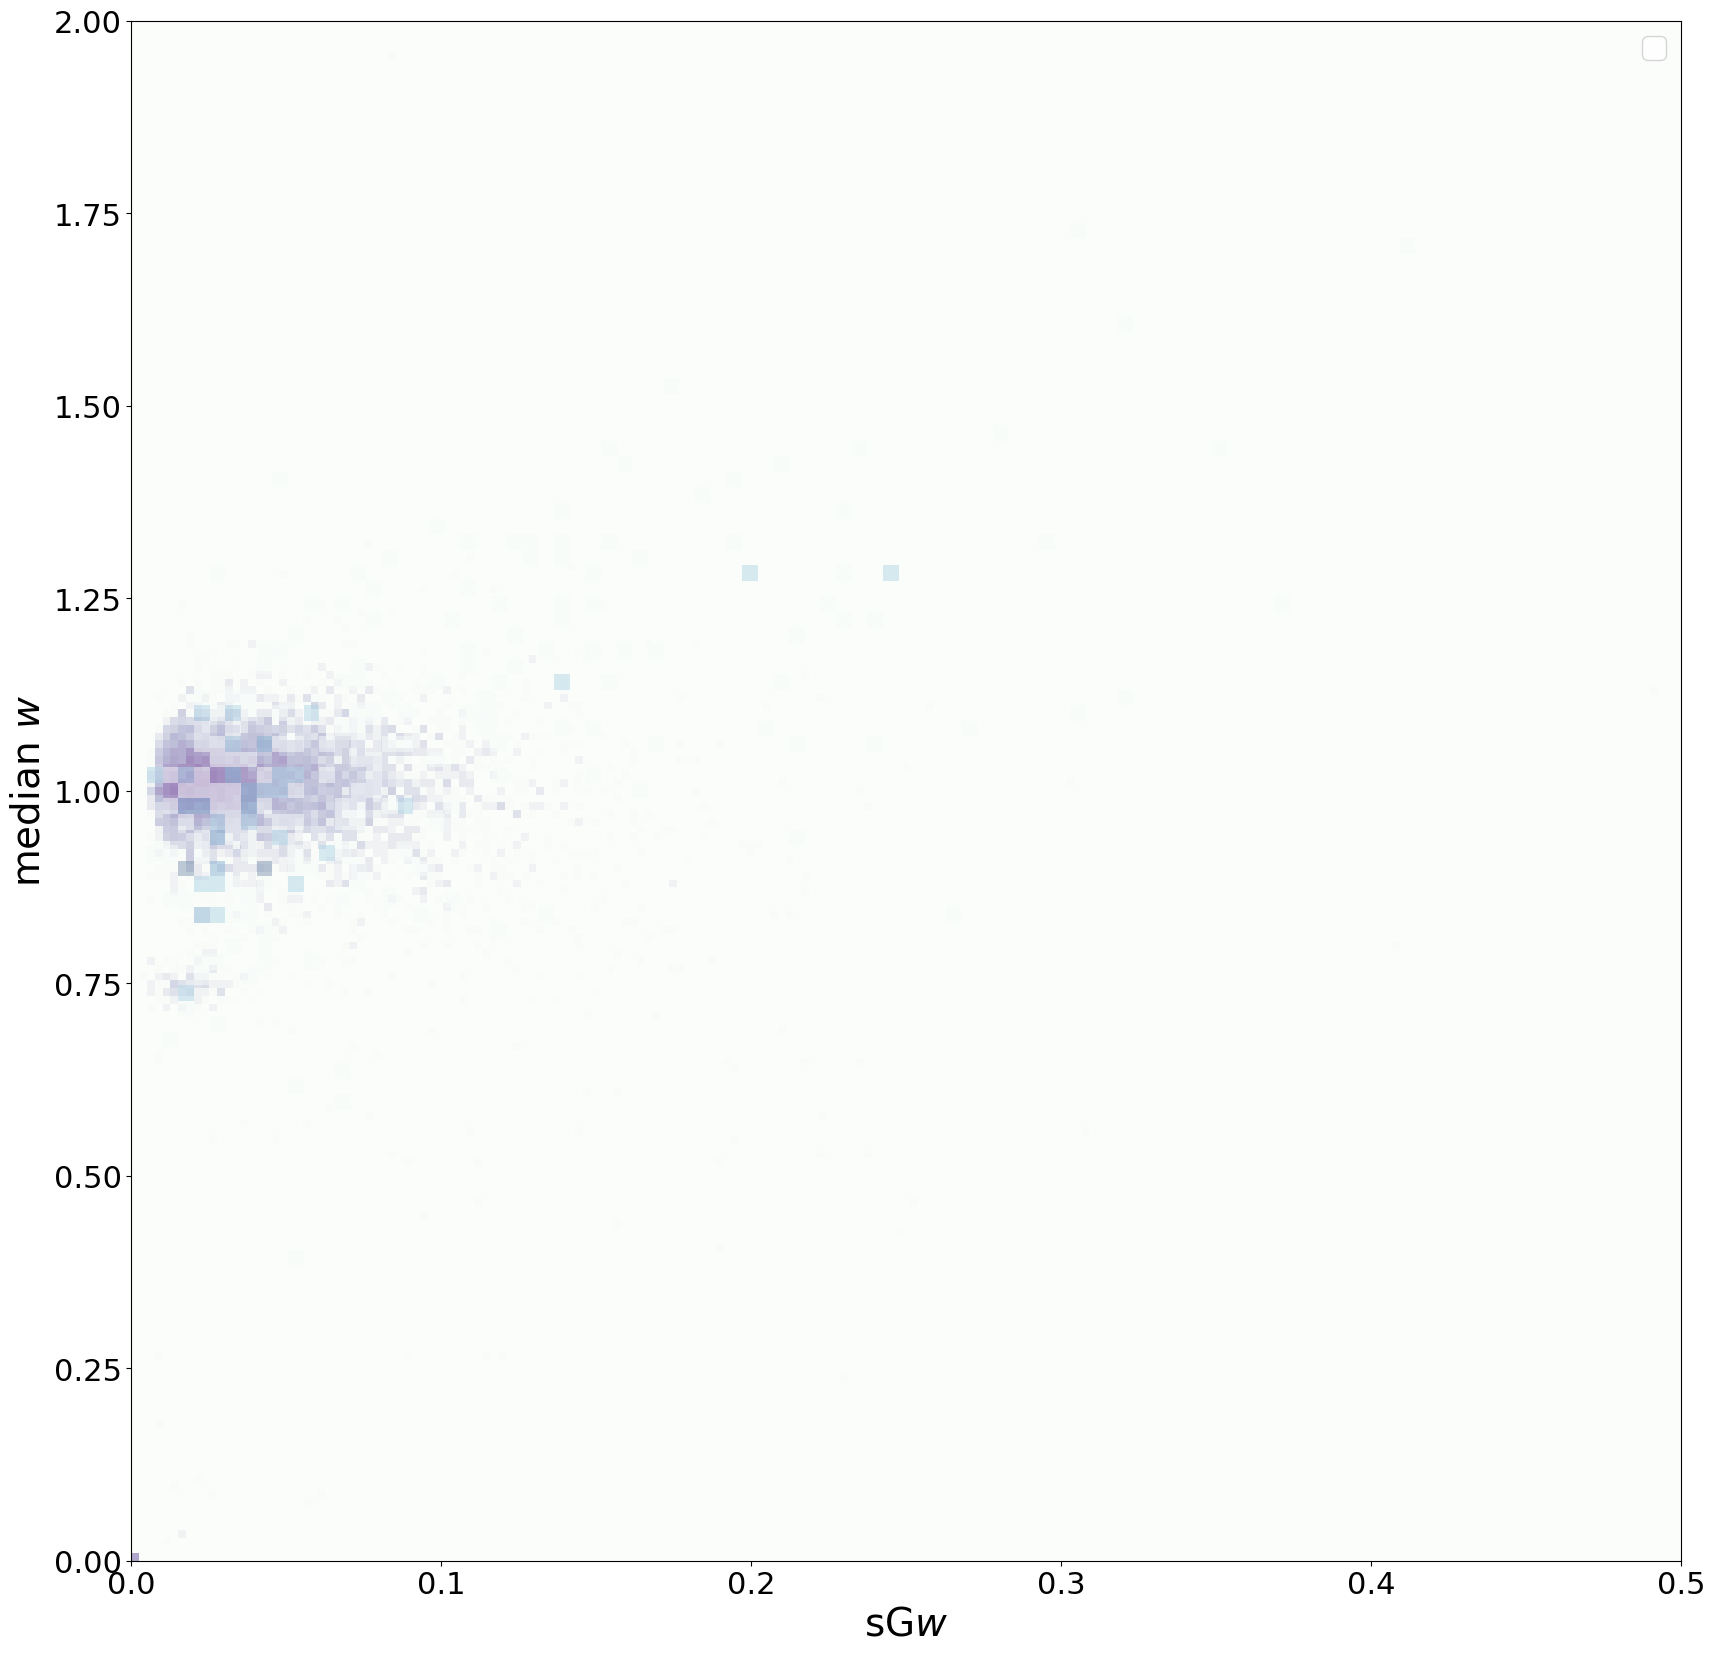

In [58]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('sG$w$')
plt.ylabel('median $w$')

bins_std_nonvar = np.linspace(0, 0.5, RES*2)
bins_avg_nonvar = np.linspace(0, 2, RES*2)
hist_nonvar, _, _ = np.histogram2d(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std_nonvar, bins_avg_nonvar))
hist_var, _, _    = np.histogram2d(var_subset[SGW_COLNAME], var_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))
hist_quasar, _, _ = np.histogram2d(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))


plt.pcolormesh(bins_std_nonvar, bins_avg_nonvar, hist_nonvar.T, cmap='Purples', norm=colors.LogNorm(), alpha=1.0)
plt.pcolormesh(bins_std, bins_avg, hist_var.T,    cmap='Blues',   norm=colors.LogNorm(), alpha=0.5)
plt.pcolormesh(bins_std, bins_avg, hist_quasar.T, cmap='Greens',  norm=colors.LogNorm(), alpha=0.5)

# plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
# plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
# plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


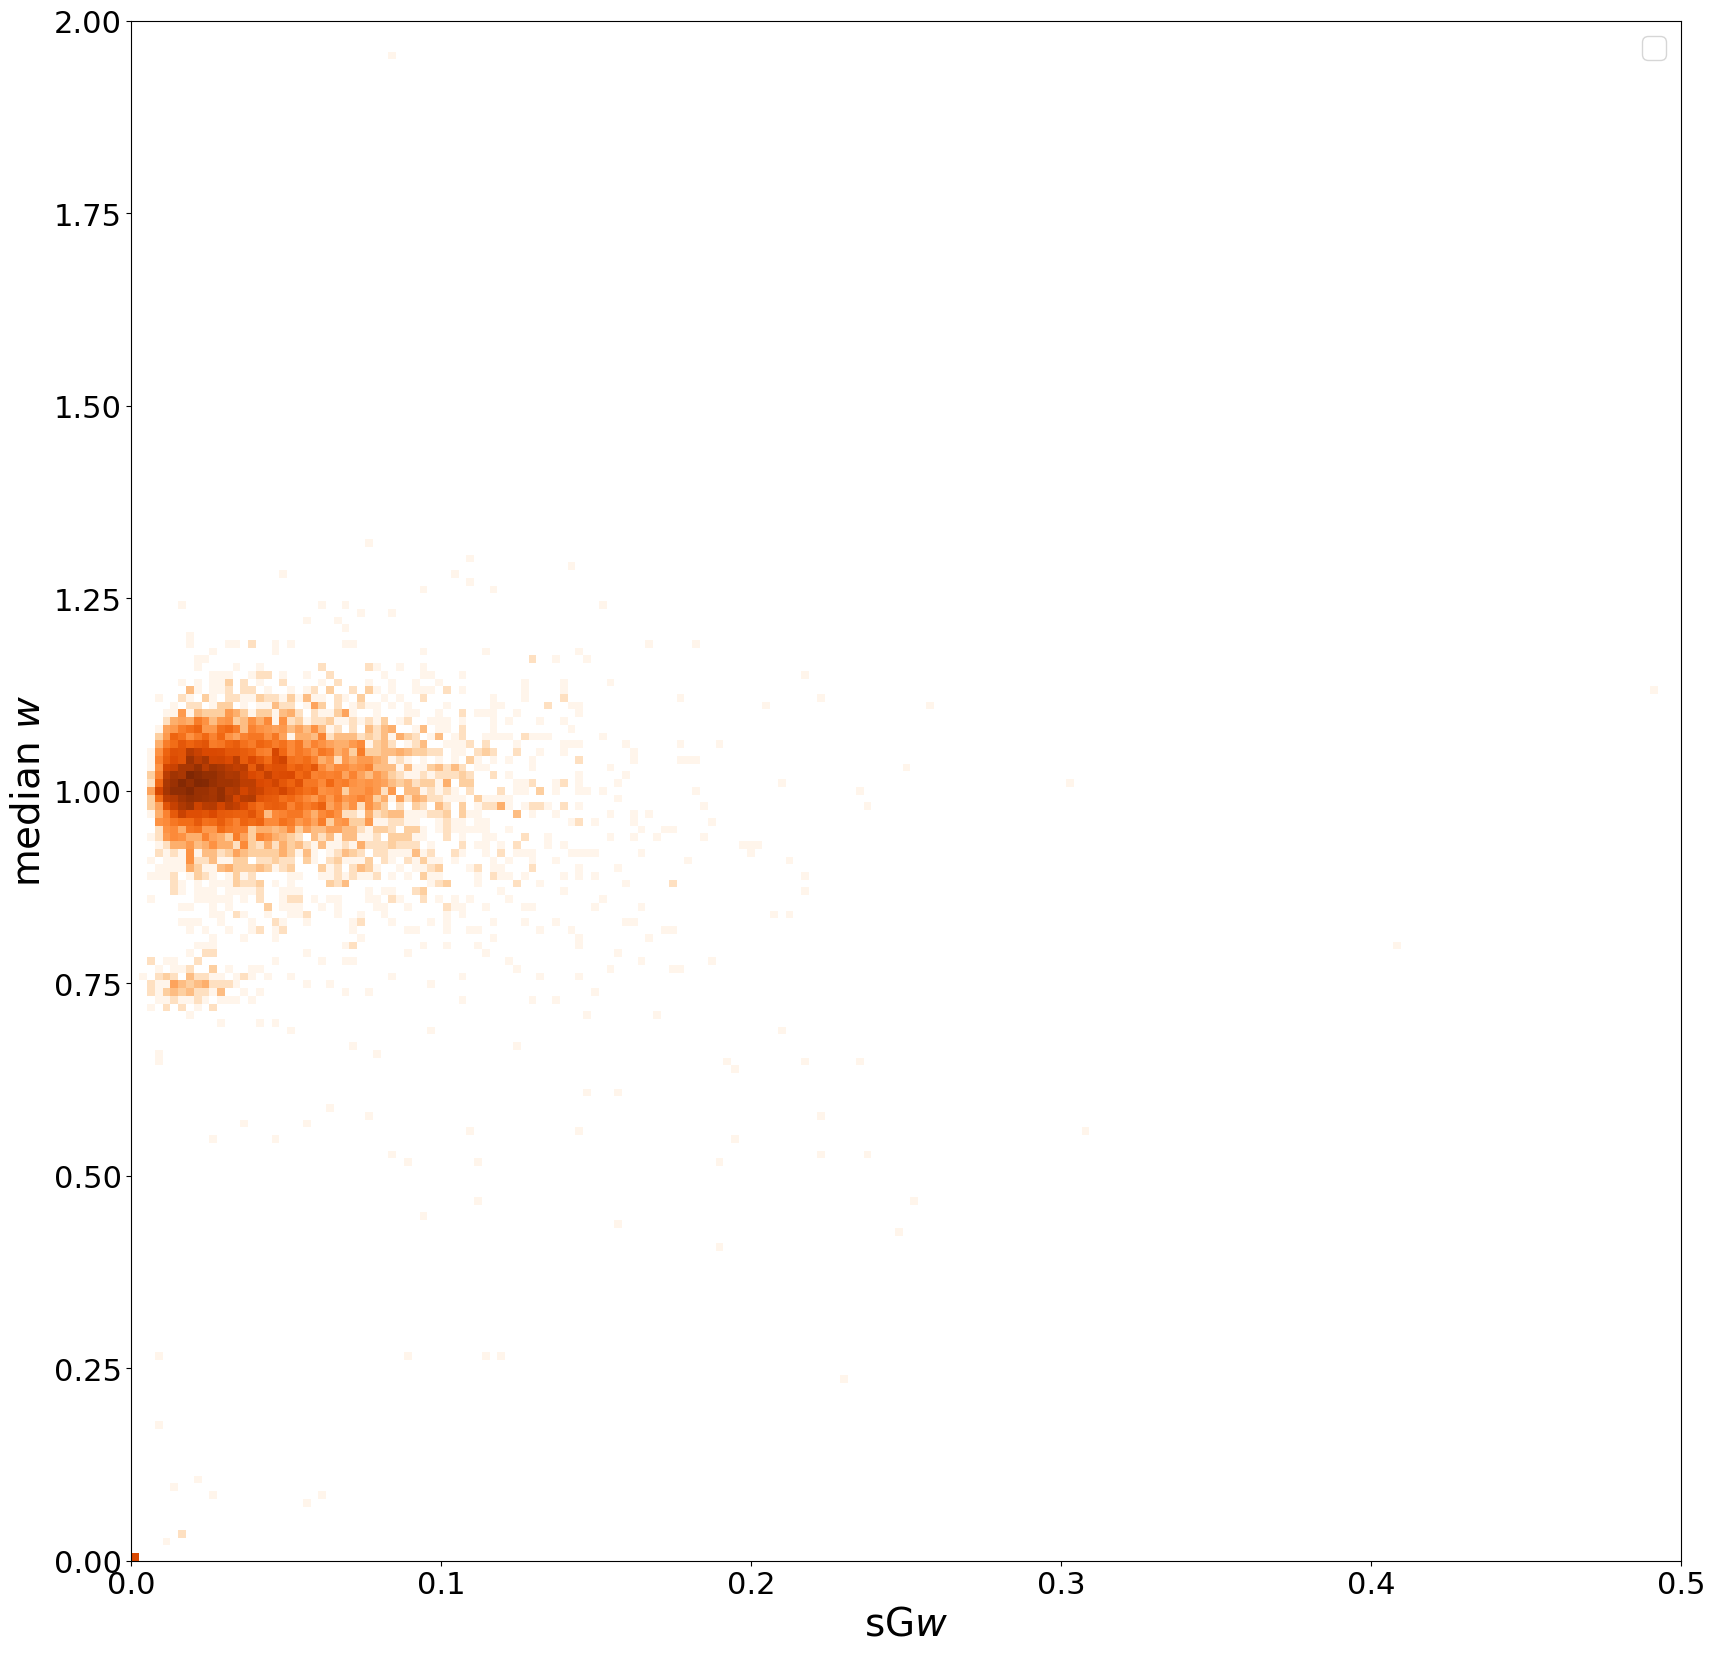

In [59]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('sG$w$')
plt.ylabel('median $w$')

bins_std_nonvar = np.linspace(0, 0.5, RES*2)
bins_avg_nonvar = np.linspace(0, 2, RES*2)
hist_nonvar, _, _ = np.histogram2d(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std_nonvar, bins_avg_nonvar))
hist_var, _, _    = np.histogram2d(var_subset[SGW_COLNAME], var_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))
hist_quasar, _, _ = np.histogram2d(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))


plt.pcolormesh(bins_std_nonvar, bins_avg_nonvar, hist_nonvar.T, cmap='Oranges', norm=colors.LogNorm(), alpha=1.0)
# plt.pcolormesh(bins_std, bins_avg, hist_var.T,    cmap='Blues',   norm=colors.LogNorm(), alpha=0.5)
# plt.pcolormesh(bins_std, bins_avg, hist_quasar.T, cmap='Greens',  norm=colors.LogNorm(), alpha=0.5)

# plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
# plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
# plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

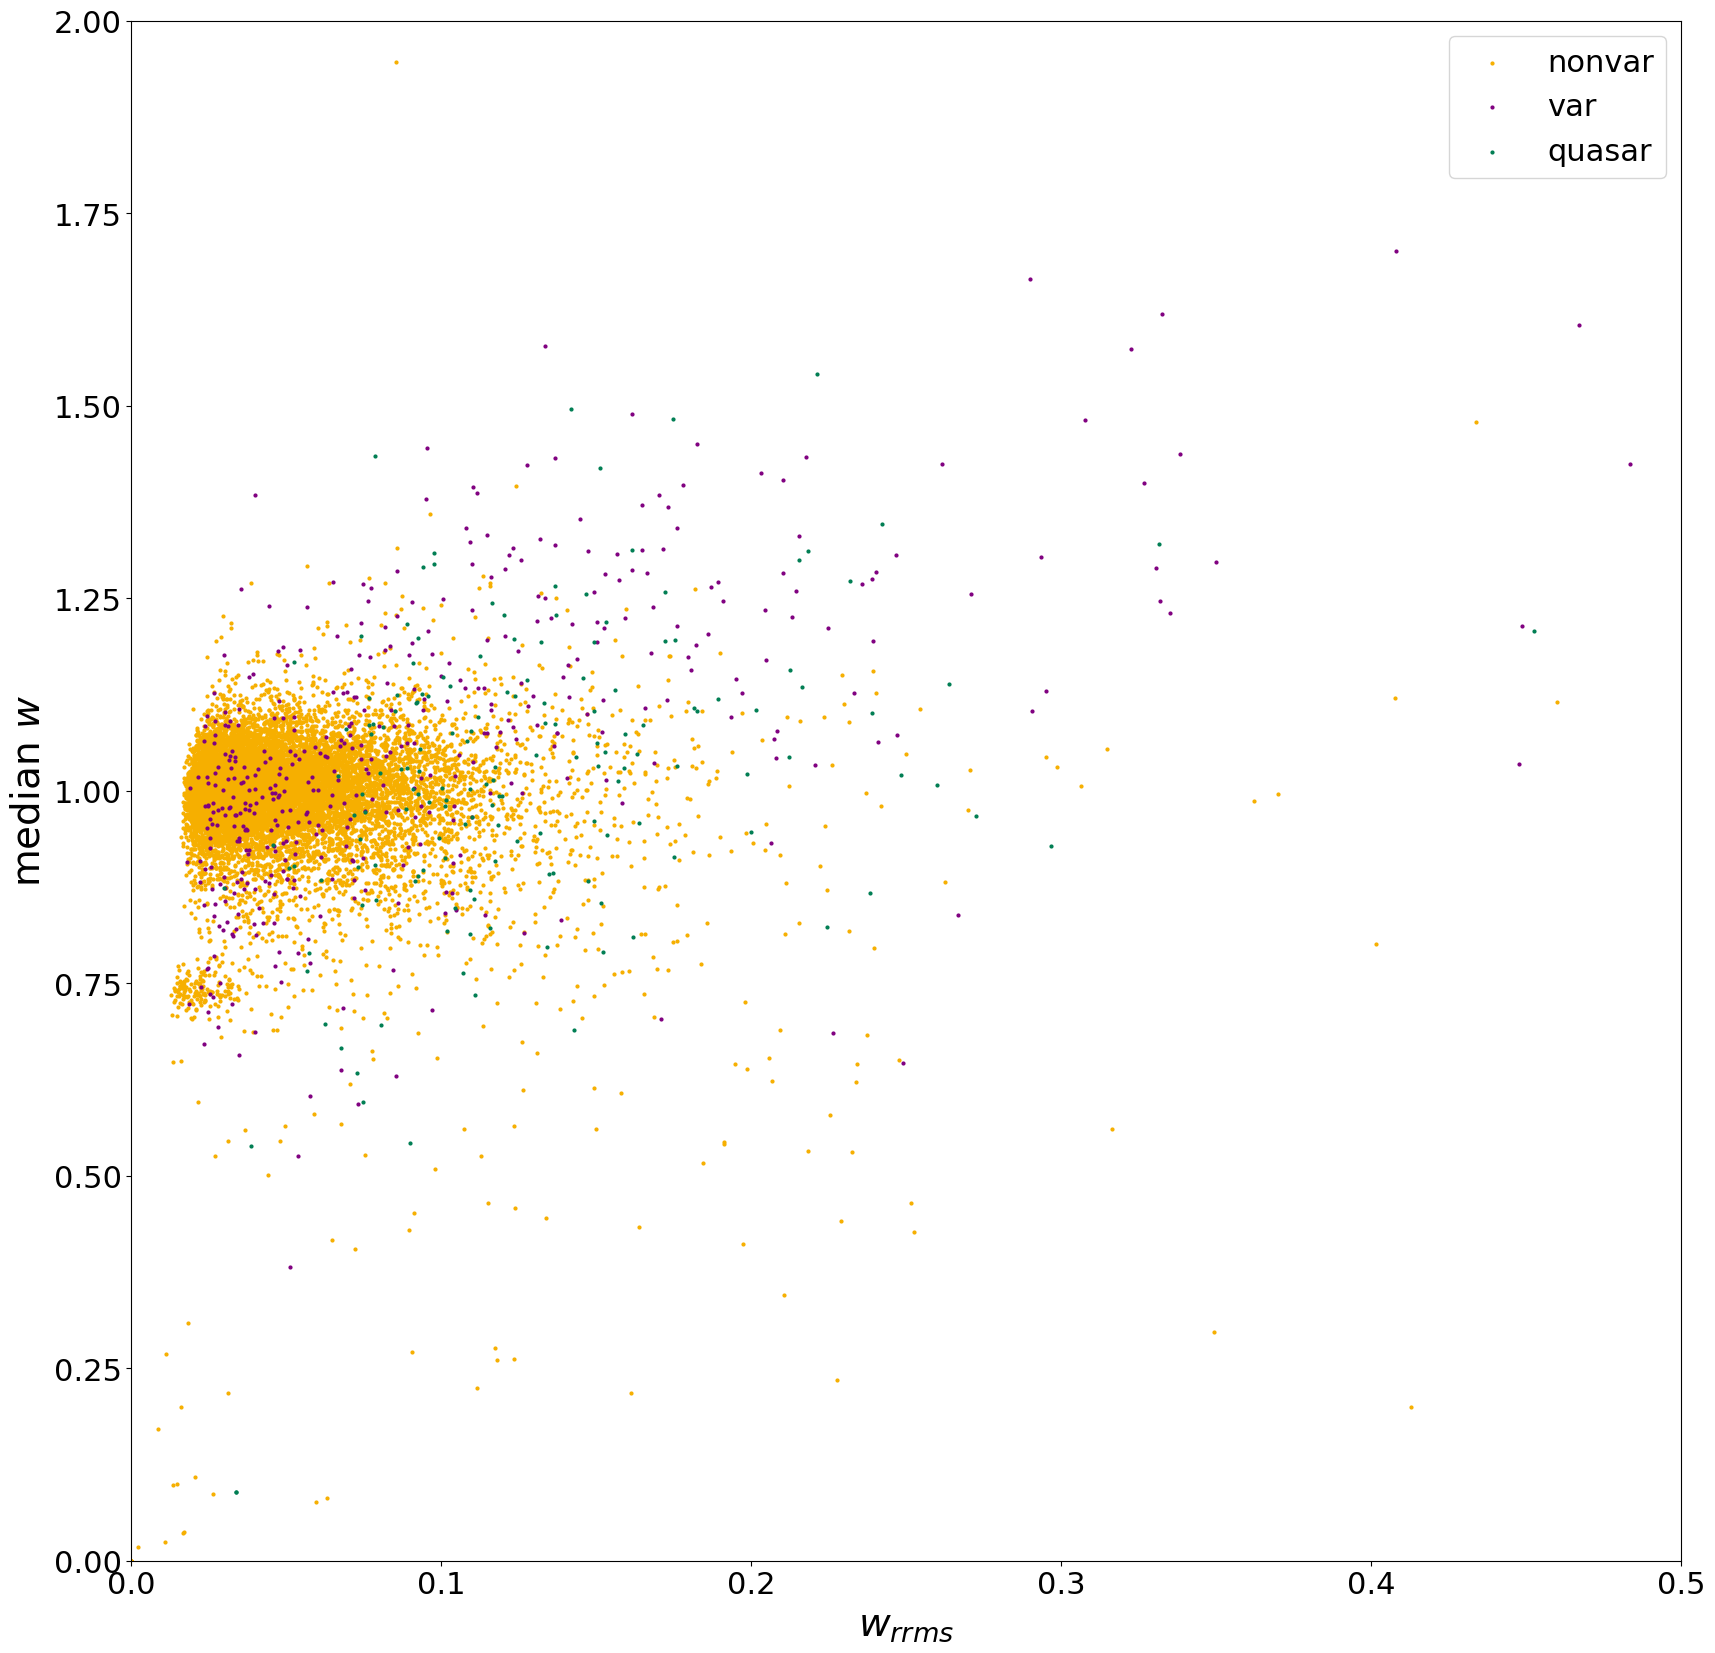

In [17]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('$w_{rrms}$')
plt.ylabel('median $w$')

plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=CN, s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=CV,   s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=CQ,  s=S, label='quasar', alpha=AV)
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

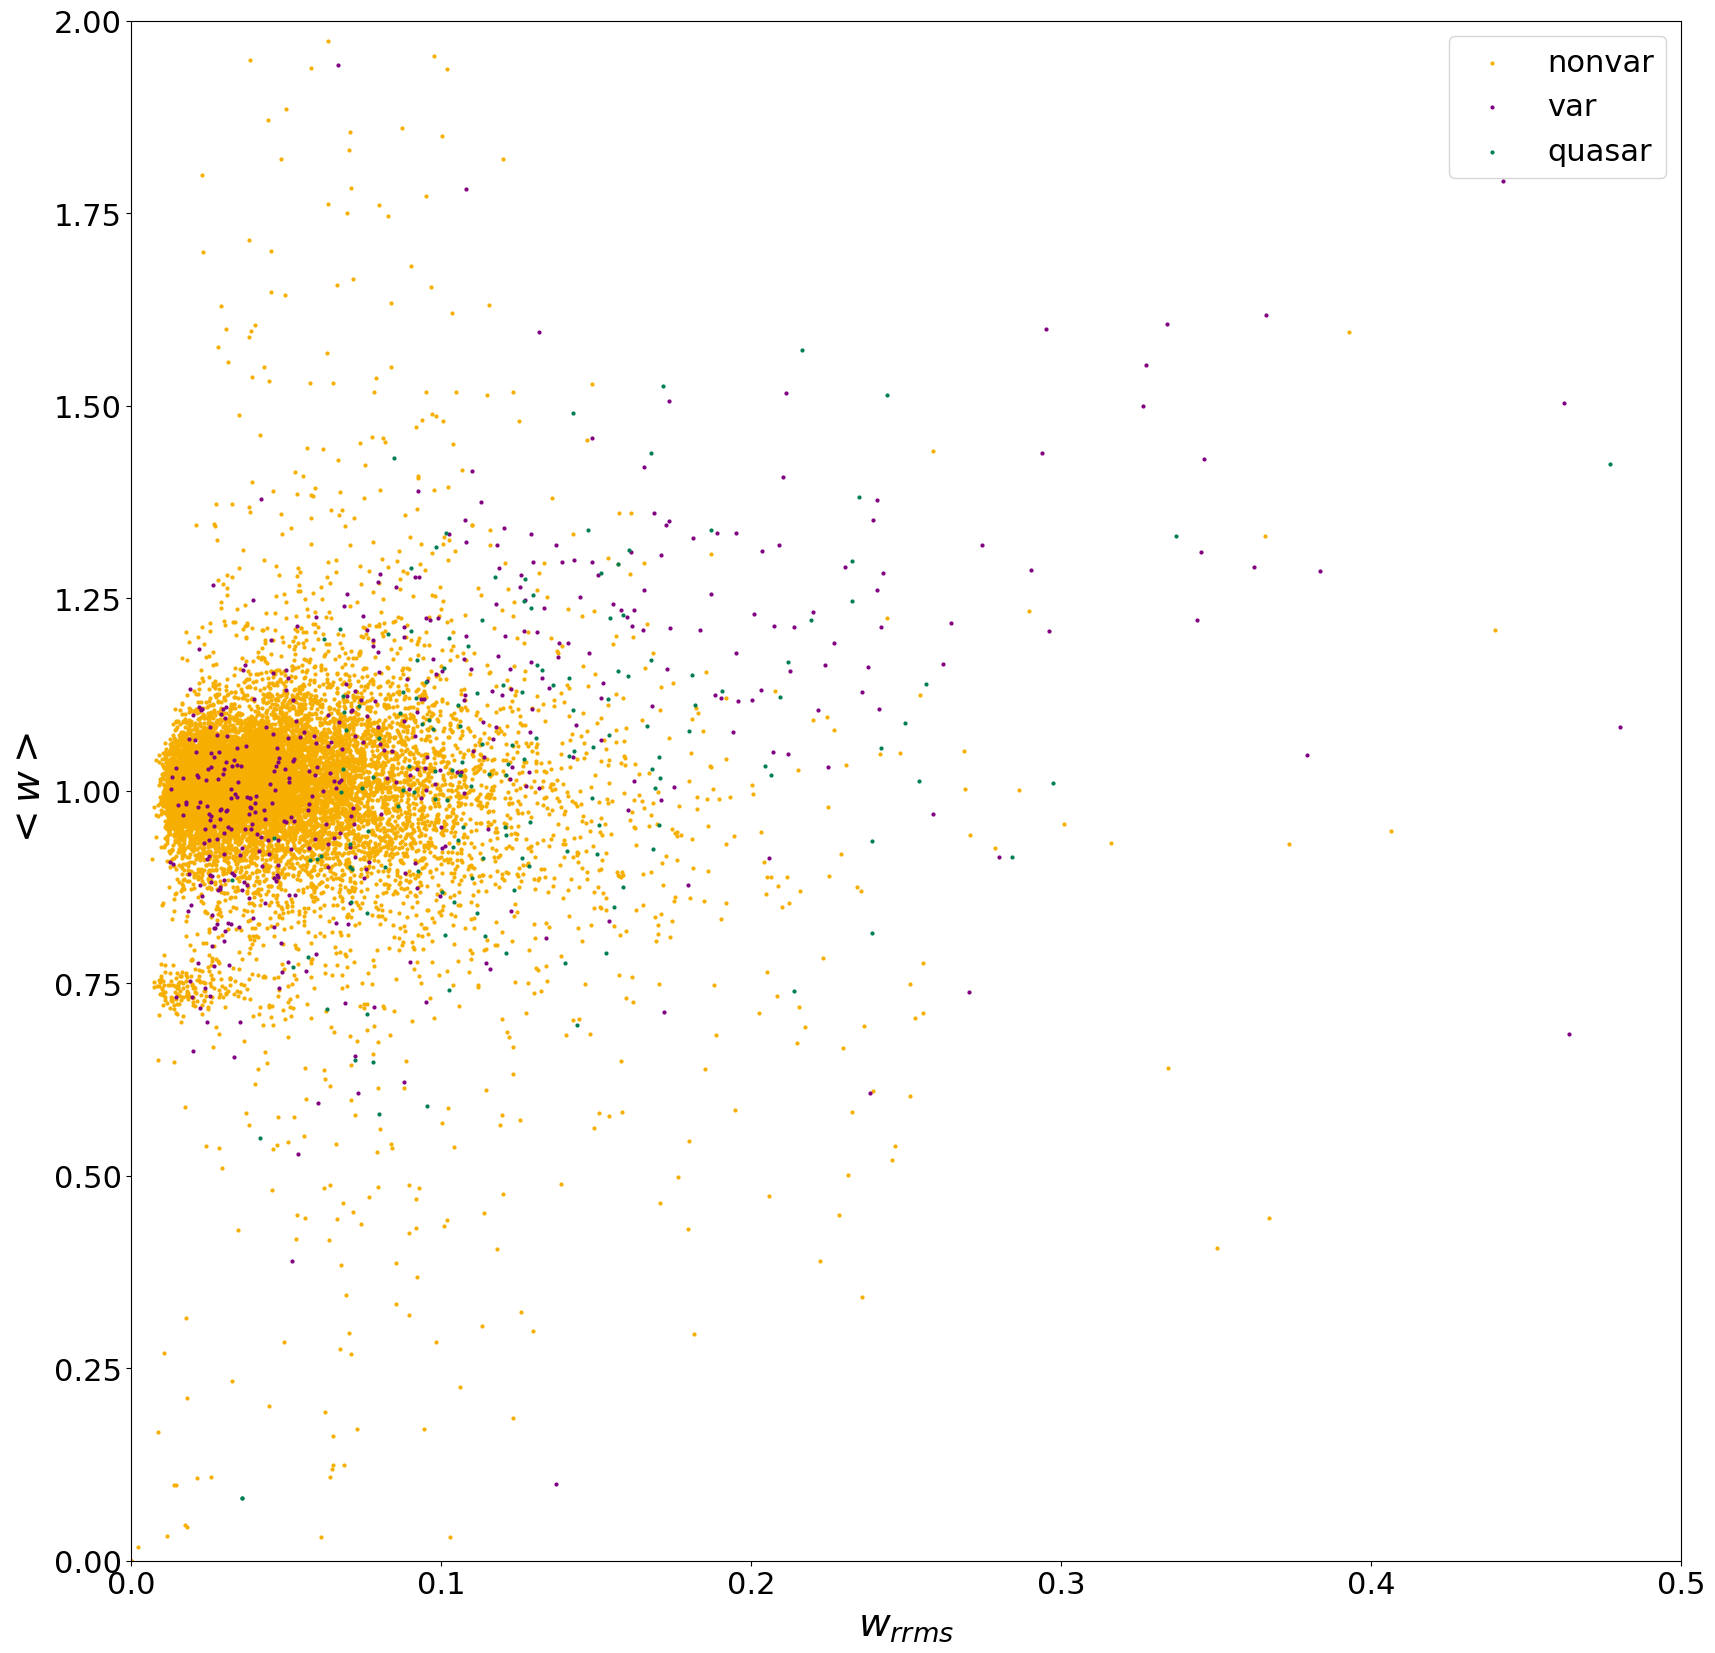

In [37]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('$w_{rrms}$')
plt.ylabel('$<w>$')

plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

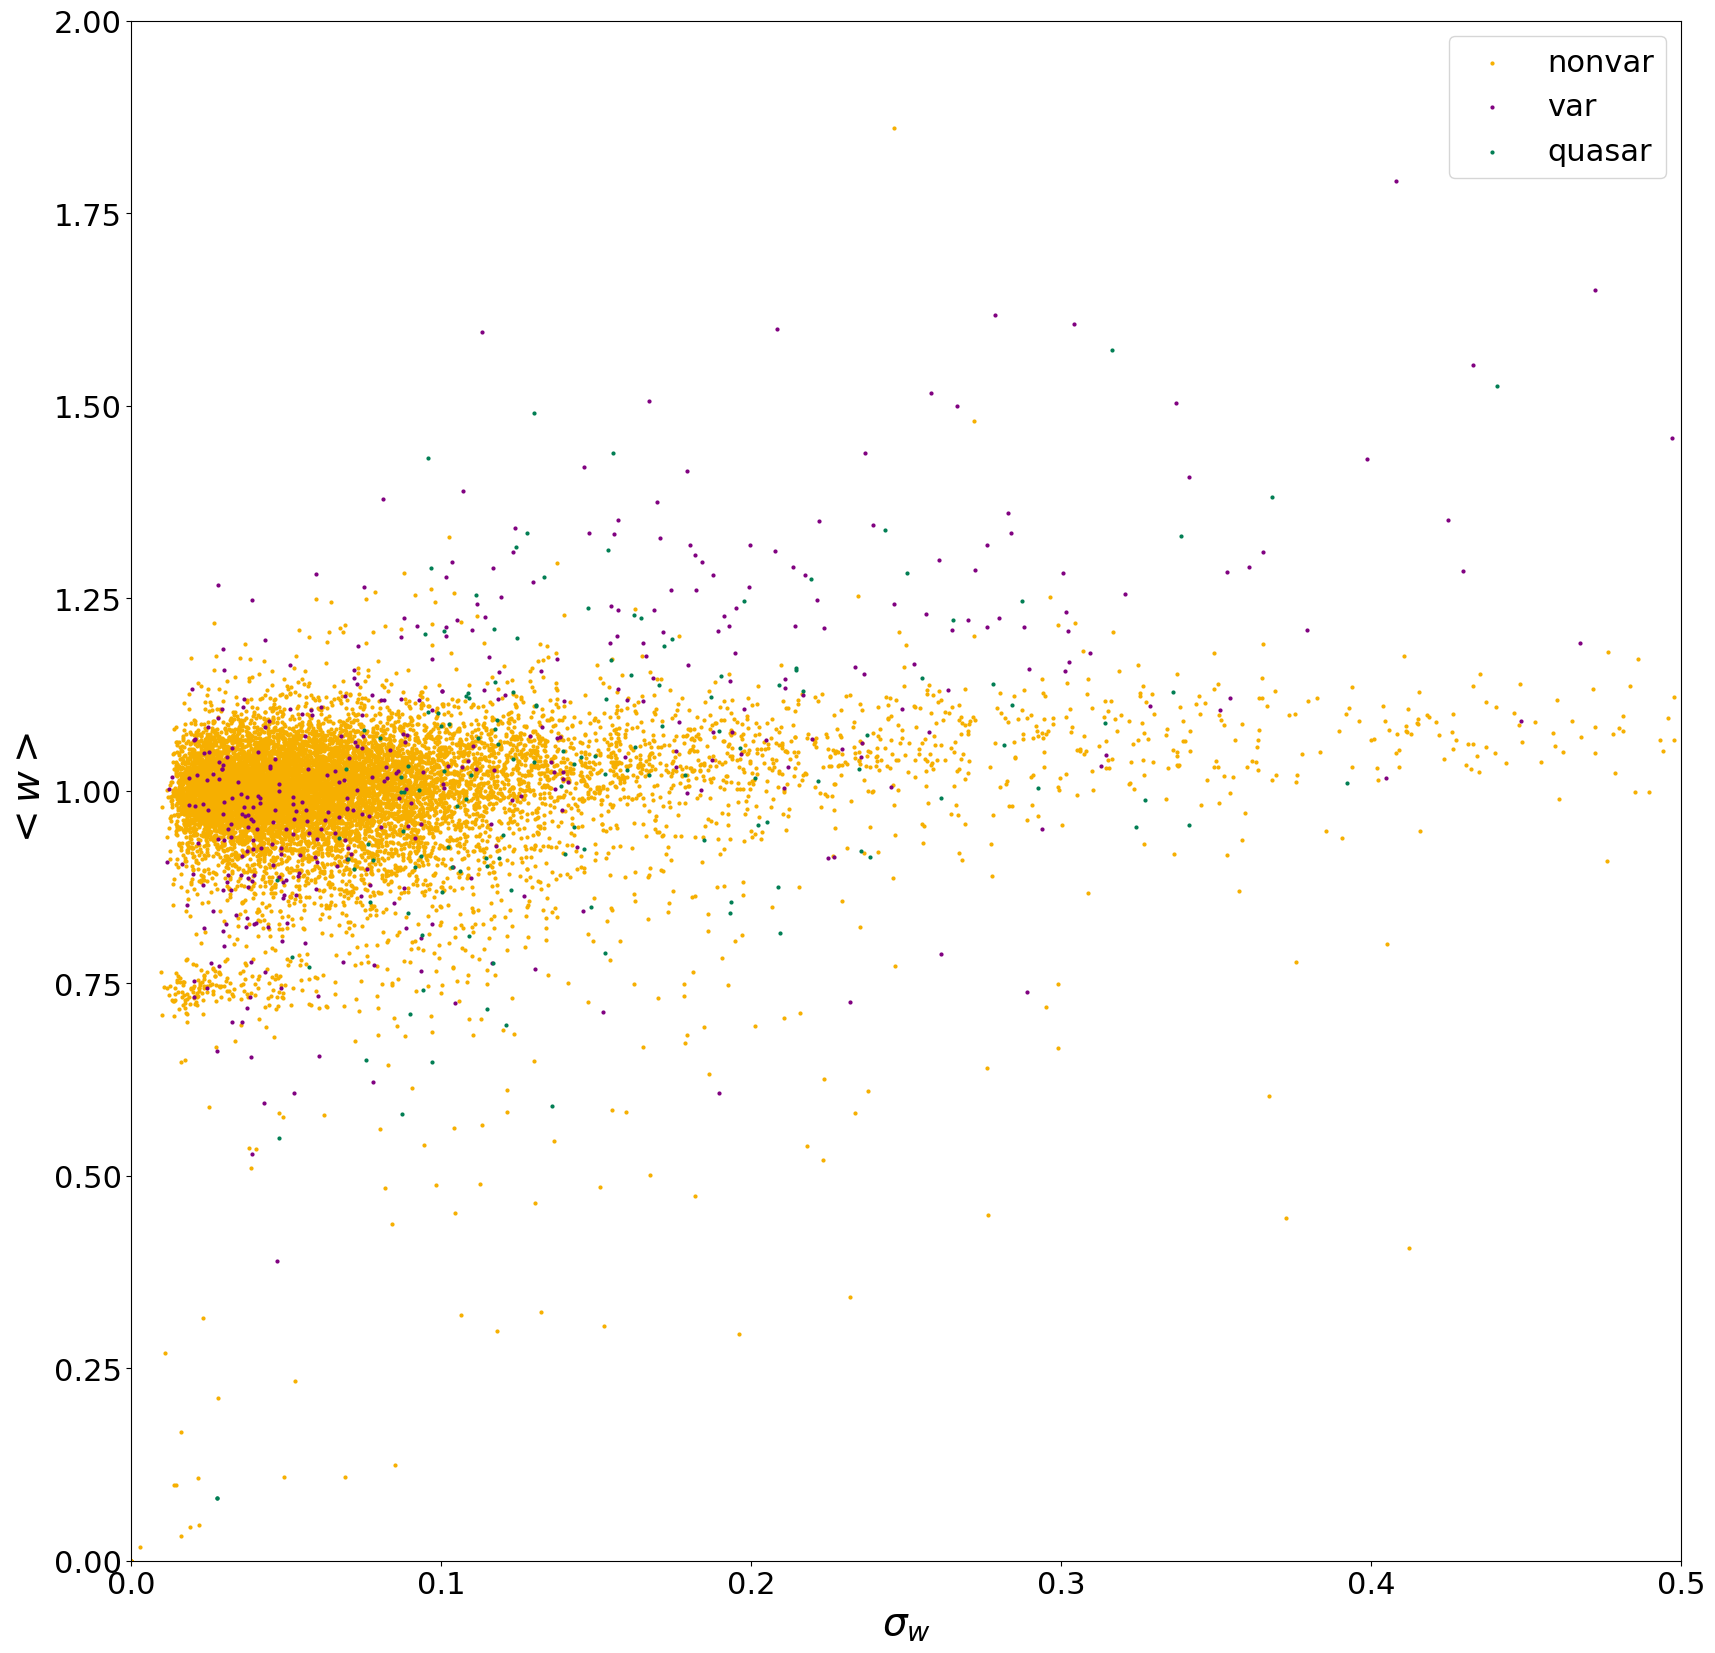

In [38]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('$\\sigma_w$')
plt.ylabel('$<w>$')

plt.scatter(nonvar_subset[W_STD_COLNAME], nonvar_subset[W_MEAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[W_STD_COLNAME],    var_subset[W_MEAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[W_STD_COLNAME], quasar_subset[W_MEAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

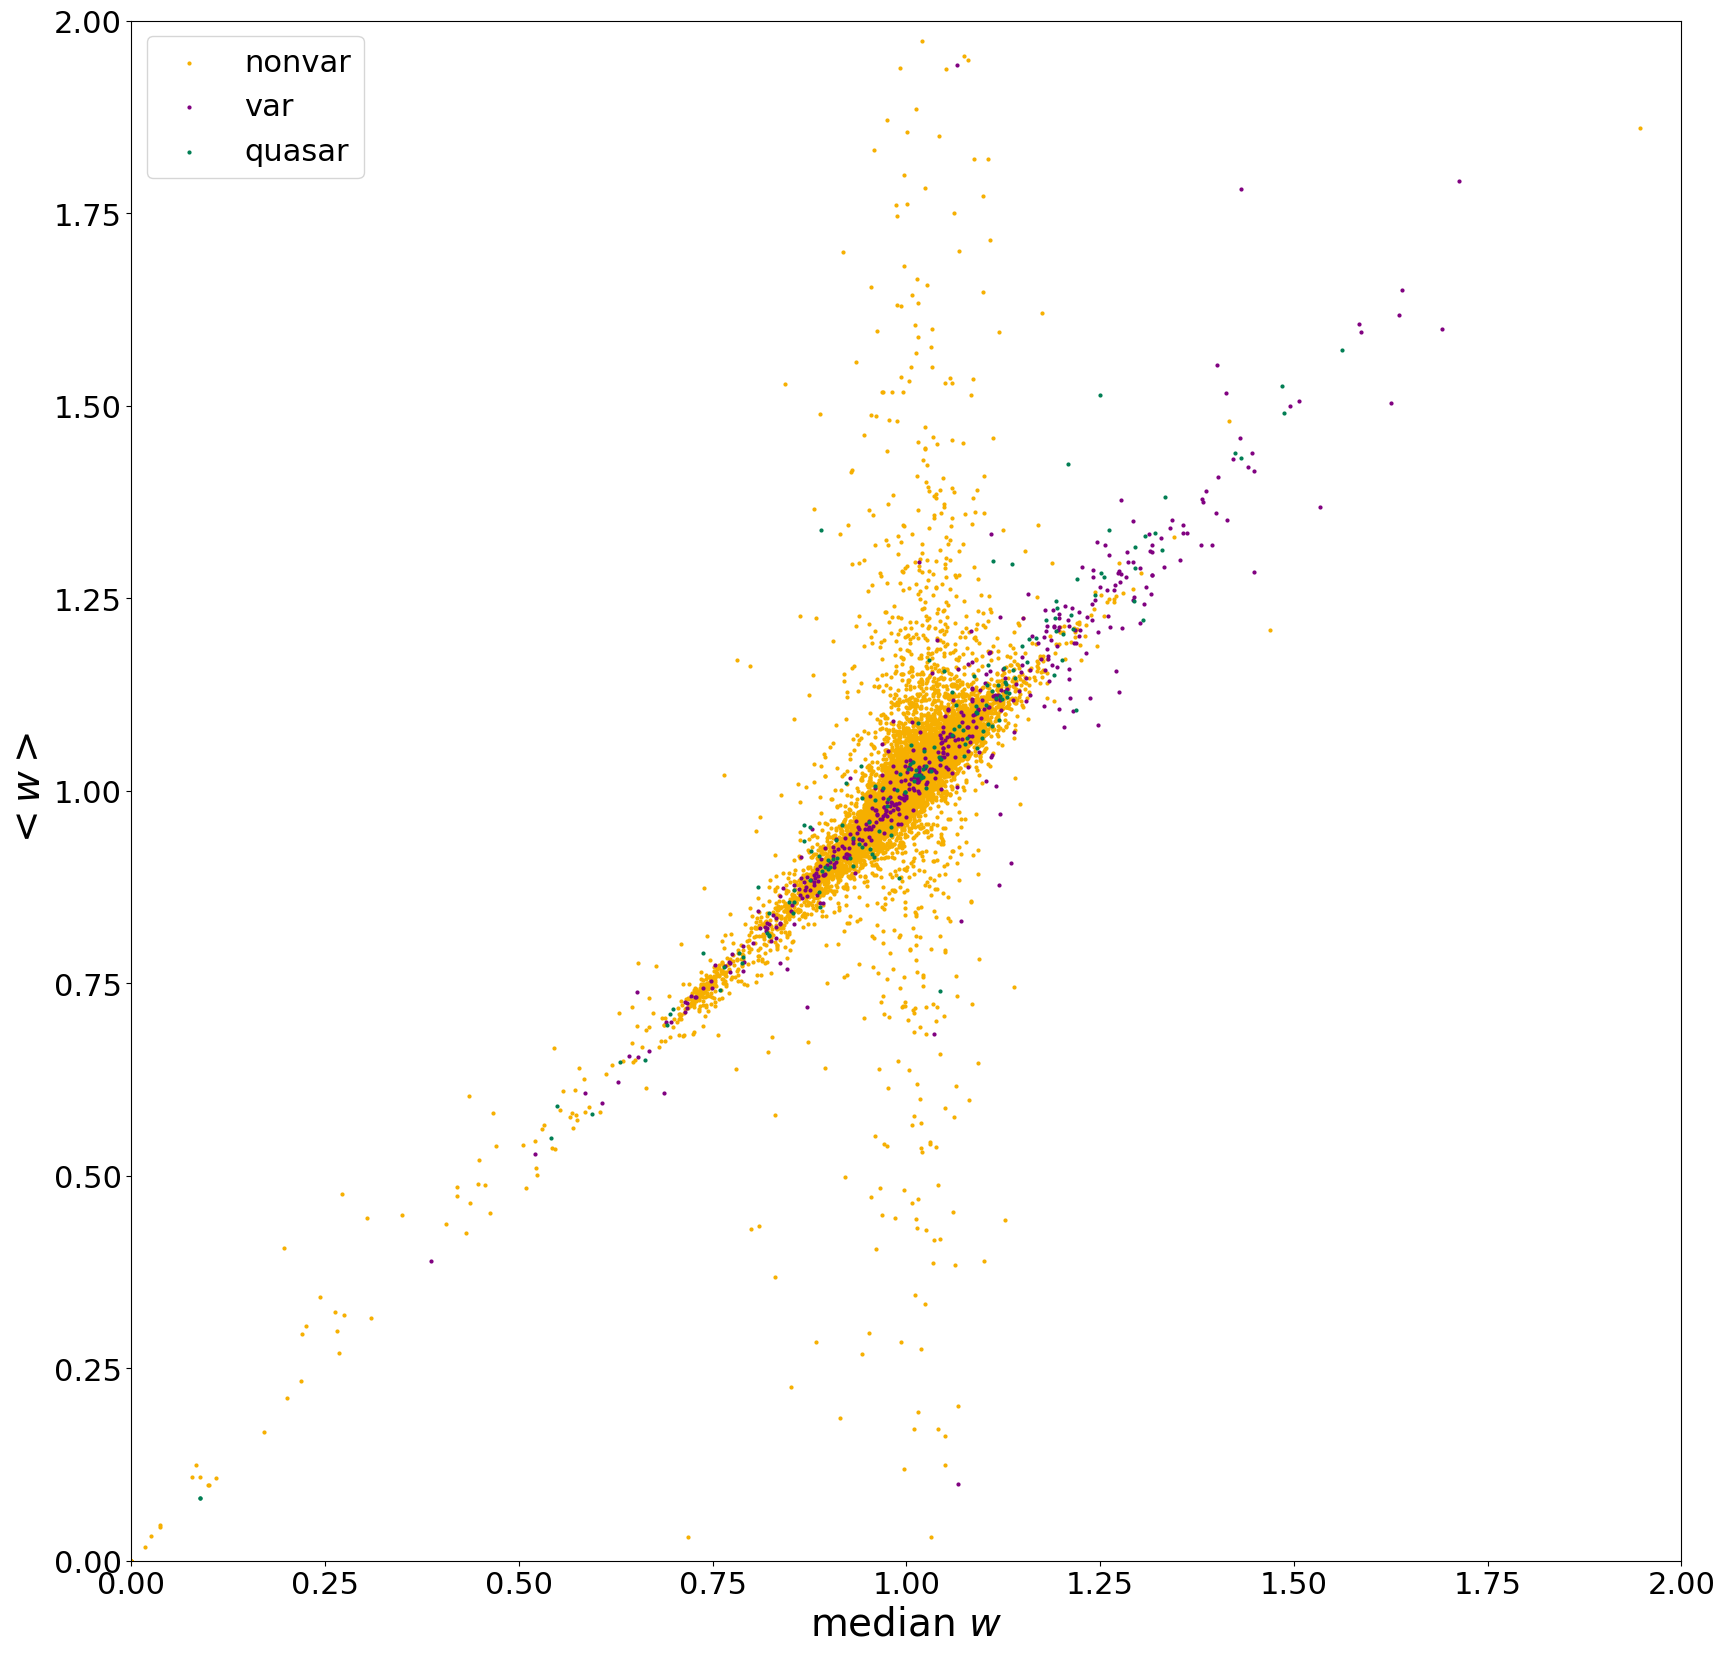

In [39]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_W, MAX_W)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('median $w$')
plt.ylabel('$<w>$')

plt.scatter(nonvar_subset[W_MEDIAN_COLNAME], nonvar_subset[W_MEAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[W_MEDIAN_COLNAME],    var_subset[W_MEAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[W_MEDIAN_COLNAME], quasar_subset[W_MEAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

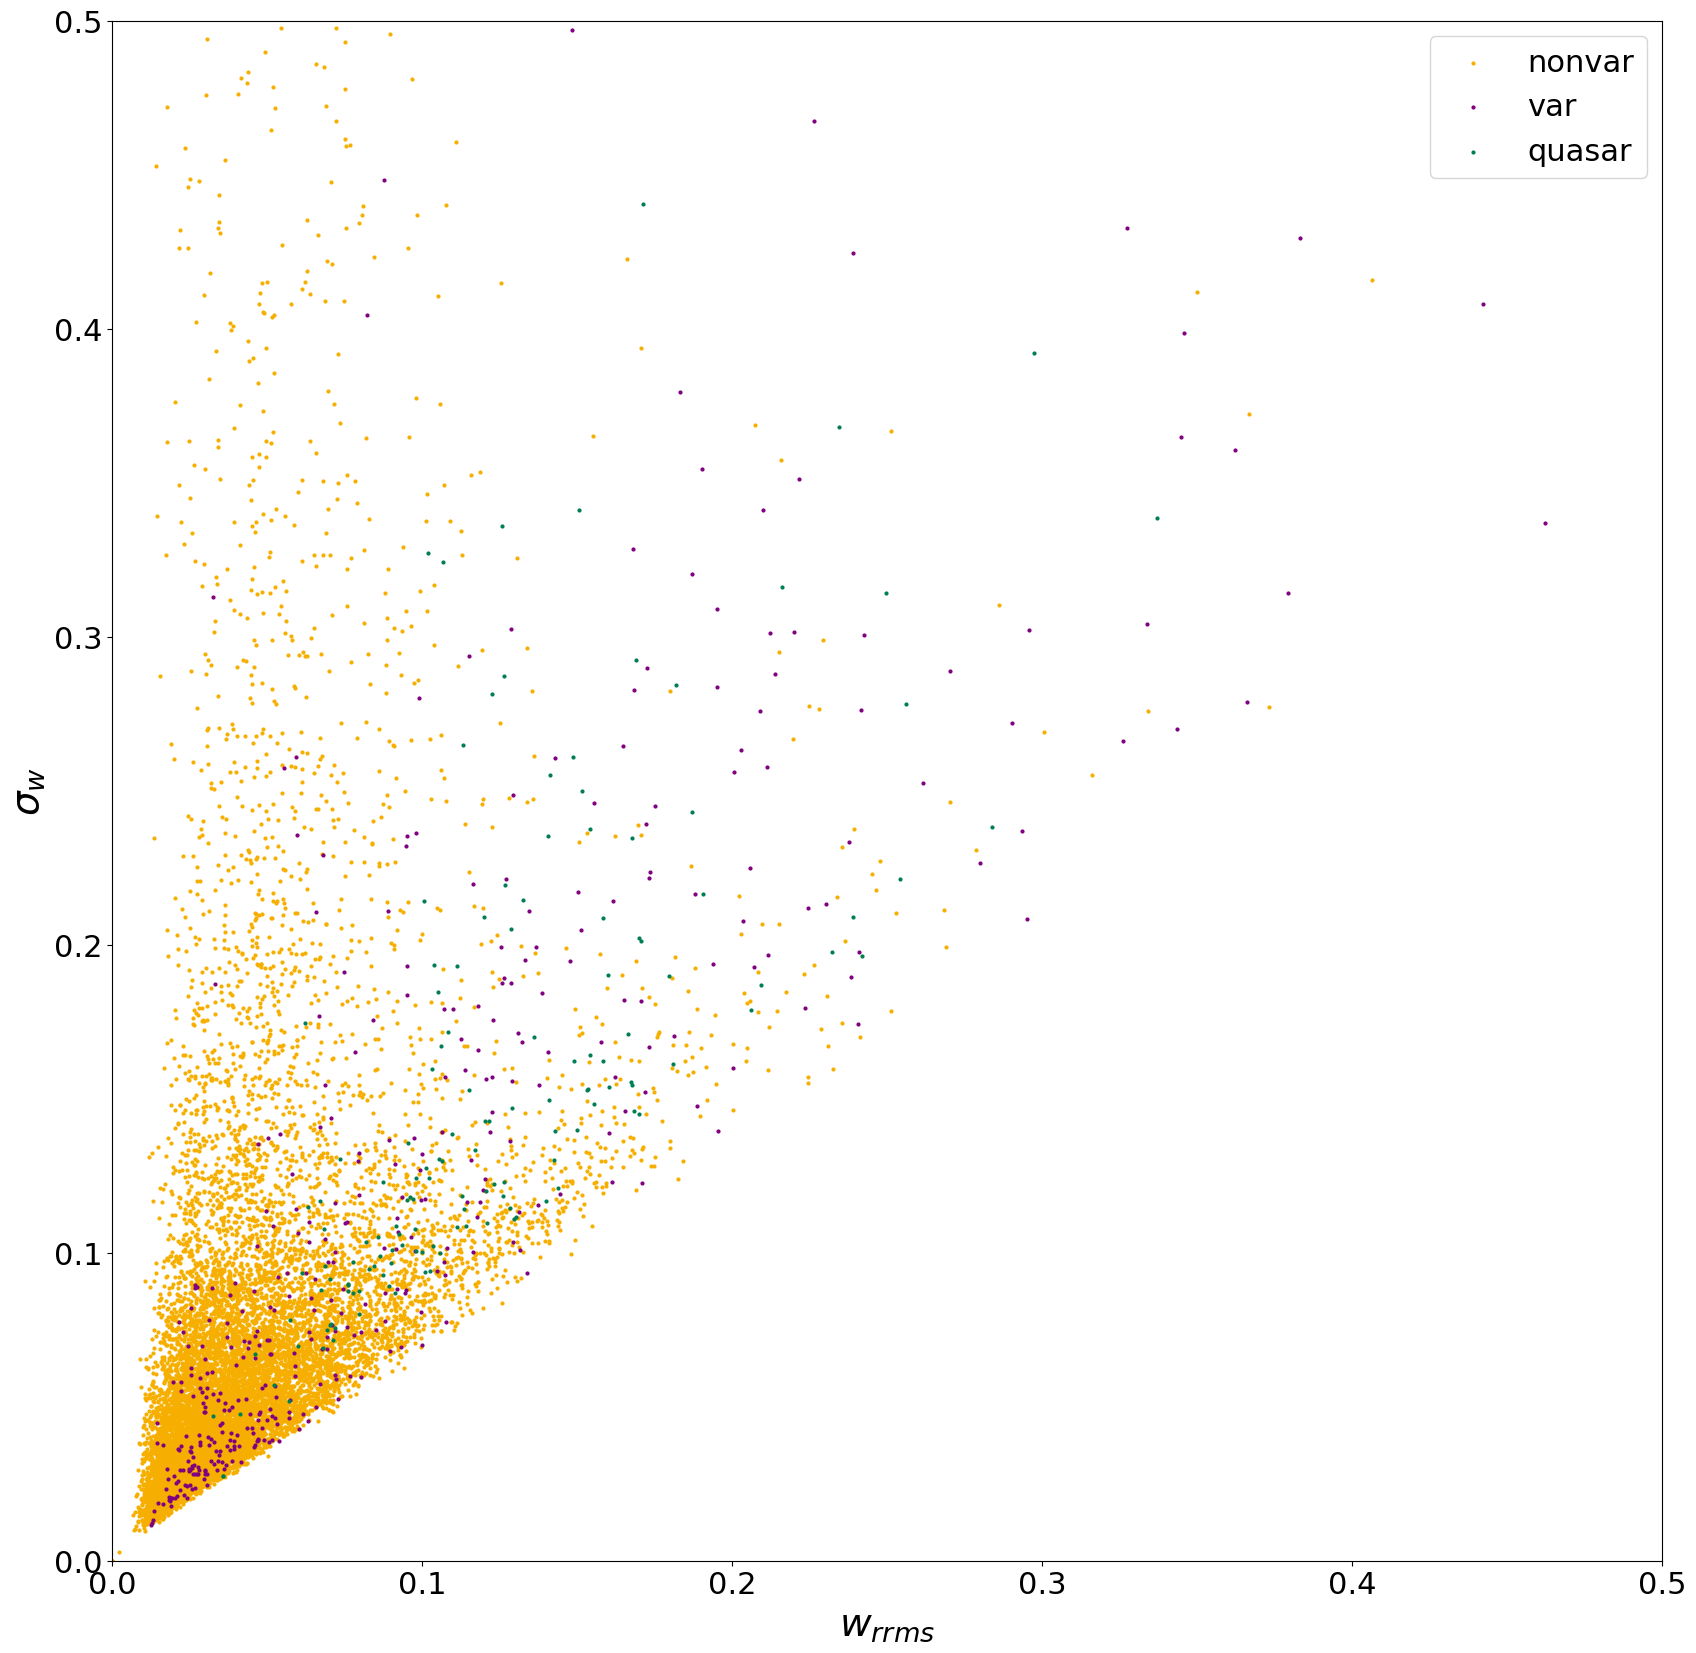

In [40]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_SGW, MAX_SGW)

plt.xlabel('$w_{rrms}$')
plt.ylabel('$\\sigma_w$')

plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_STD_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_STD_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_STD_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

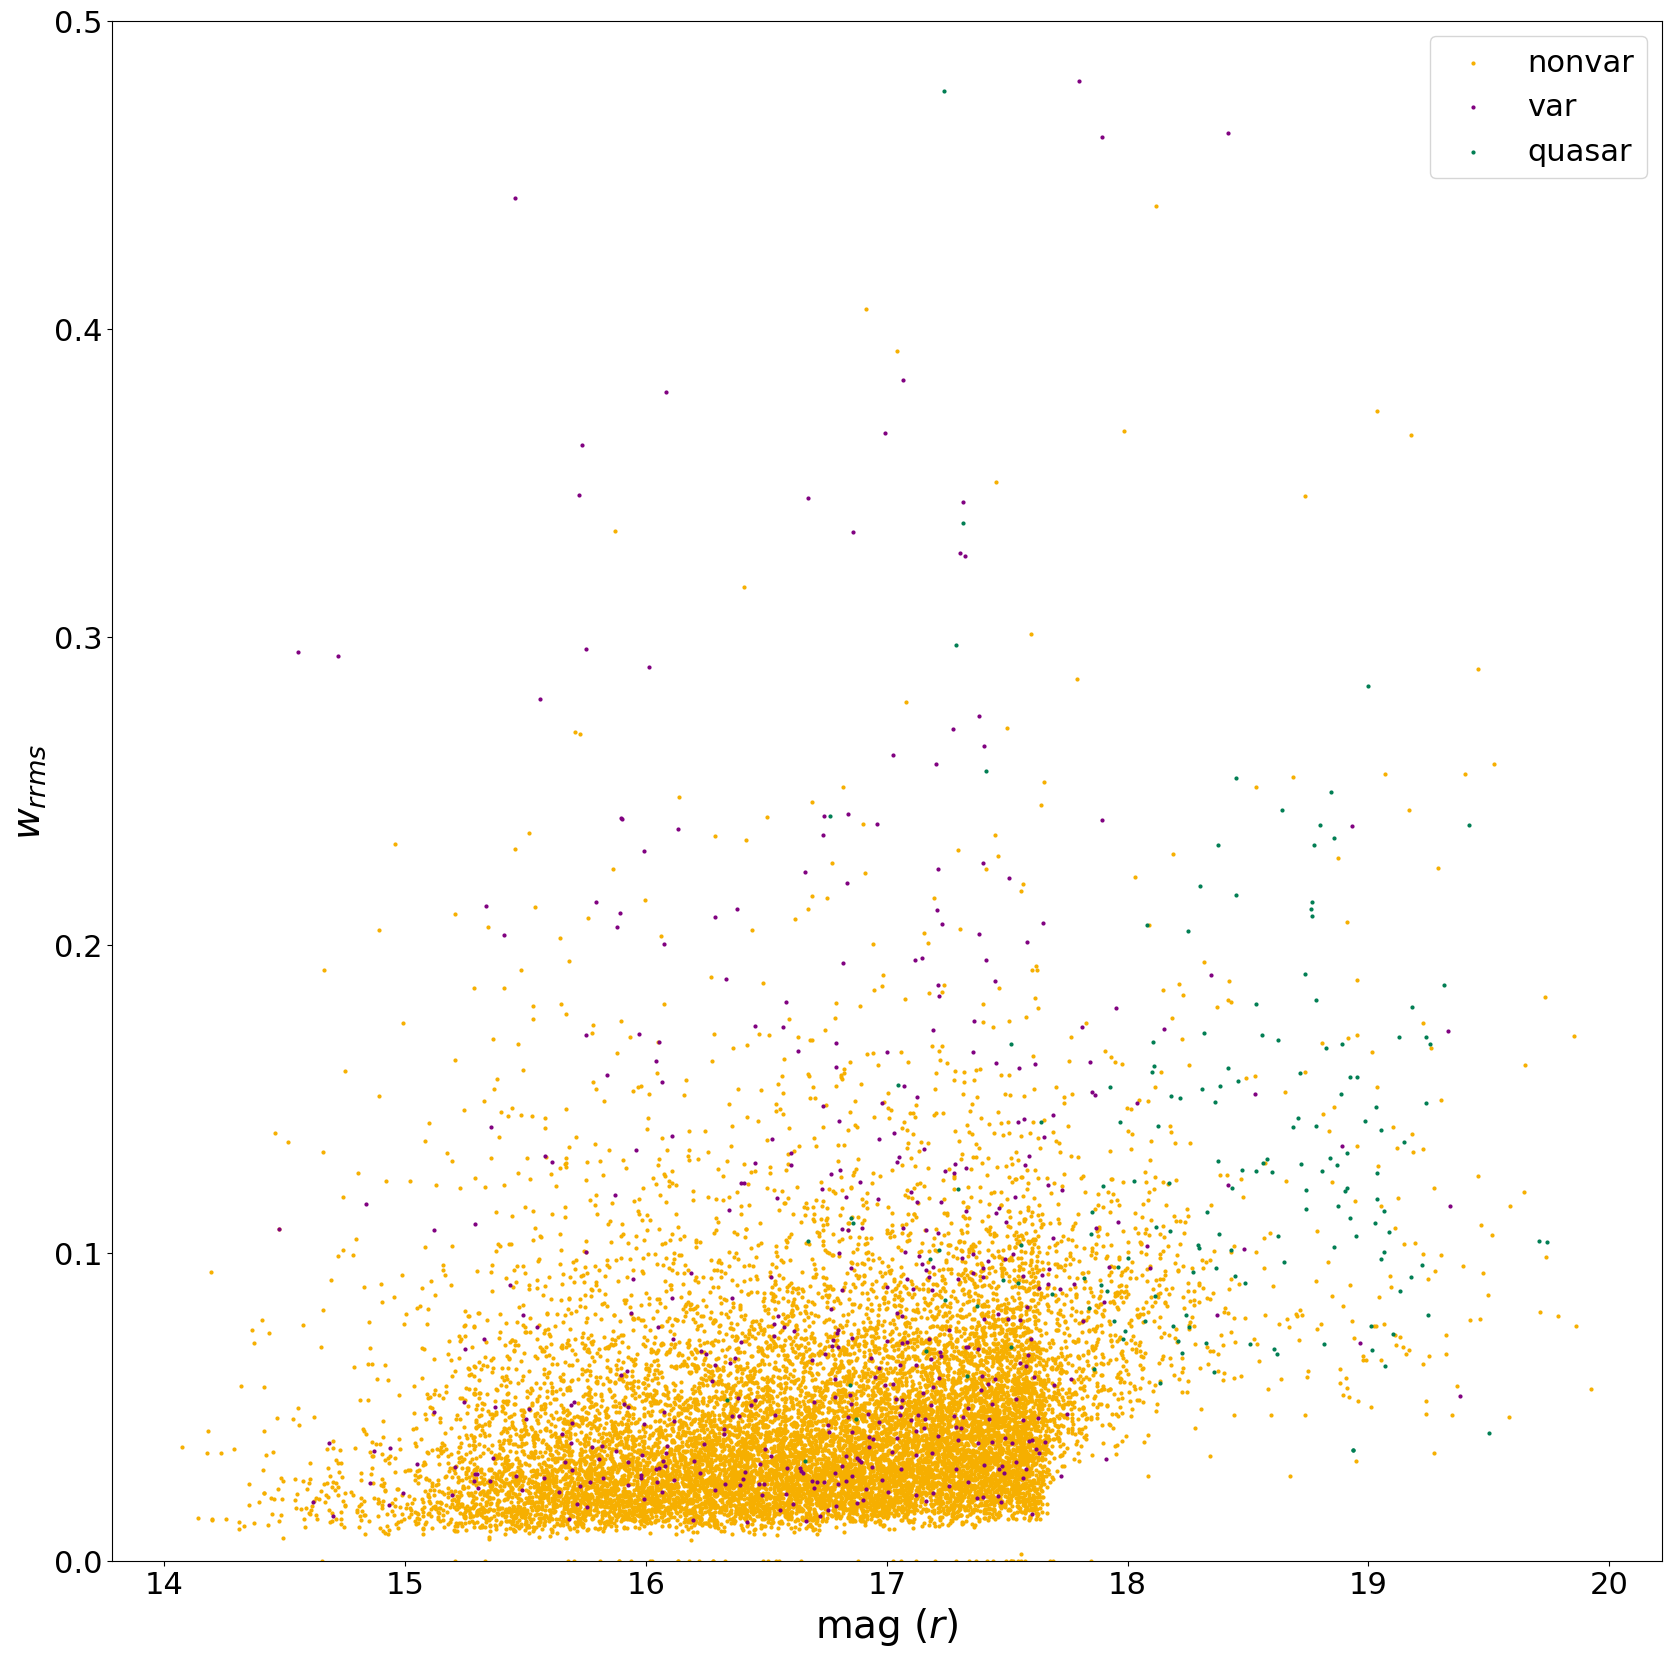

In [41]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_SGW, MAX_SGW)

plt.xlabel('mag ($r$)')
plt.ylabel('$w_{rrms}$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[SGW_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[SGW_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[SGW_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

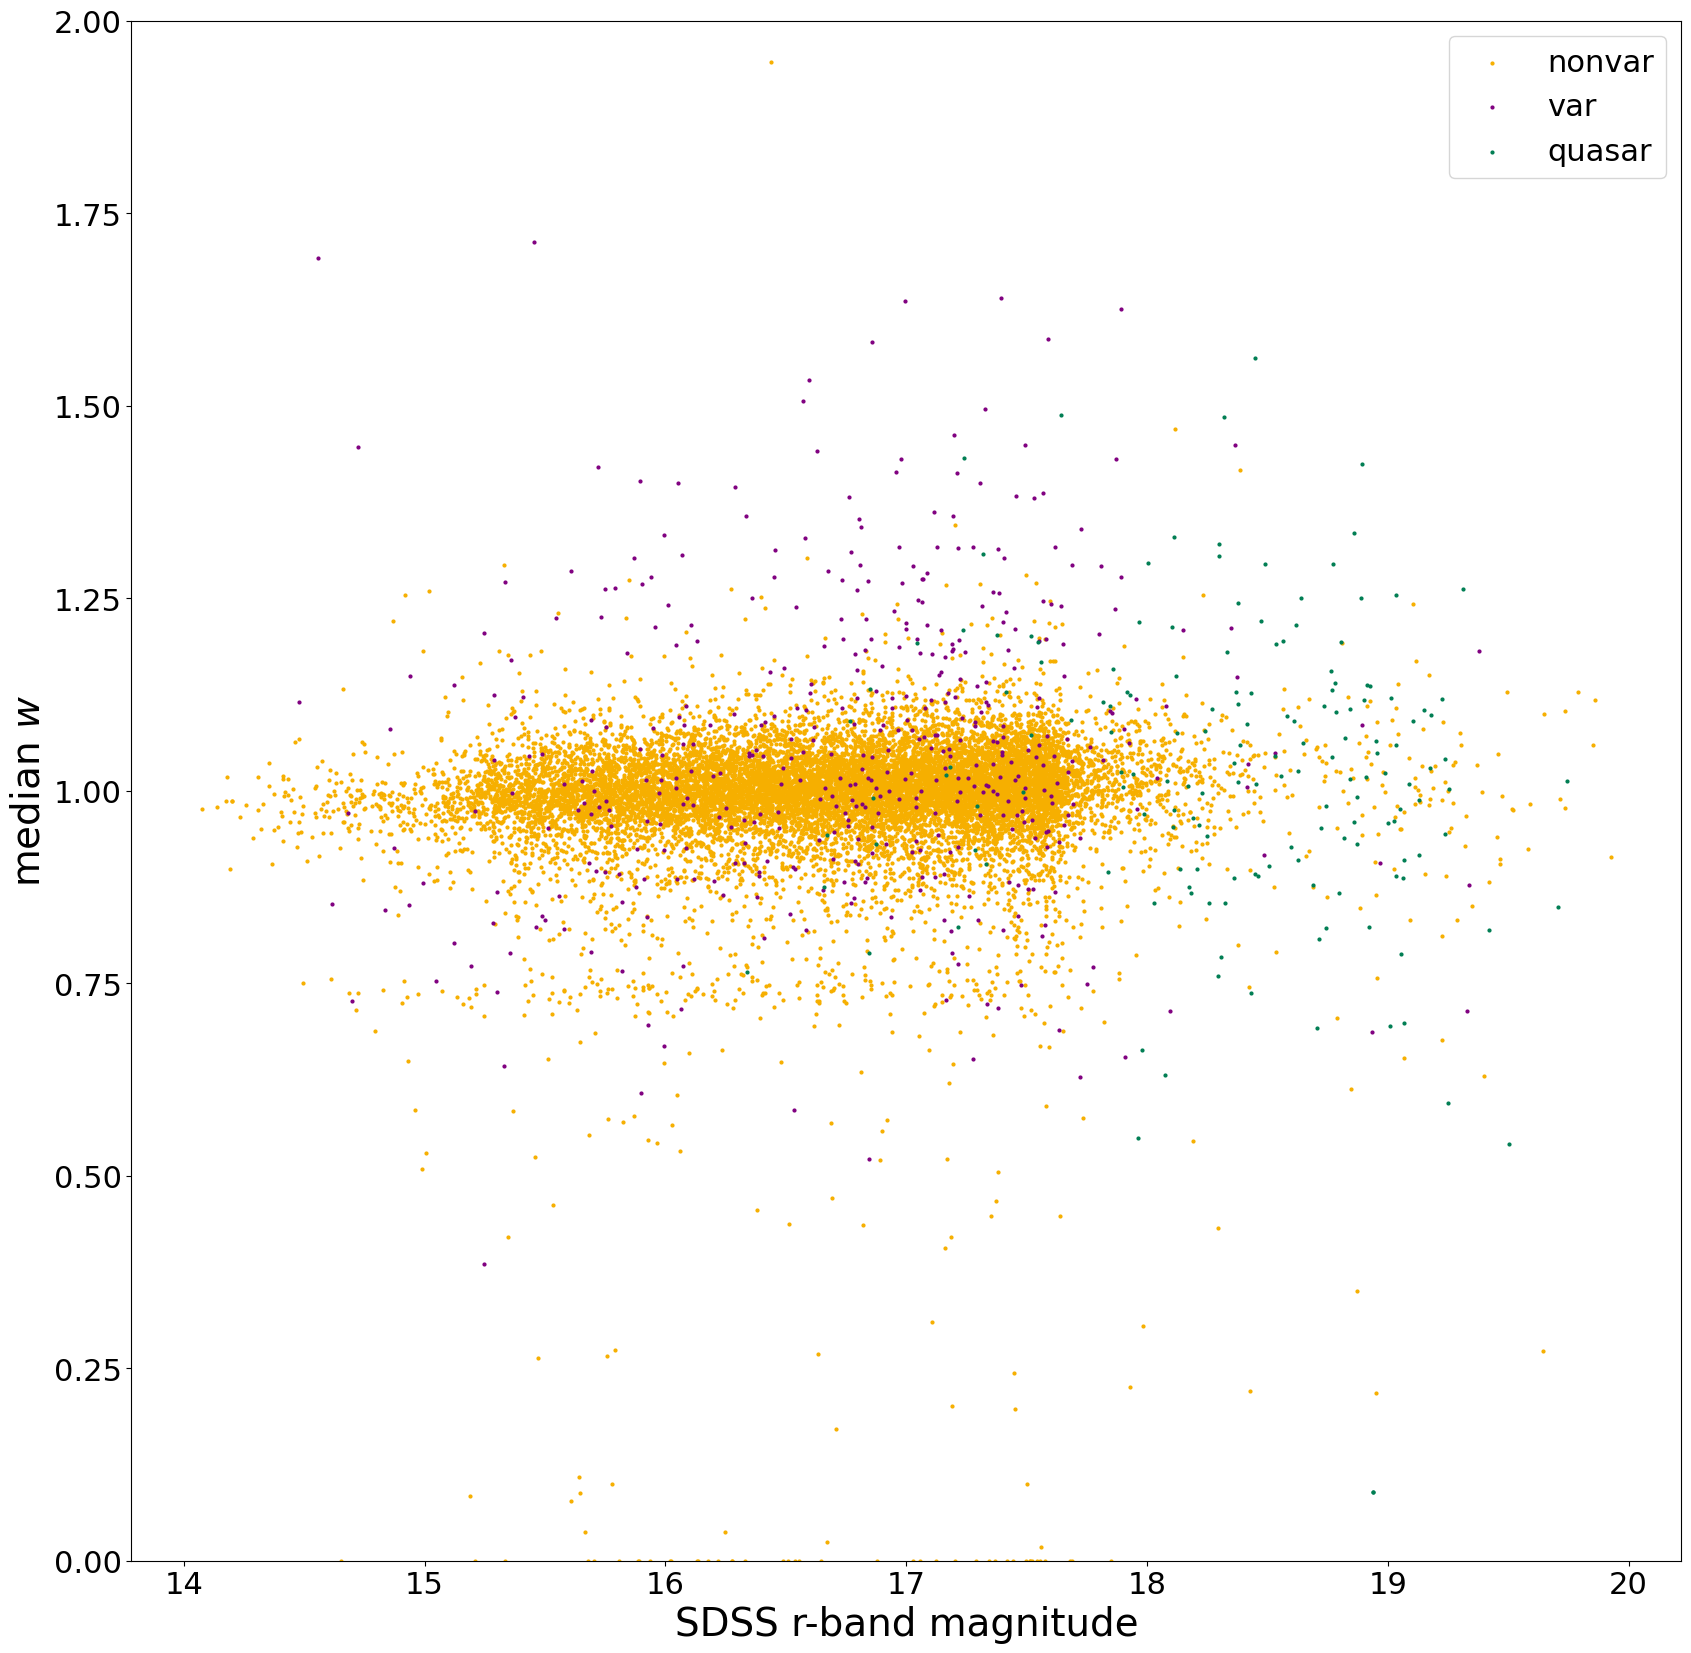

In [42]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)

plt.xlabel('SDSS r-band magnitude')
plt.ylabel('median $w$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=CV,  s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AQ)

plt.legend()
plt.show()

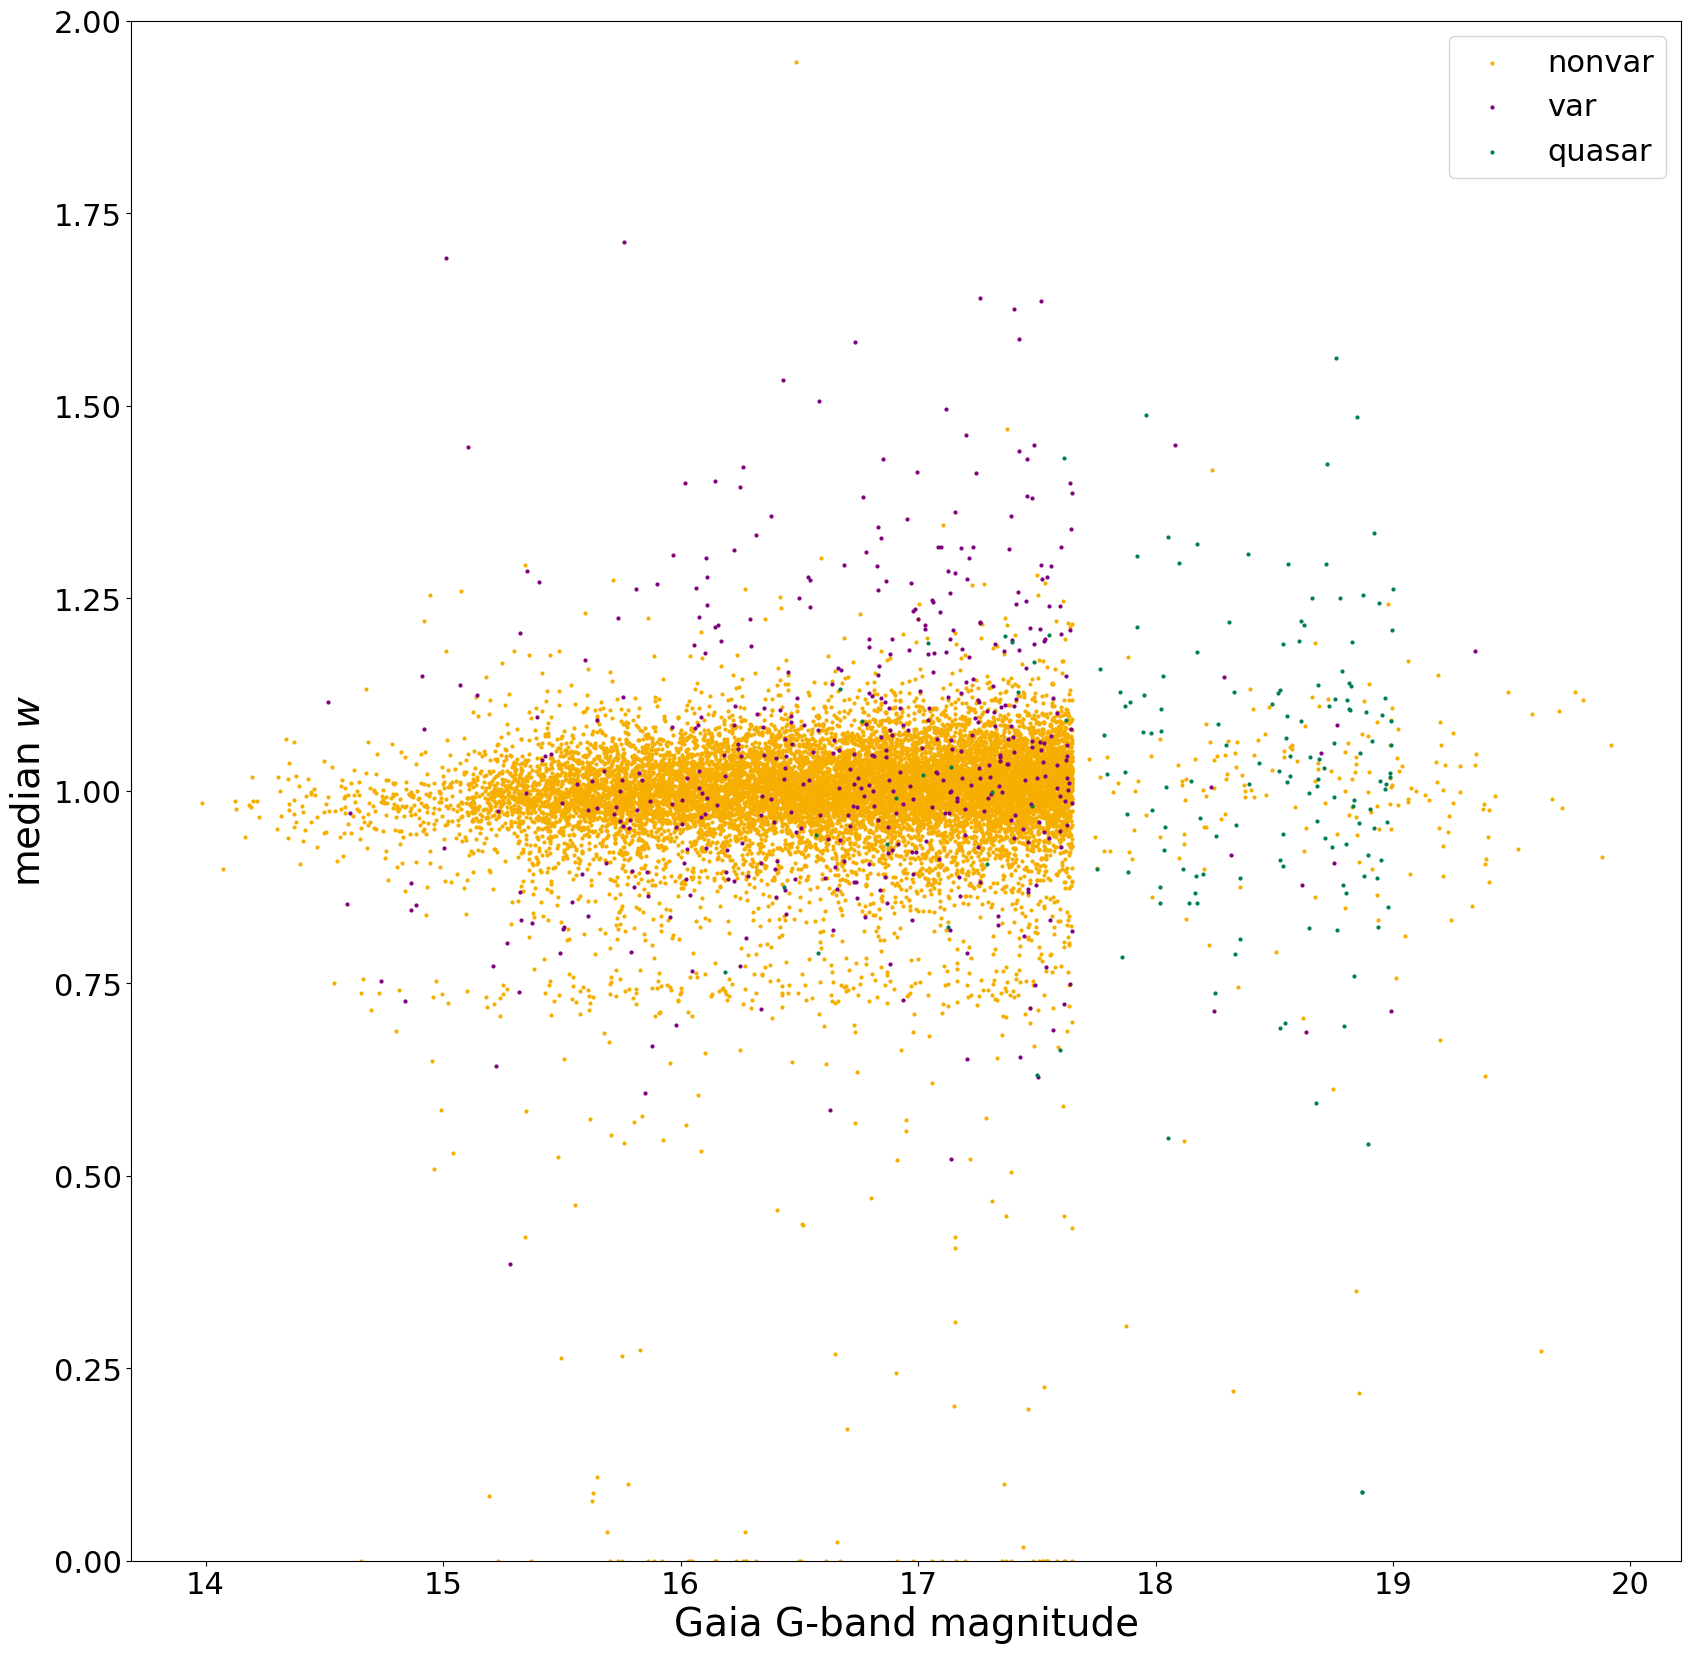

In [43]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)

plt.xlabel('Gaia G-band magnitude')
plt.ylabel('median $w$')

plt.scatter(nonvar_subset[GAIA_G_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[GAIA_G_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=CV,  s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[GAIA_G_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AQ)

plt.legend()
plt.show()

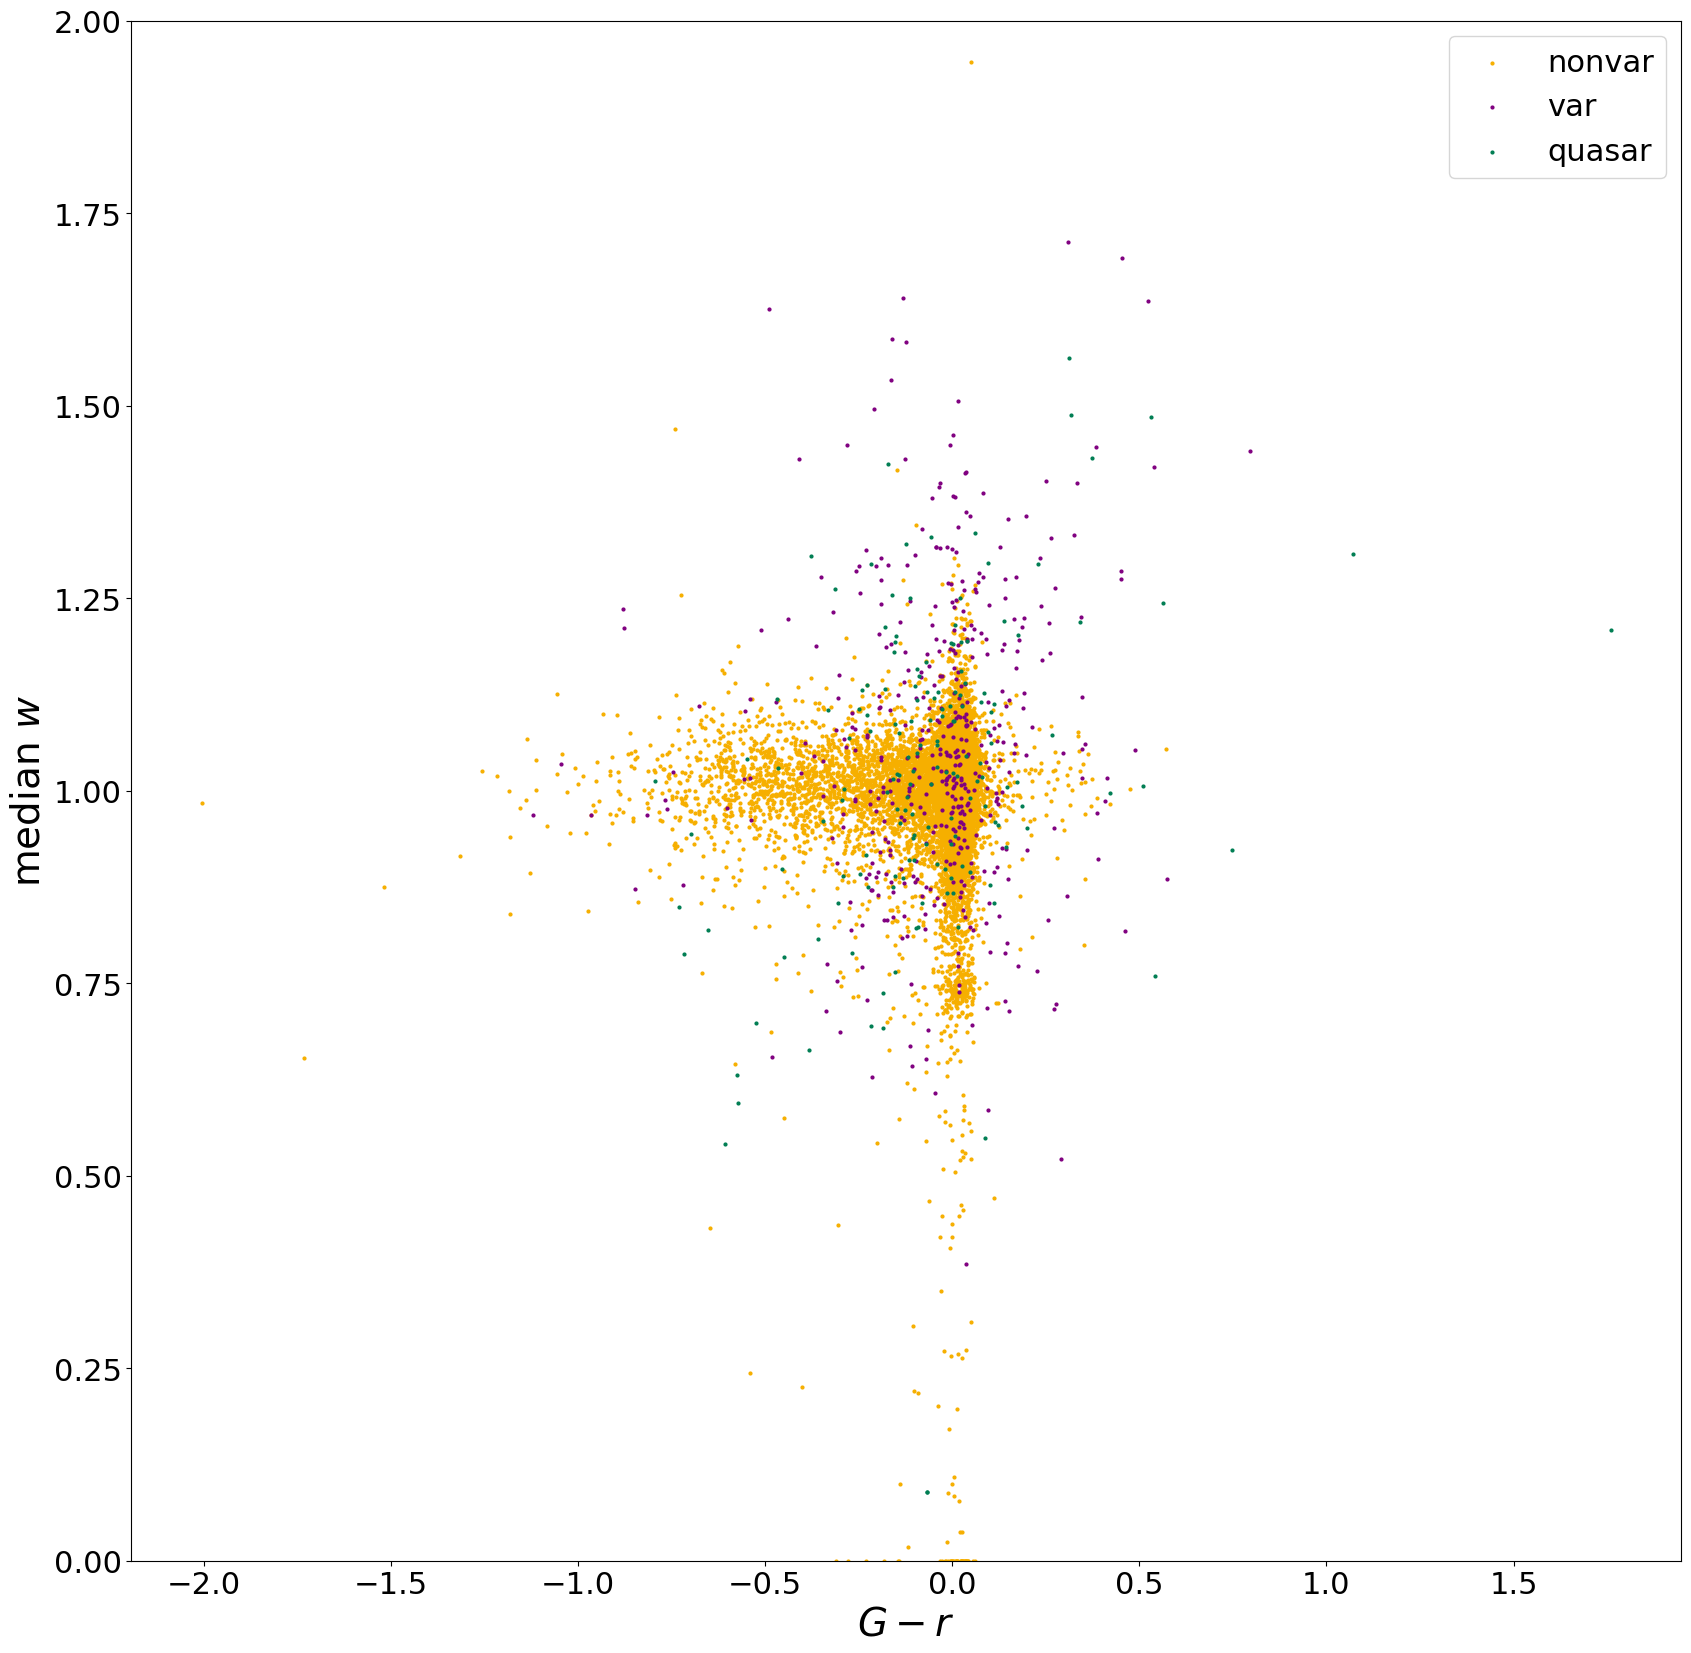

In [44]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)

plt.xlabel('$G-r$')
plt.ylabel('median $w$')

mag_diff = lambda x: x[GAIA_G_COLNAME] - x[R_MAG_COLNAME]

plt.scatter(mag_diff(nonvar_subset), nonvar_subset[W_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(mag_diff(var_subset),    var_subset[W_MEDIAN_COLNAME],    c=CV,  s=S, label='var',    alpha=AV)
plt.scatter(mag_diff(quasar_subset), quasar_subset[W_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AQ)

plt.legend()
plt.show()

In [45]:
from astroquery.gaia import Gaia

query = 'SELECT gs.source_id, gs.phot_bp_rp_excess_factor FROM gaiadr3.gaia_source gs \
         WHERE (gs.ra < 60 OR gs.ra > 300) AND (gs.dec > -1.67 AND gs.dec < 1.67) \
         AND gs.source_id IN ({})'.format(str(list(DF.source_id))[1:-1])

excess_df = Gaia.launch_job_async(query).get_results().to_pandas()

INFO: Query finished. [astroquery.utils.tap.core]


In [46]:
excess_df

source_id  phot_bp_rp_excess_factor
0           10892037246720                  1.249677
1           14057428795648                  1.276242
2           14572824839168                  1.209370
3           17867064019328                  1.202976
4           26736172221312                  1.334274
...                    ...                       ...
21172  6917522297428335744                  1.366752
21173  6917522396213398400                  1.242351
21174  6917526691179095040                  1.270784
21175  6917527966785173248                  1.576912
21176  6917528890203987968                  1.170171

[21177 rows x 2 columns]

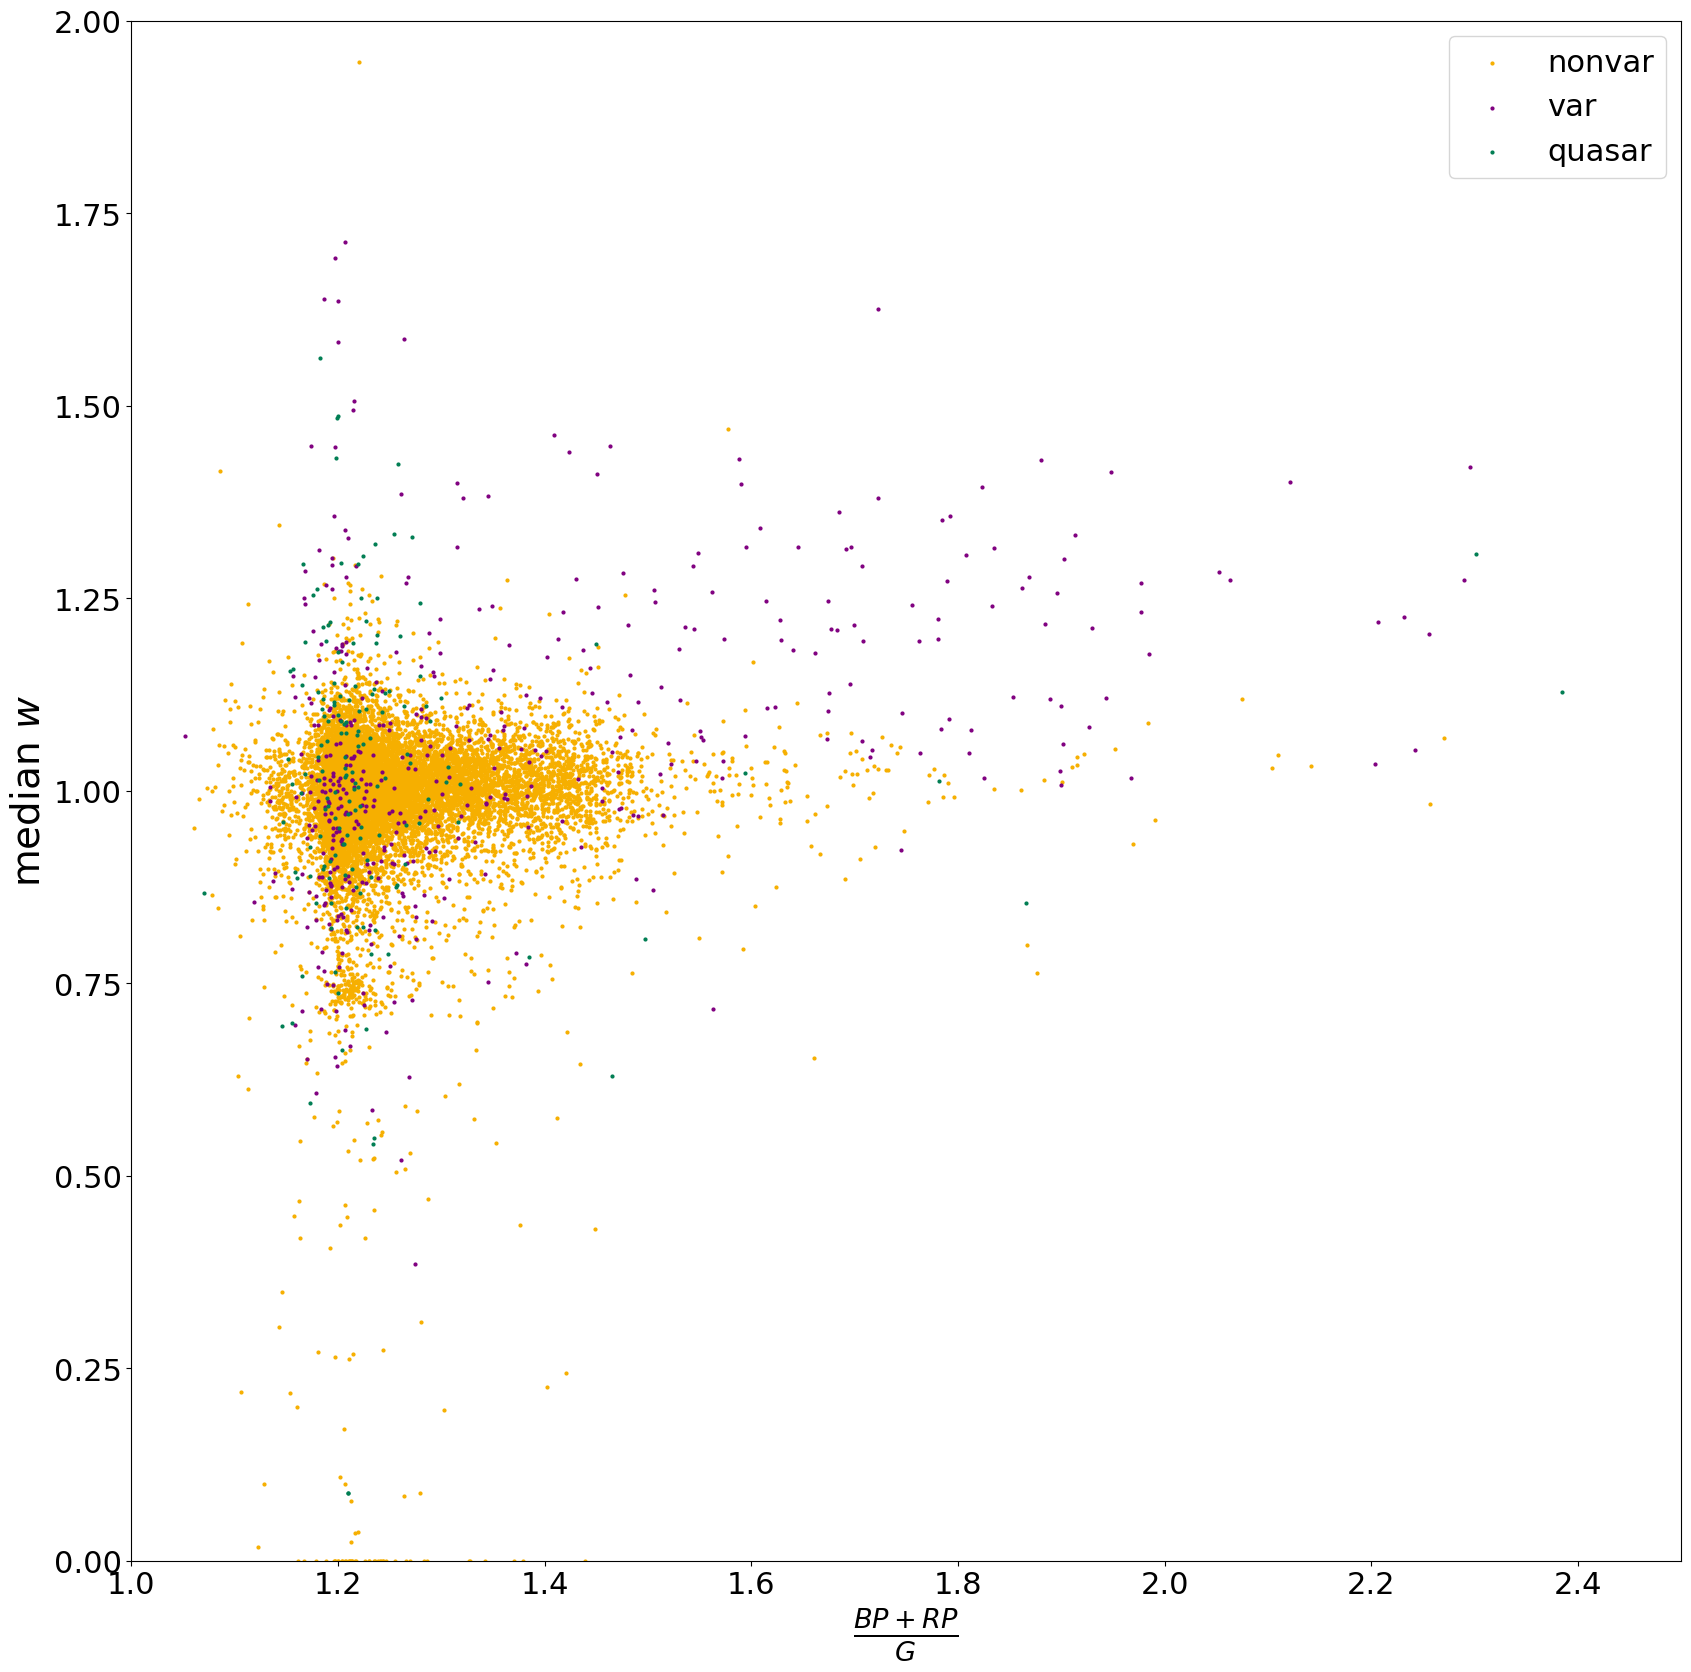

In [47]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)
plt.xlim(1, 2.5)

plt.xlabel('$\\frac{BP+RP}{G}$')
plt.ylabel('median $w$')

n_ex = pd.merge(nonvar_subset, excess_df, on='source_id')
v_ex = pd.merge(var_subset,    excess_df, on='source_id')
q_ex = pd.merge(quasar_subset, excess_df, on='source_id')

plt.scatter(n_ex['phot_bp_rp_excess_factor'], n_ex[W_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(v_ex['phot_bp_rp_excess_factor'], v_ex[W_MEDIAN_COLNAME], c=CV,  s=S, label='var',    alpha=AV)
plt.scatter(q_ex['phot_bp_rp_excess_factor'], q_ex[W_MEDIAN_COLNAME], c=CQ,  s=S, label='quasar', alpha=AQ)

plt.legend()
plt.show()

/home/noa/projects/gaia_sdss/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


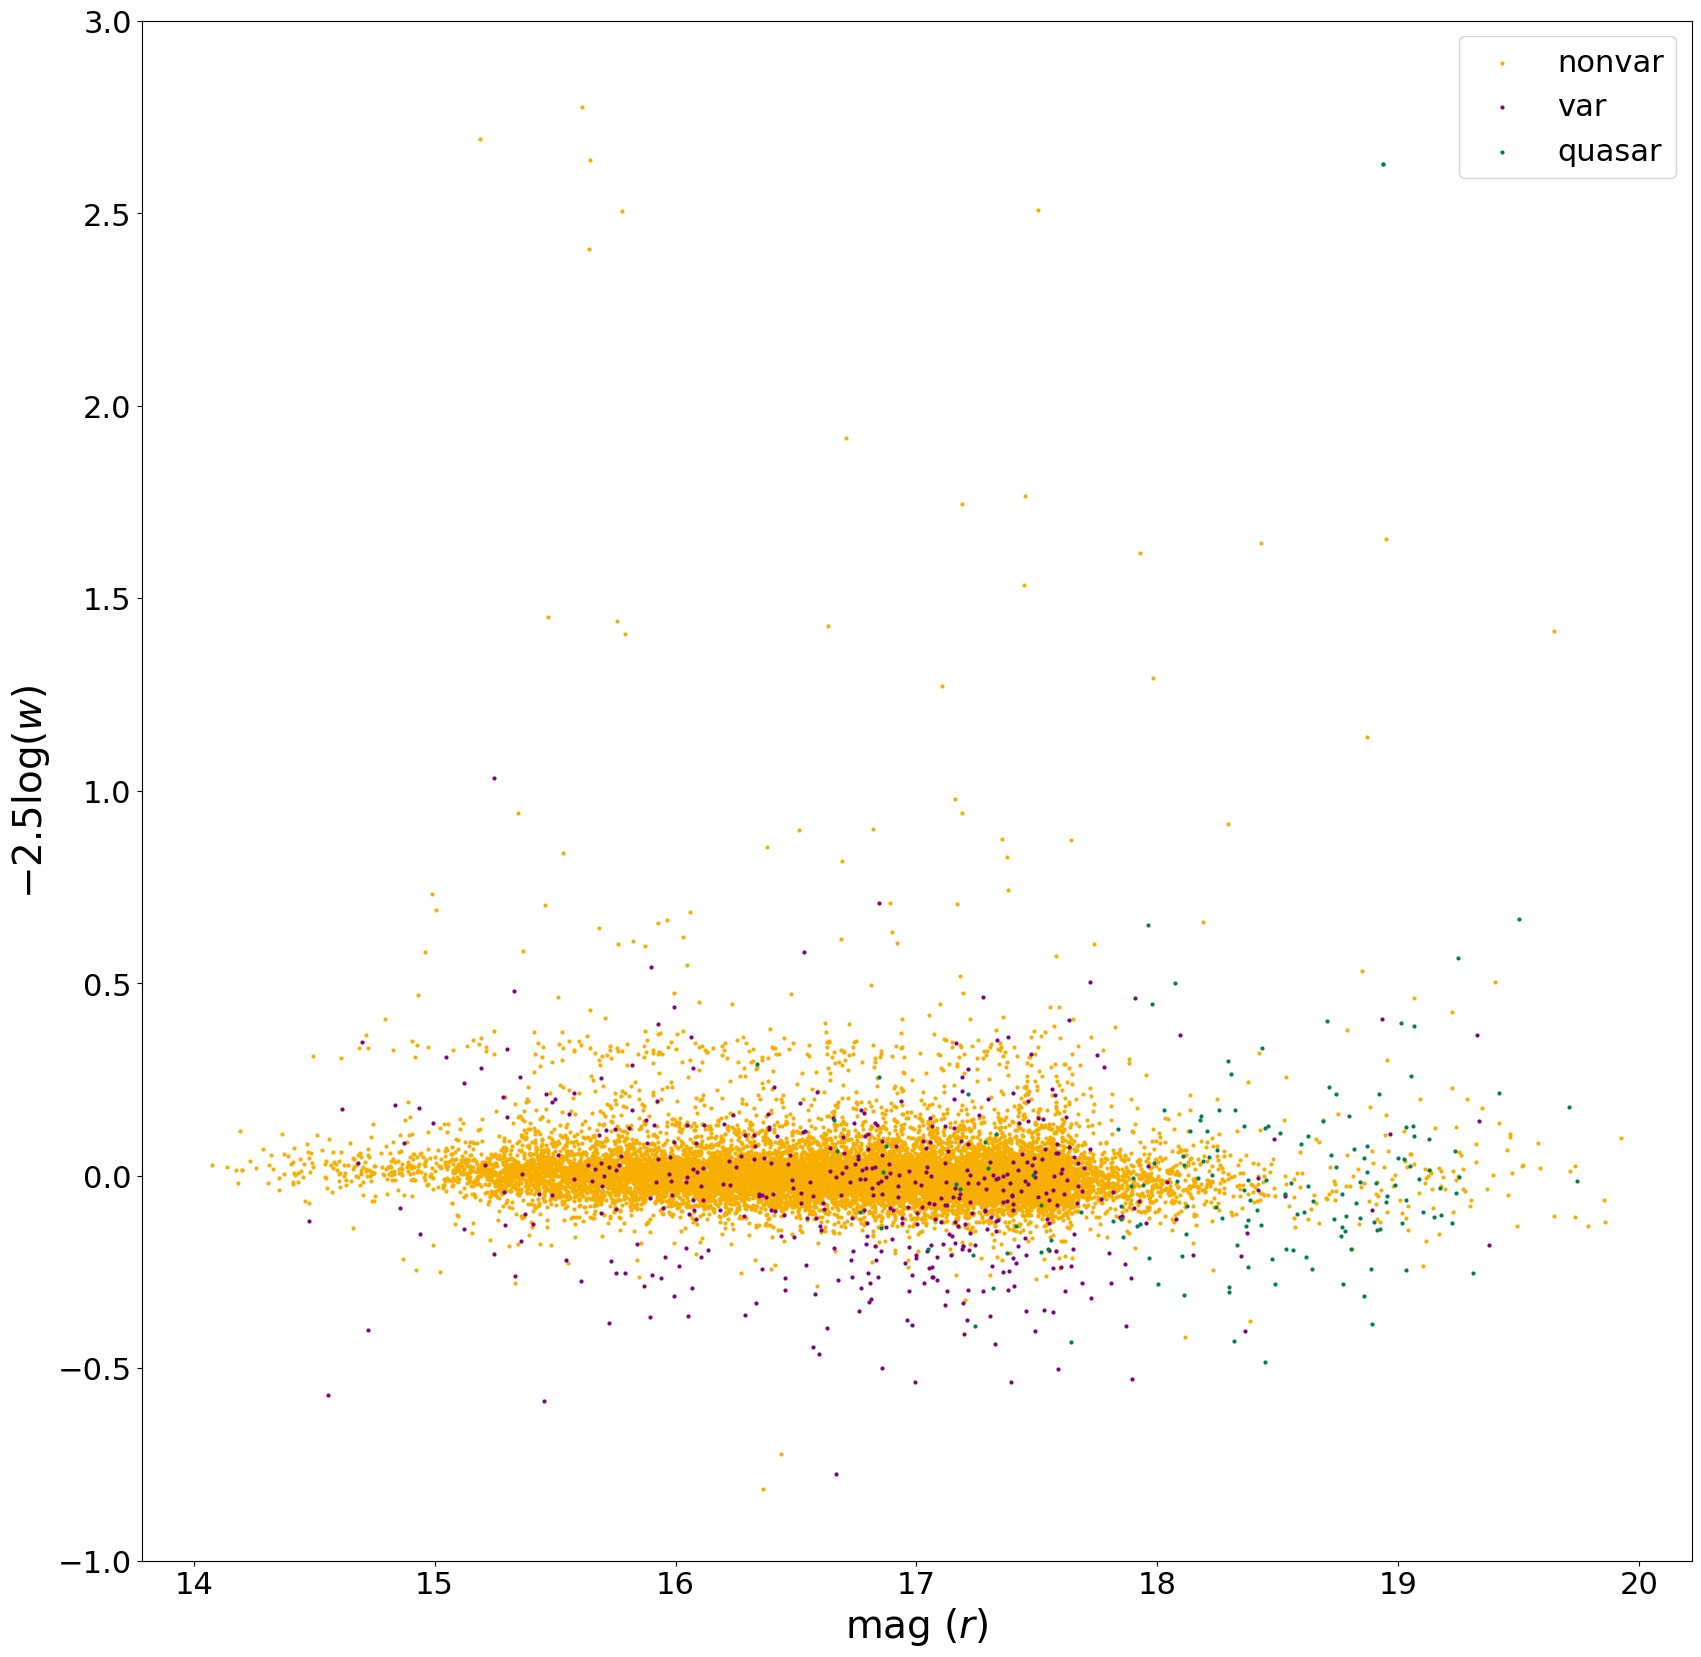

In [48]:
plt.figure(figsize=(20, 20))

plt.ylim(-1, 3)

plt.xlabel('mag ($r$)')
plt.ylabel('$-2.5 \\log(w)$')

m = lambda x: -2.5 * np.log10(x)

plt.scatter(nonvar_subset[R_MAG_COLNAME], m(nonvar_subset[W_MEDIAN_COLNAME]), c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    m(var_subset[W_MEDIAN_COLNAME]),    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], m(quasar_subset[W_MEDIAN_COLNAME]), c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

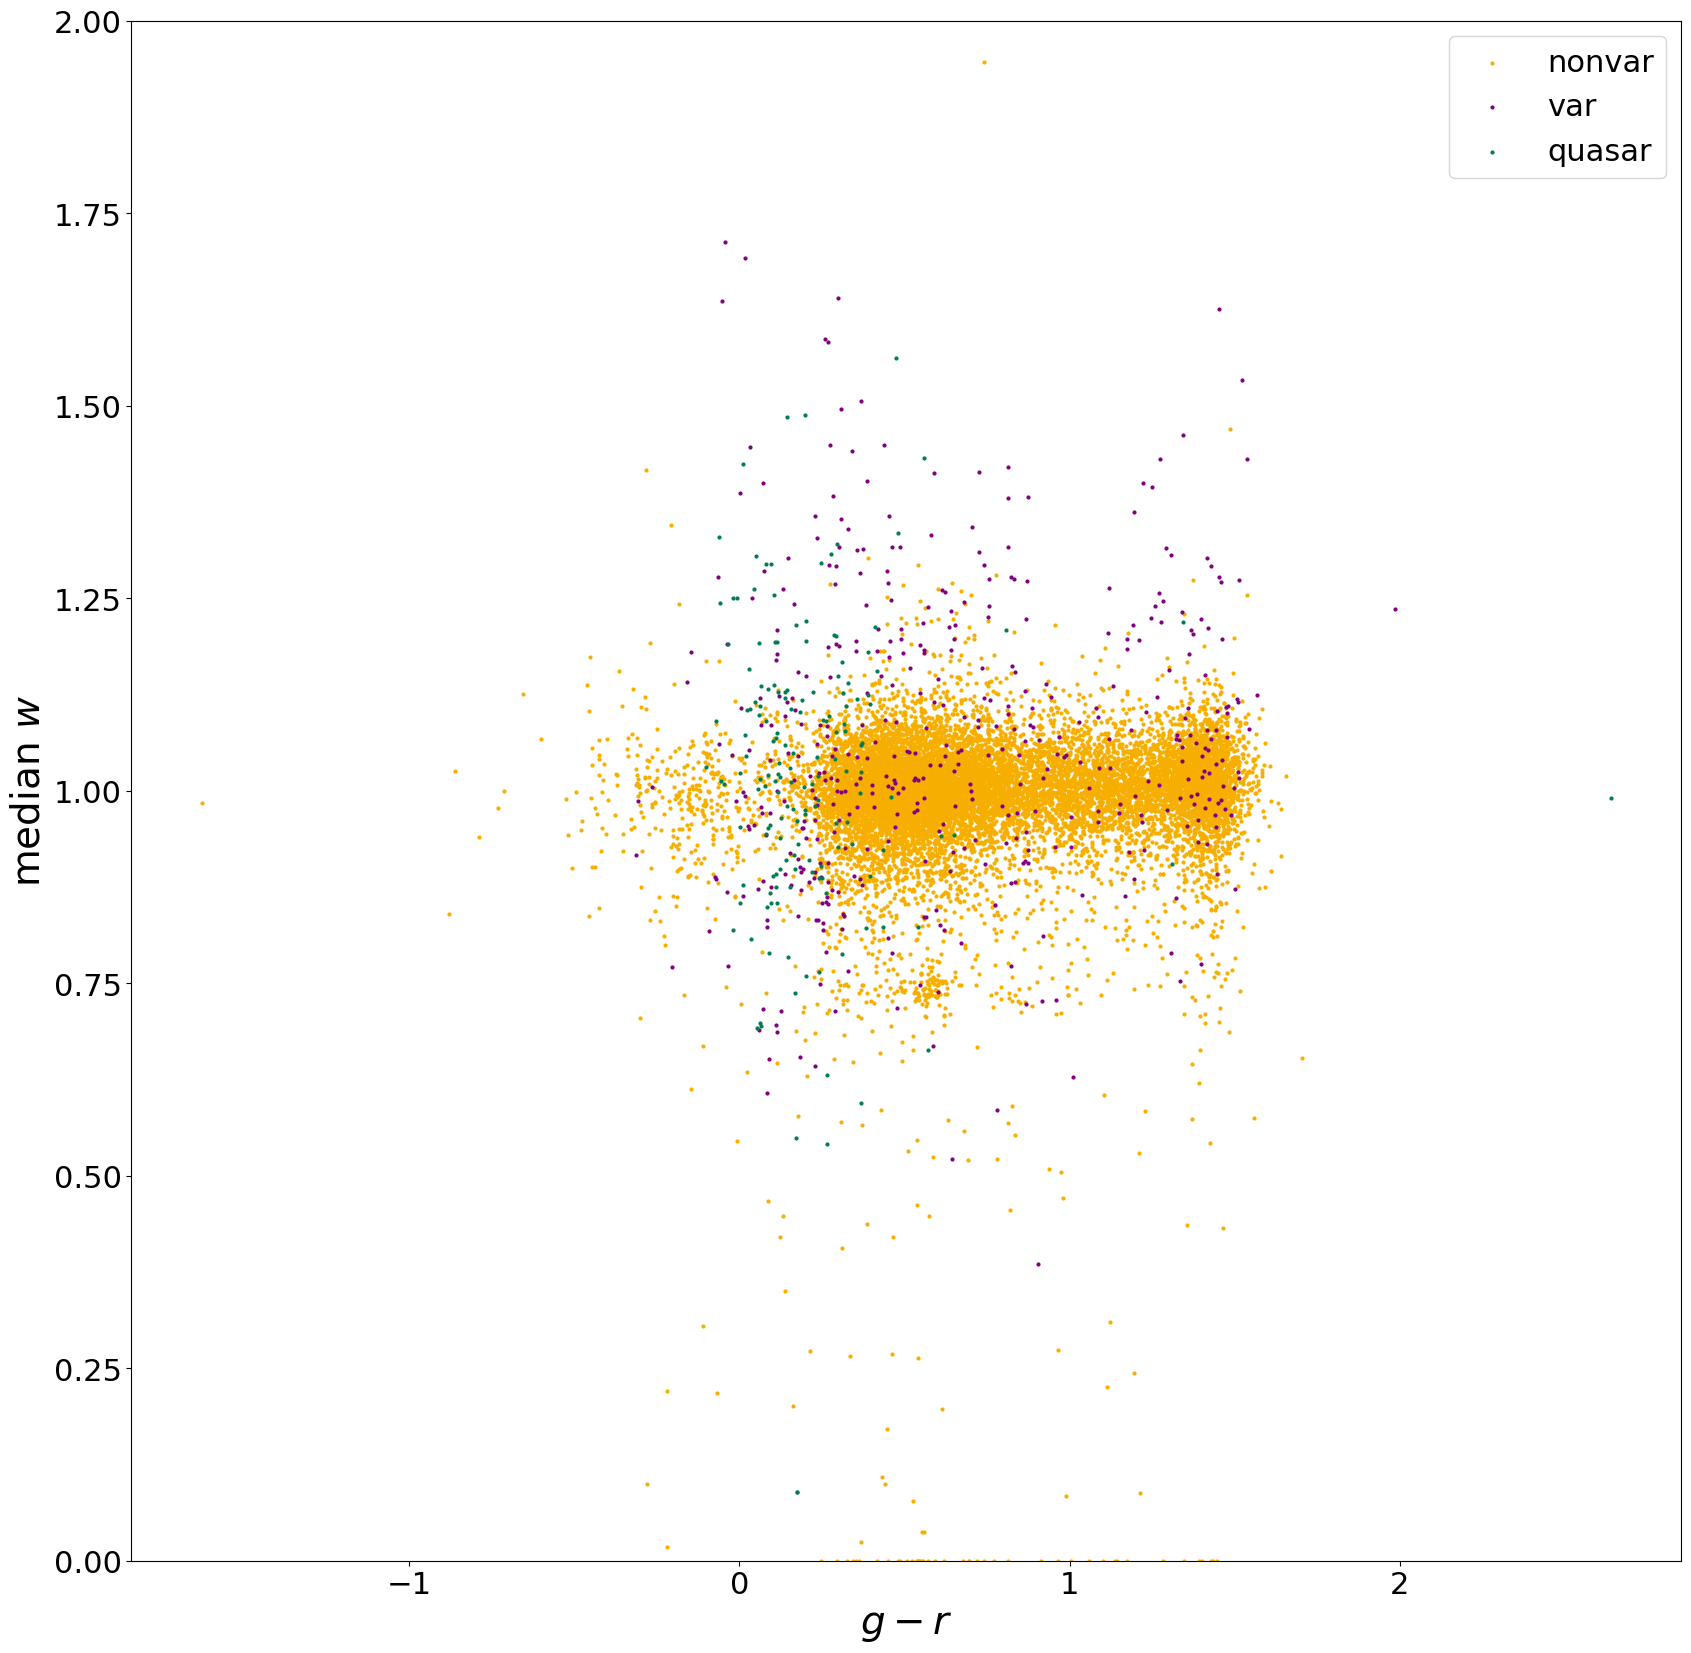

In [56]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)

plt.xlabel('$g-r$')
plt.ylabel('median $w$')

gMr = lambda x: x[G_MAG_COLNAME] - x[R_MAG_COLNAME]

plt.scatter(gMr(nonvar_subset), nonvar_subset[W_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    var_subset[W_MEDIAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), quasar_subset[W_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

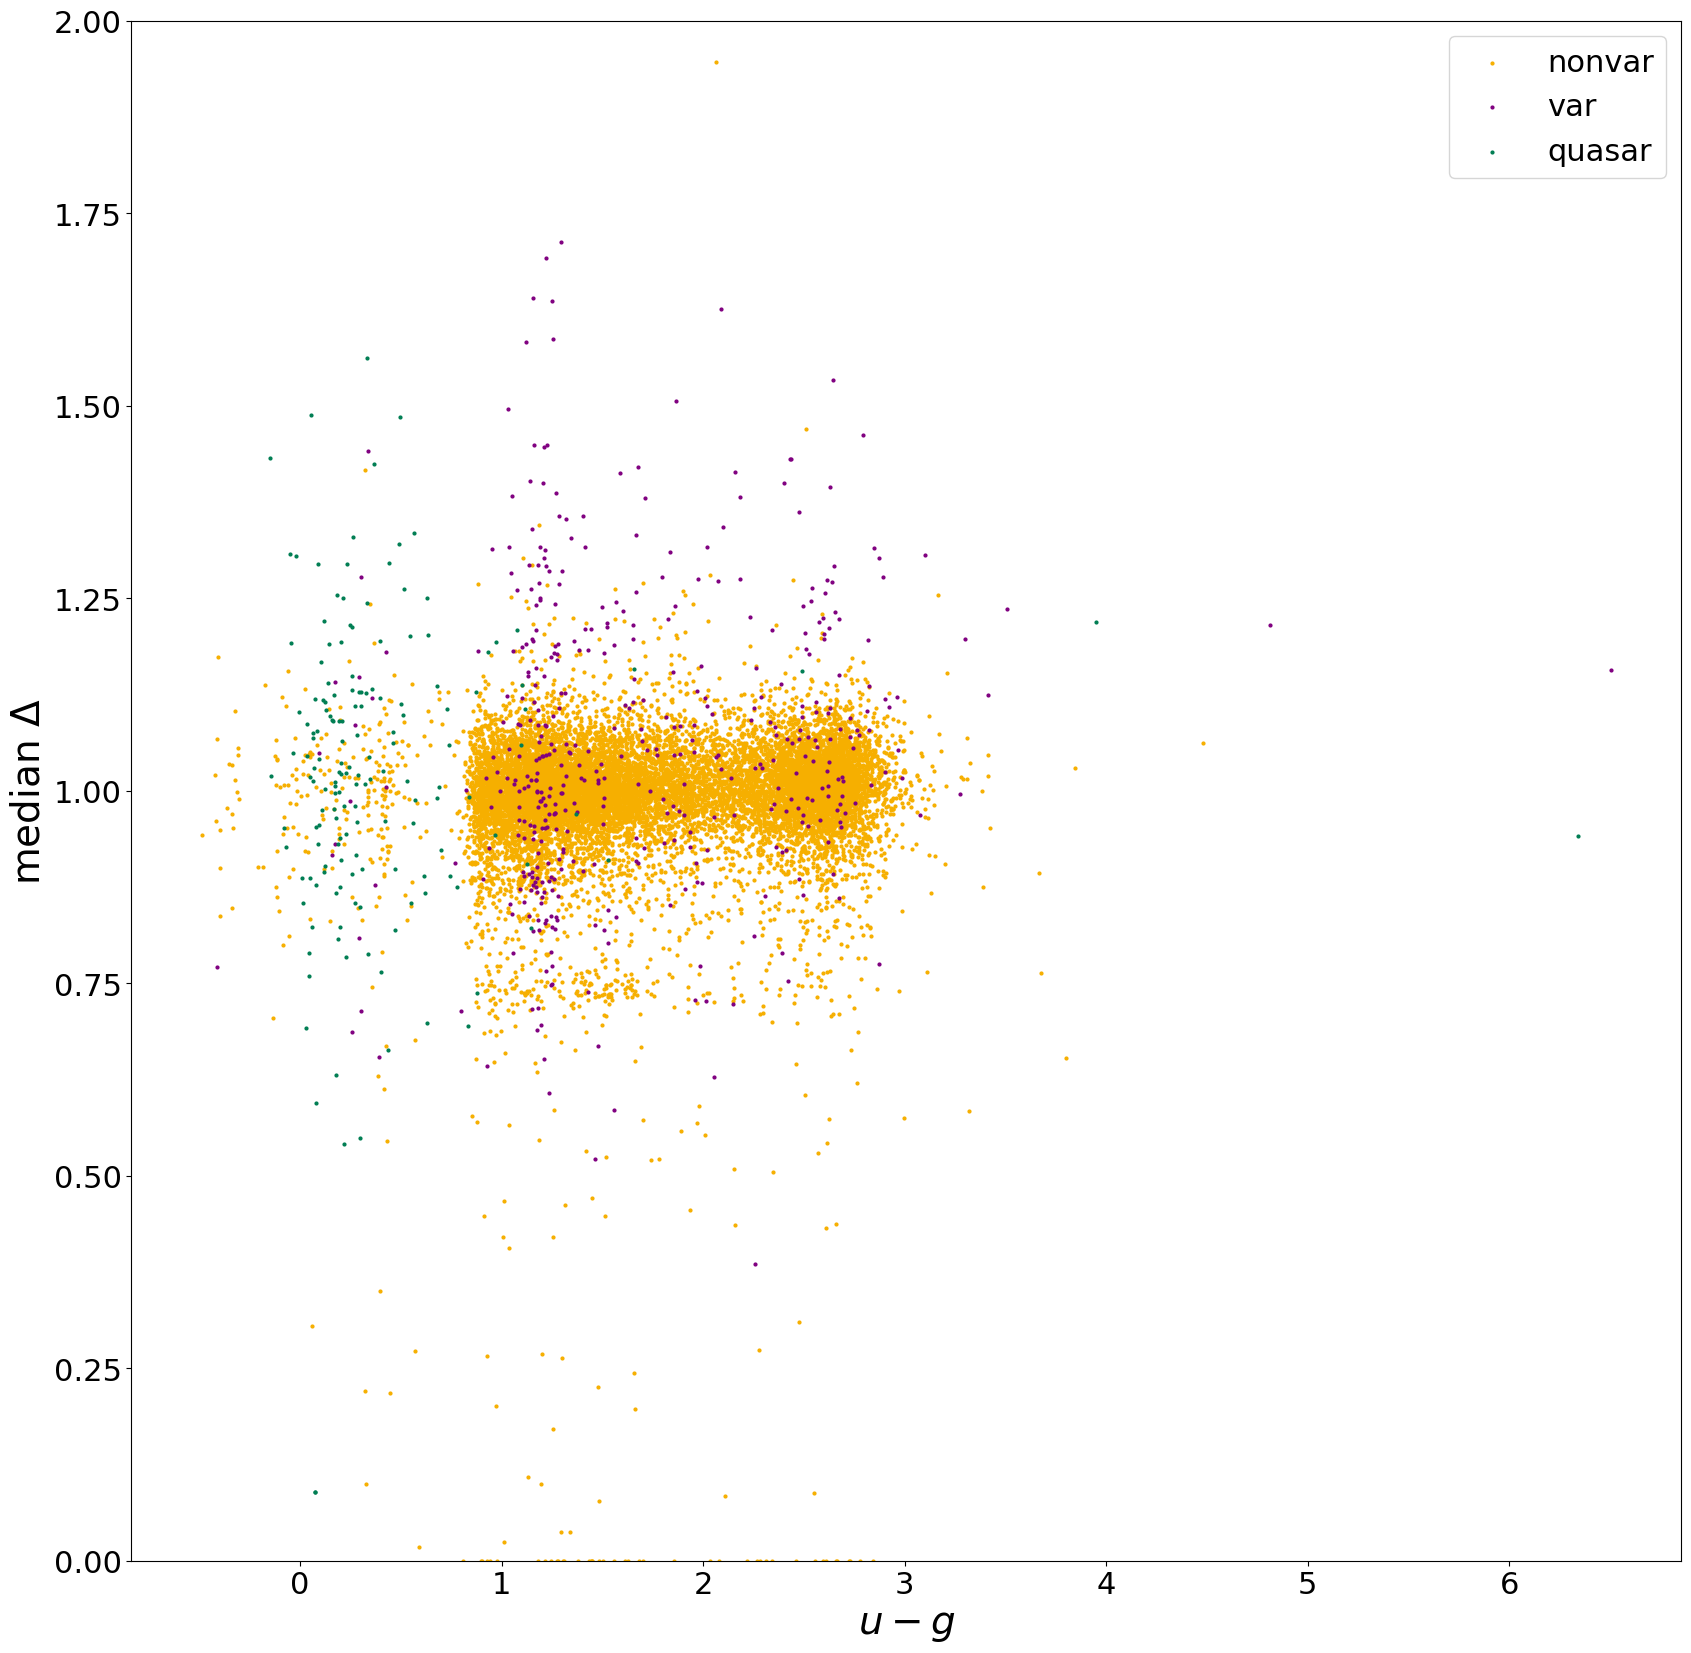

In [57]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)

plt.xlabel('$u-g$')
plt.ylabel('median $\\Delta$')

uMg = lambda x: x[U_MAG_COLNAME] - x[G_MAG_COLNAME]

plt.scatter(uMg(nonvar_subset), nonvar_subset[W_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(uMg(var_subset),    var_subset[W_MEDIAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(uMg(quasar_subset), quasar_subset[W_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

# \Delta

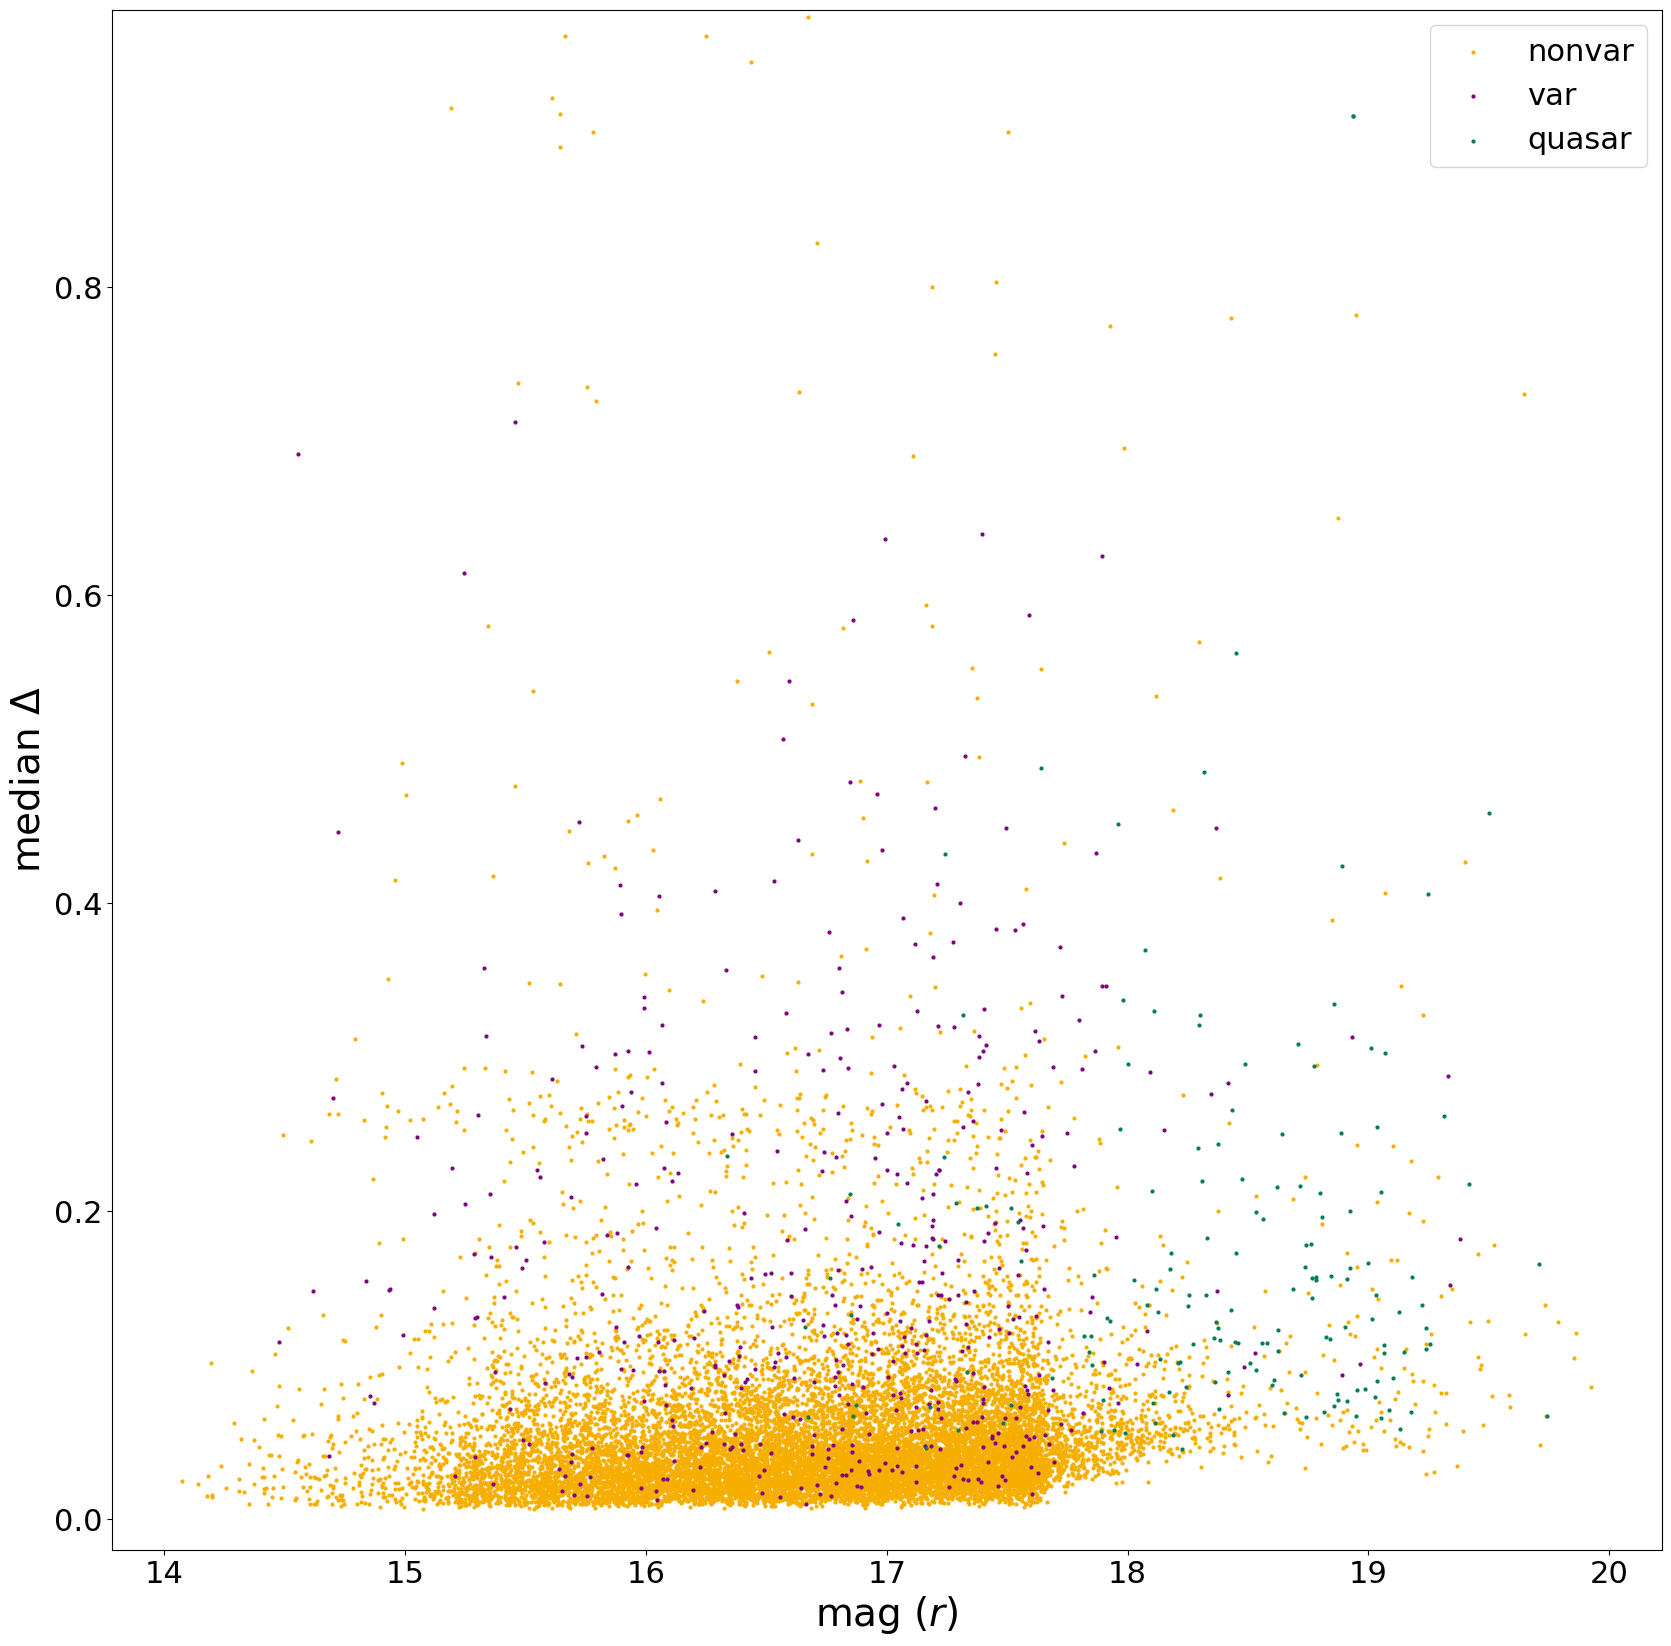

In [49]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 0.98)

plt.xlabel('mag ($r$)')
plt.ylabel('median $\\Delta$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[D_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[D_MEDIAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[D_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

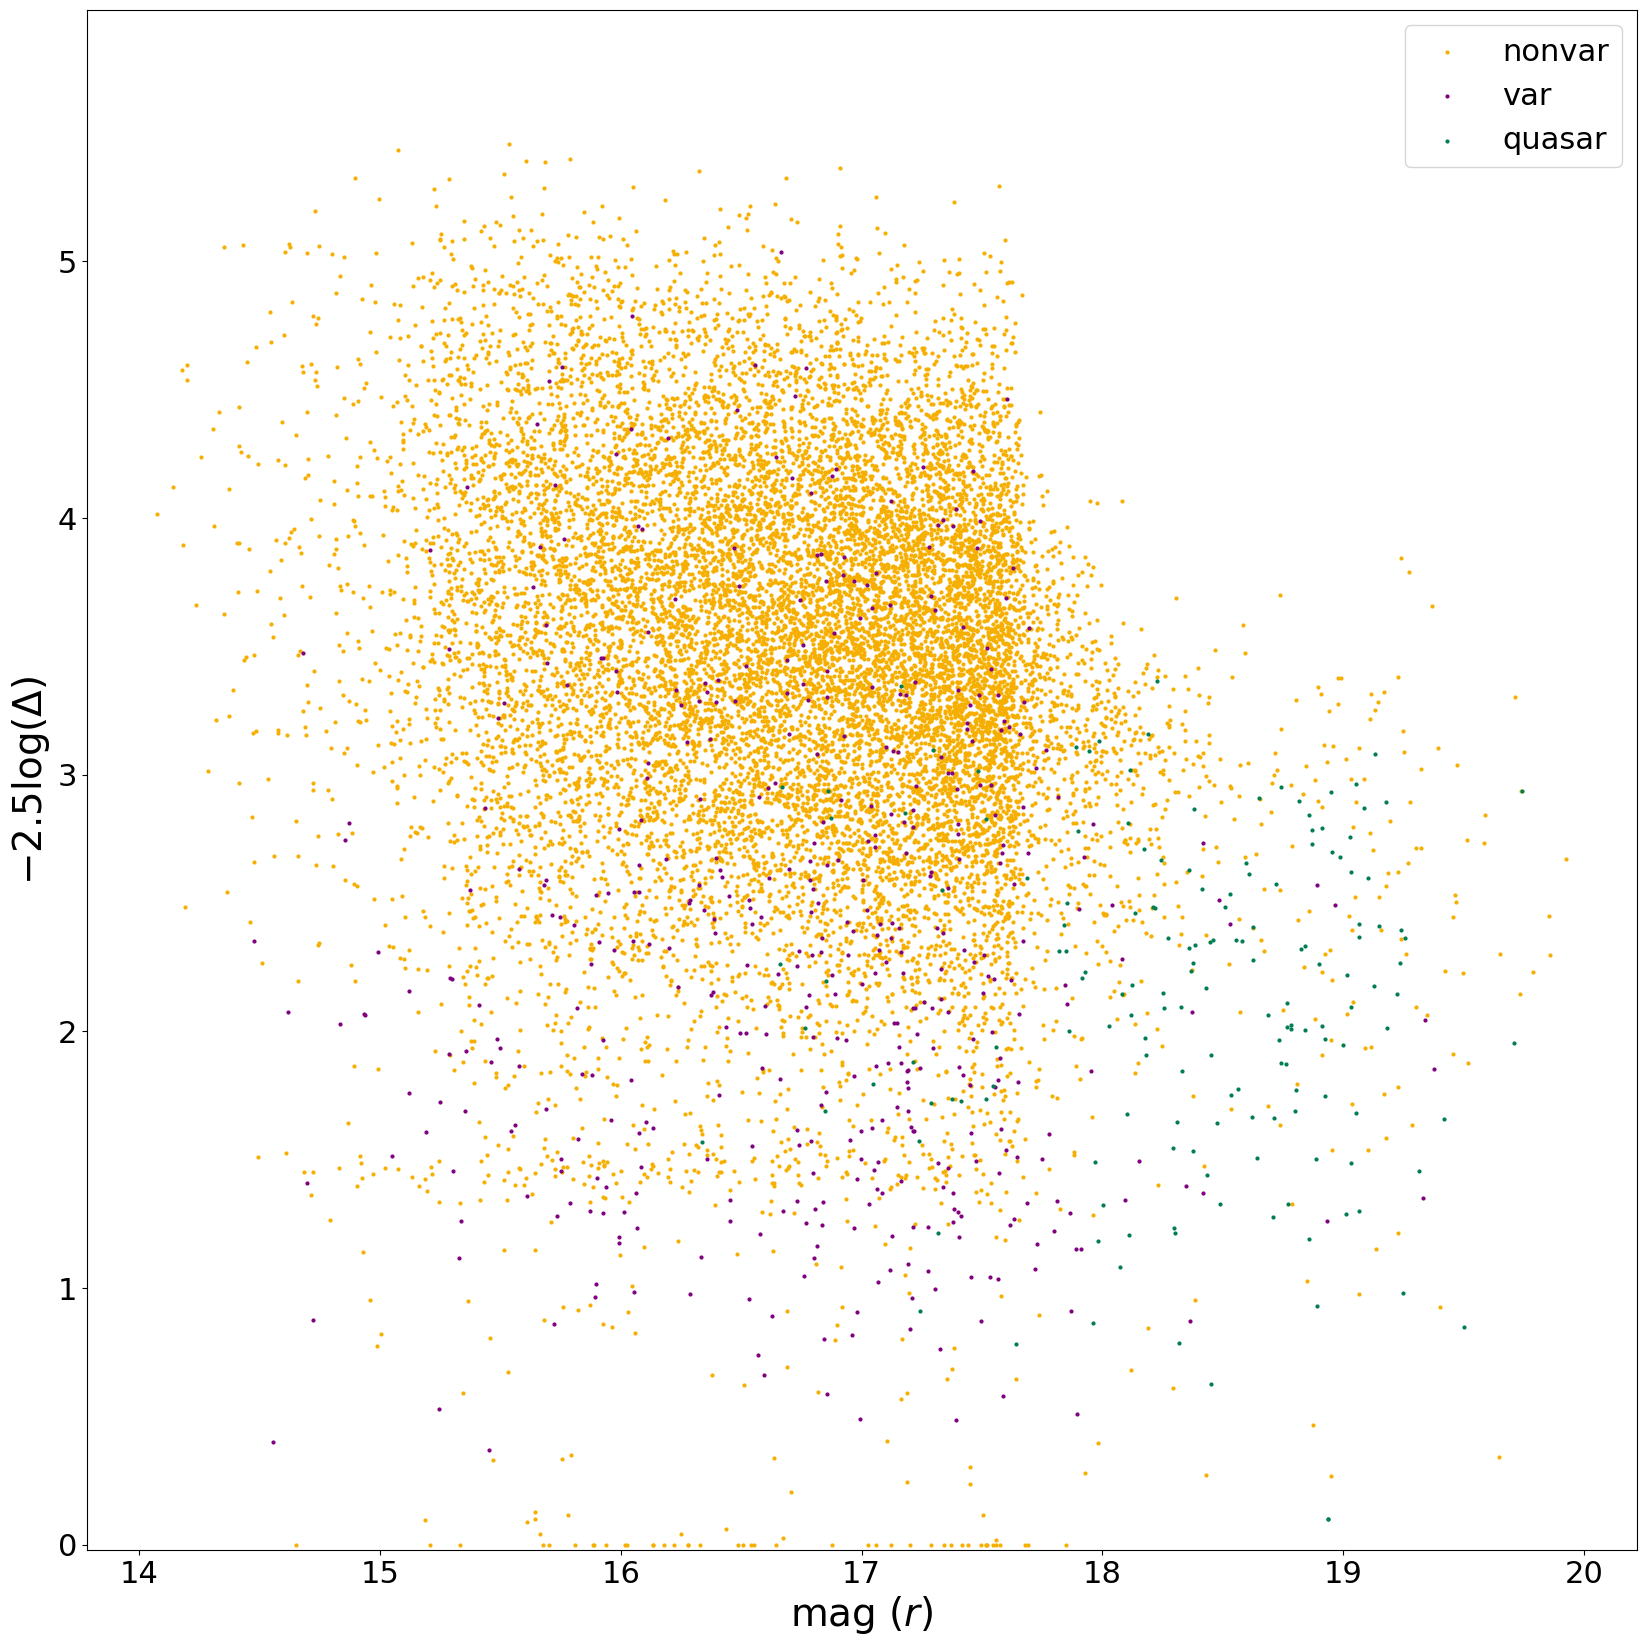

In [50]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 5.98)

plt.xlabel('mag ($r$)')
plt.ylabel('$-2.5 \\log(\\Delta$)')

plt.scatter(nonvar_subset[R_MAG_COLNAME], m(nonvar_subset[D_MEDIAN_COLNAME]), c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    m(var_subset[D_MEDIAN_COLNAME]),    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], m(quasar_subset[D_MEDIAN_COLNAME]), c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

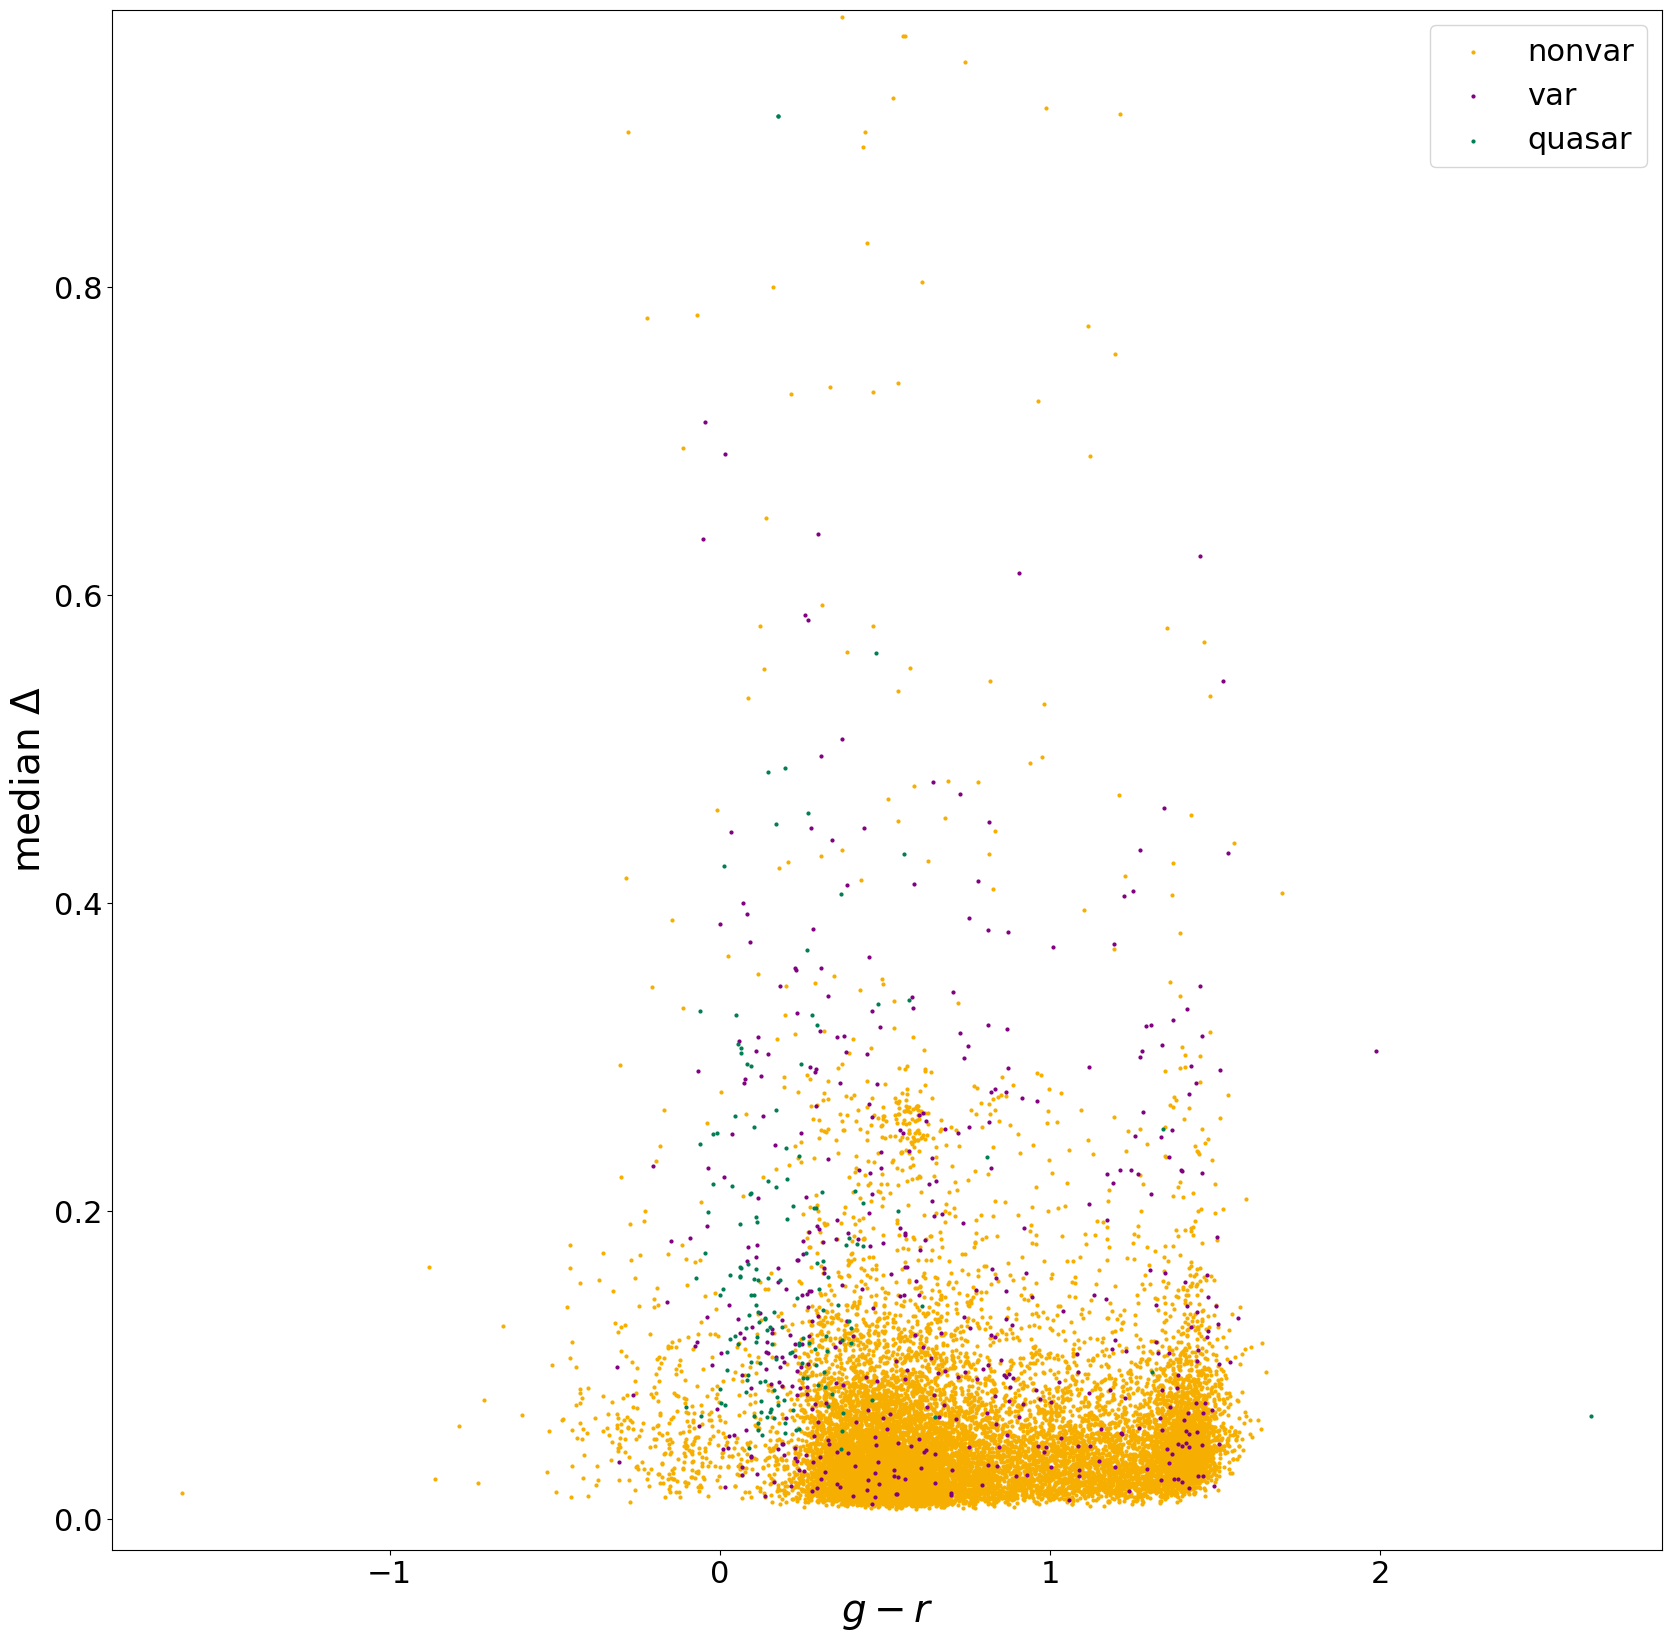

In [51]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 0.98)

plt.xlabel('$g-r$')
plt.ylabel('median $\\Delta$')

gMr = lambda x: x[G_MAG_COLNAME] - x[R_MAG_COLNAME]

plt.scatter(gMr(nonvar_subset), nonvar_subset[D_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    var_subset[D_MEDIAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), quasar_subset[D_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

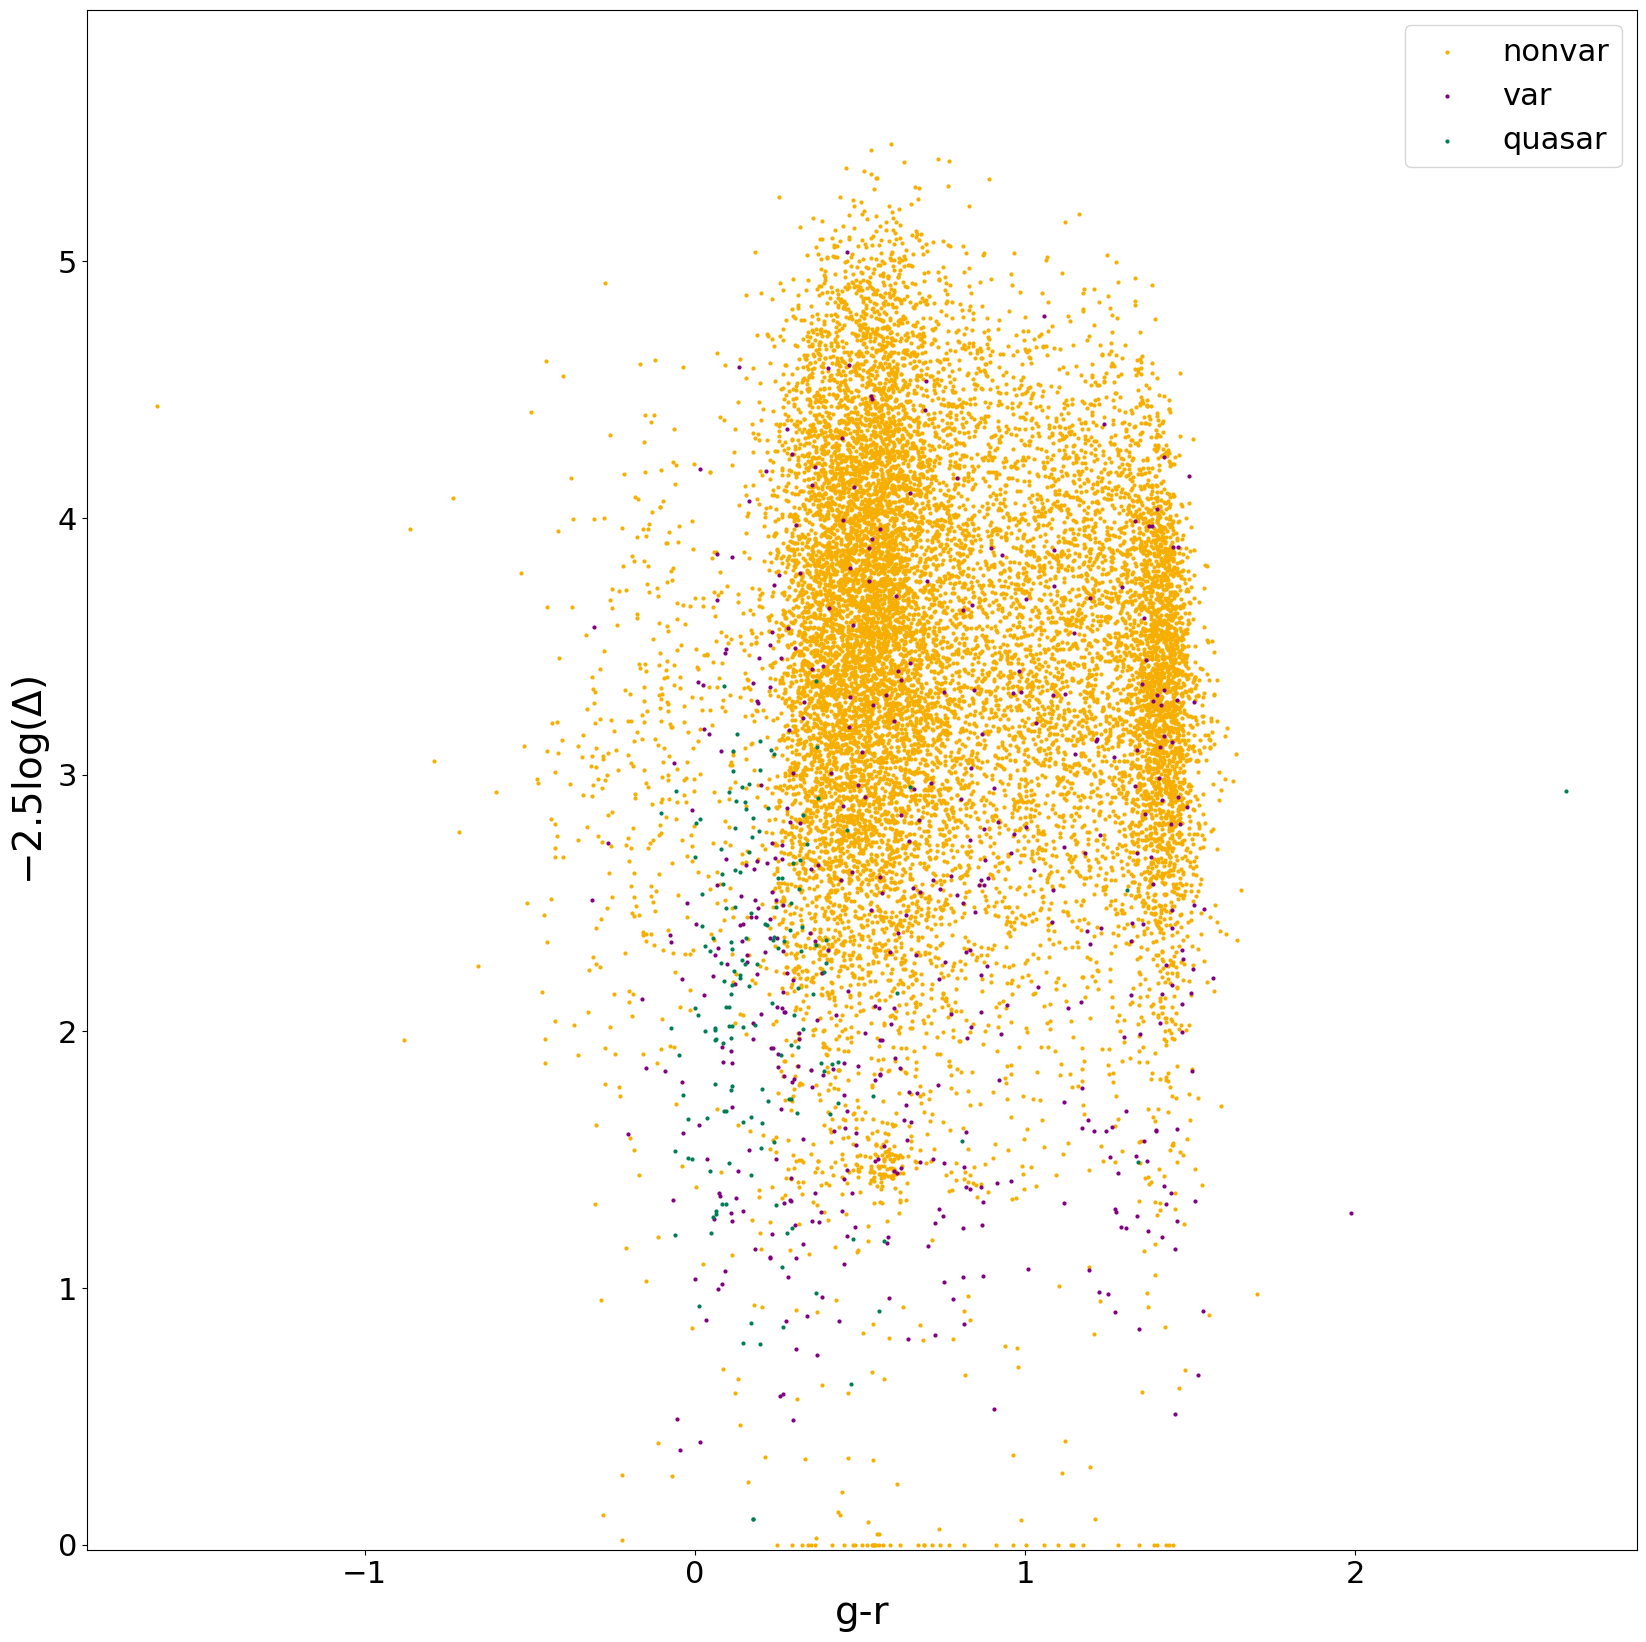

In [52]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 5.98)

plt.xlabel('g-r')
plt.ylabel('$-2.5 \\log(\\Delta$)')

plt.scatter(gMr(nonvar_subset), m(nonvar_subset[D_MEDIAN_COLNAME]), c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    m(var_subset[D_MEDIAN_COLNAME]),    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), m(quasar_subset[D_MEDIAN_COLNAME]), c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

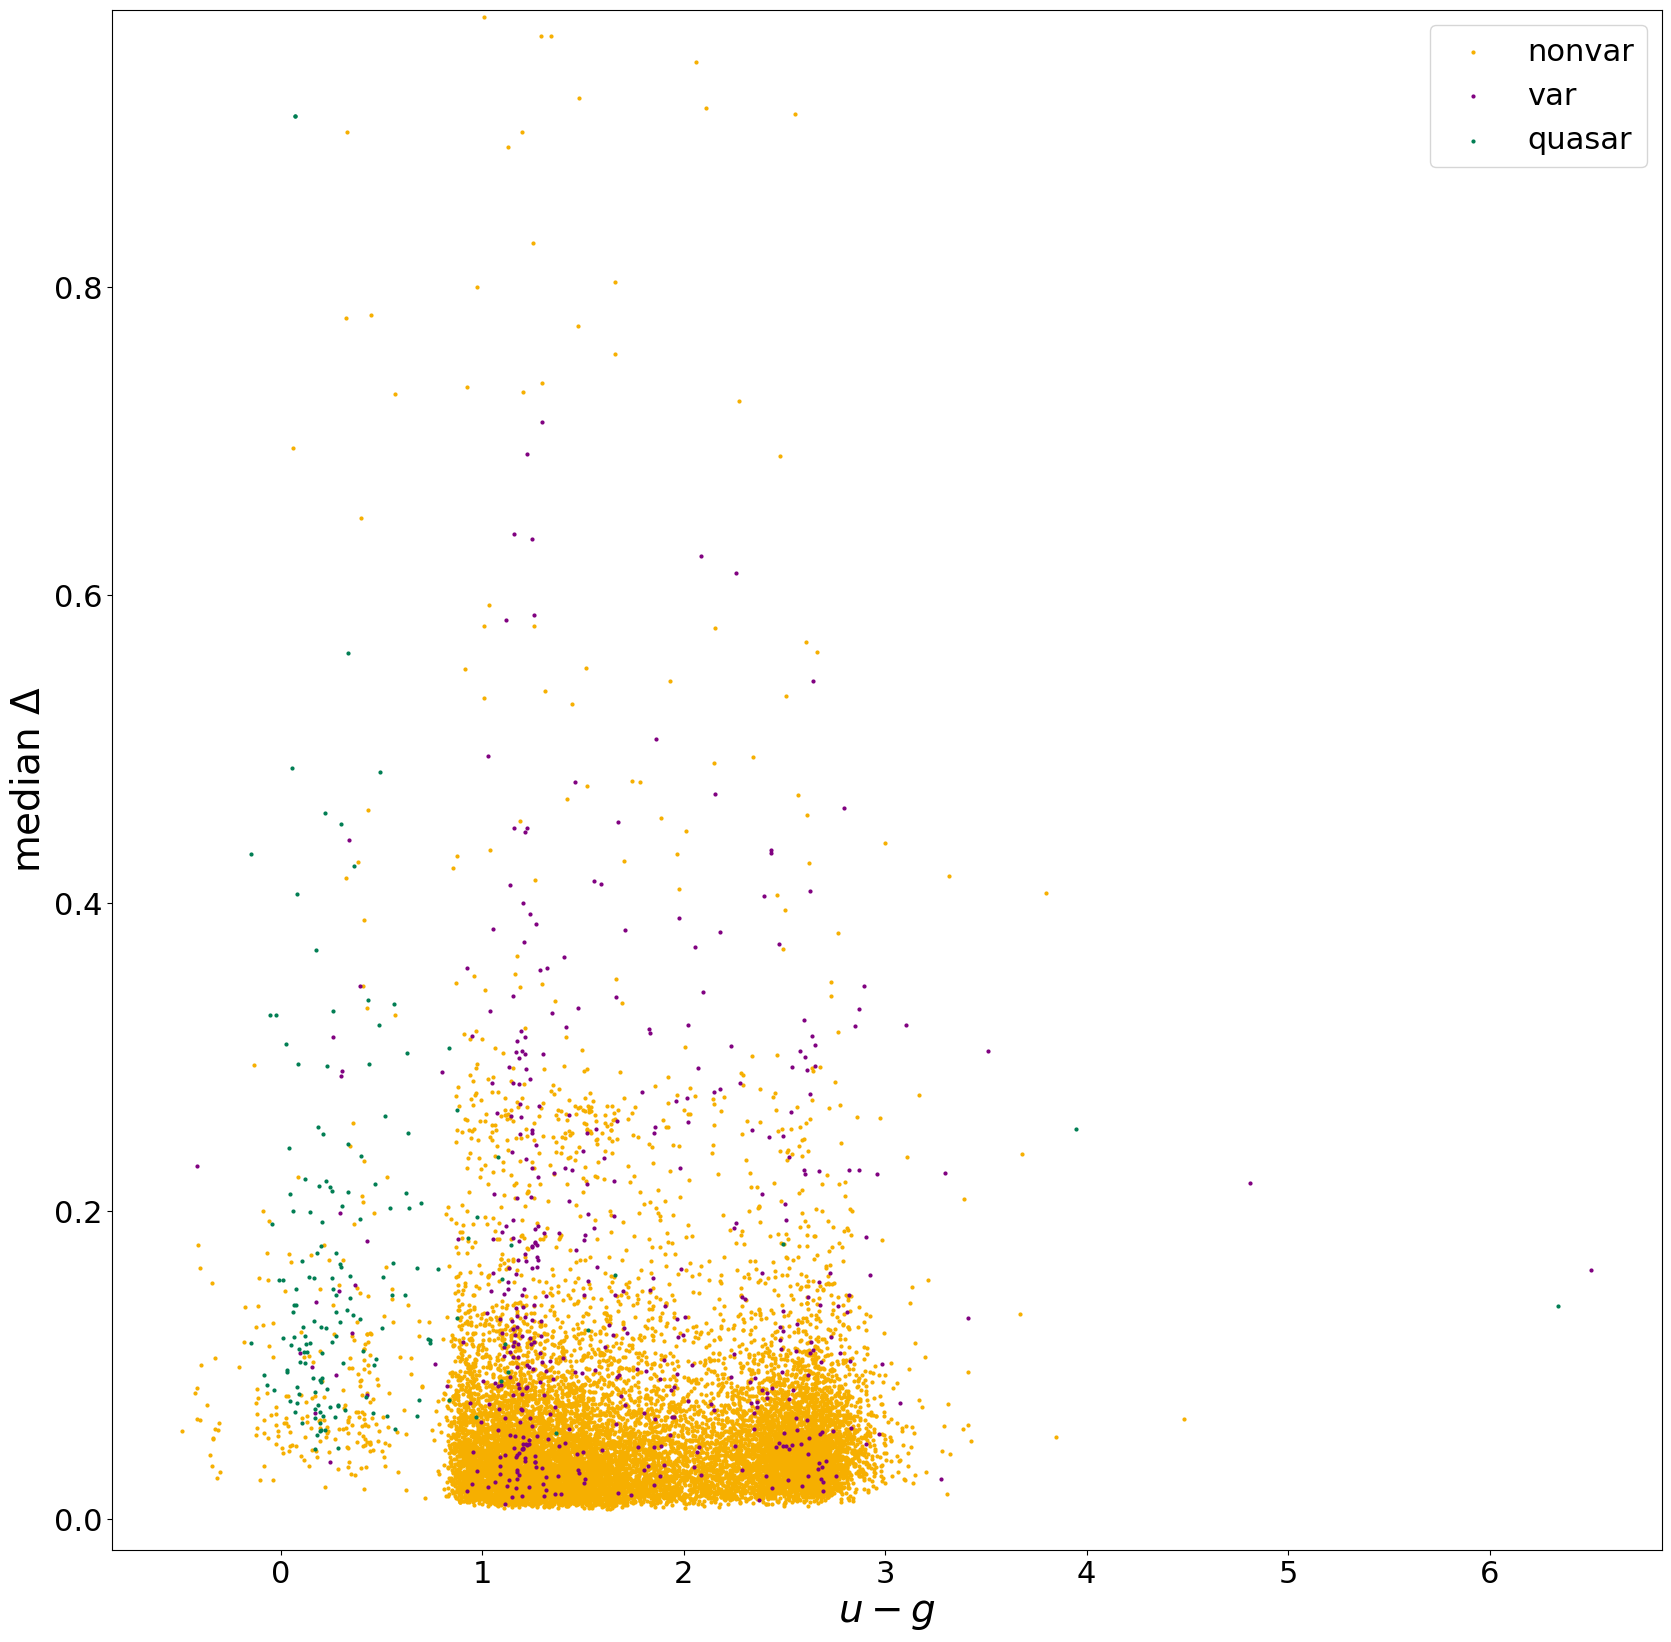

In [53]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 0.98)

plt.xlabel('$u-g$')
plt.ylabel('median $\\Delta$')

uMg = lambda x: x[U_MAG_COLNAME] - x[G_MAG_COLNAME]

plt.scatter(uMg(nonvar_subset), nonvar_subset[D_MEDIAN_COLNAME], c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(uMg(var_subset),    var_subset[D_MEDIAN_COLNAME],    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(uMg(quasar_subset), quasar_subset[D_MEDIAN_COLNAME], c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

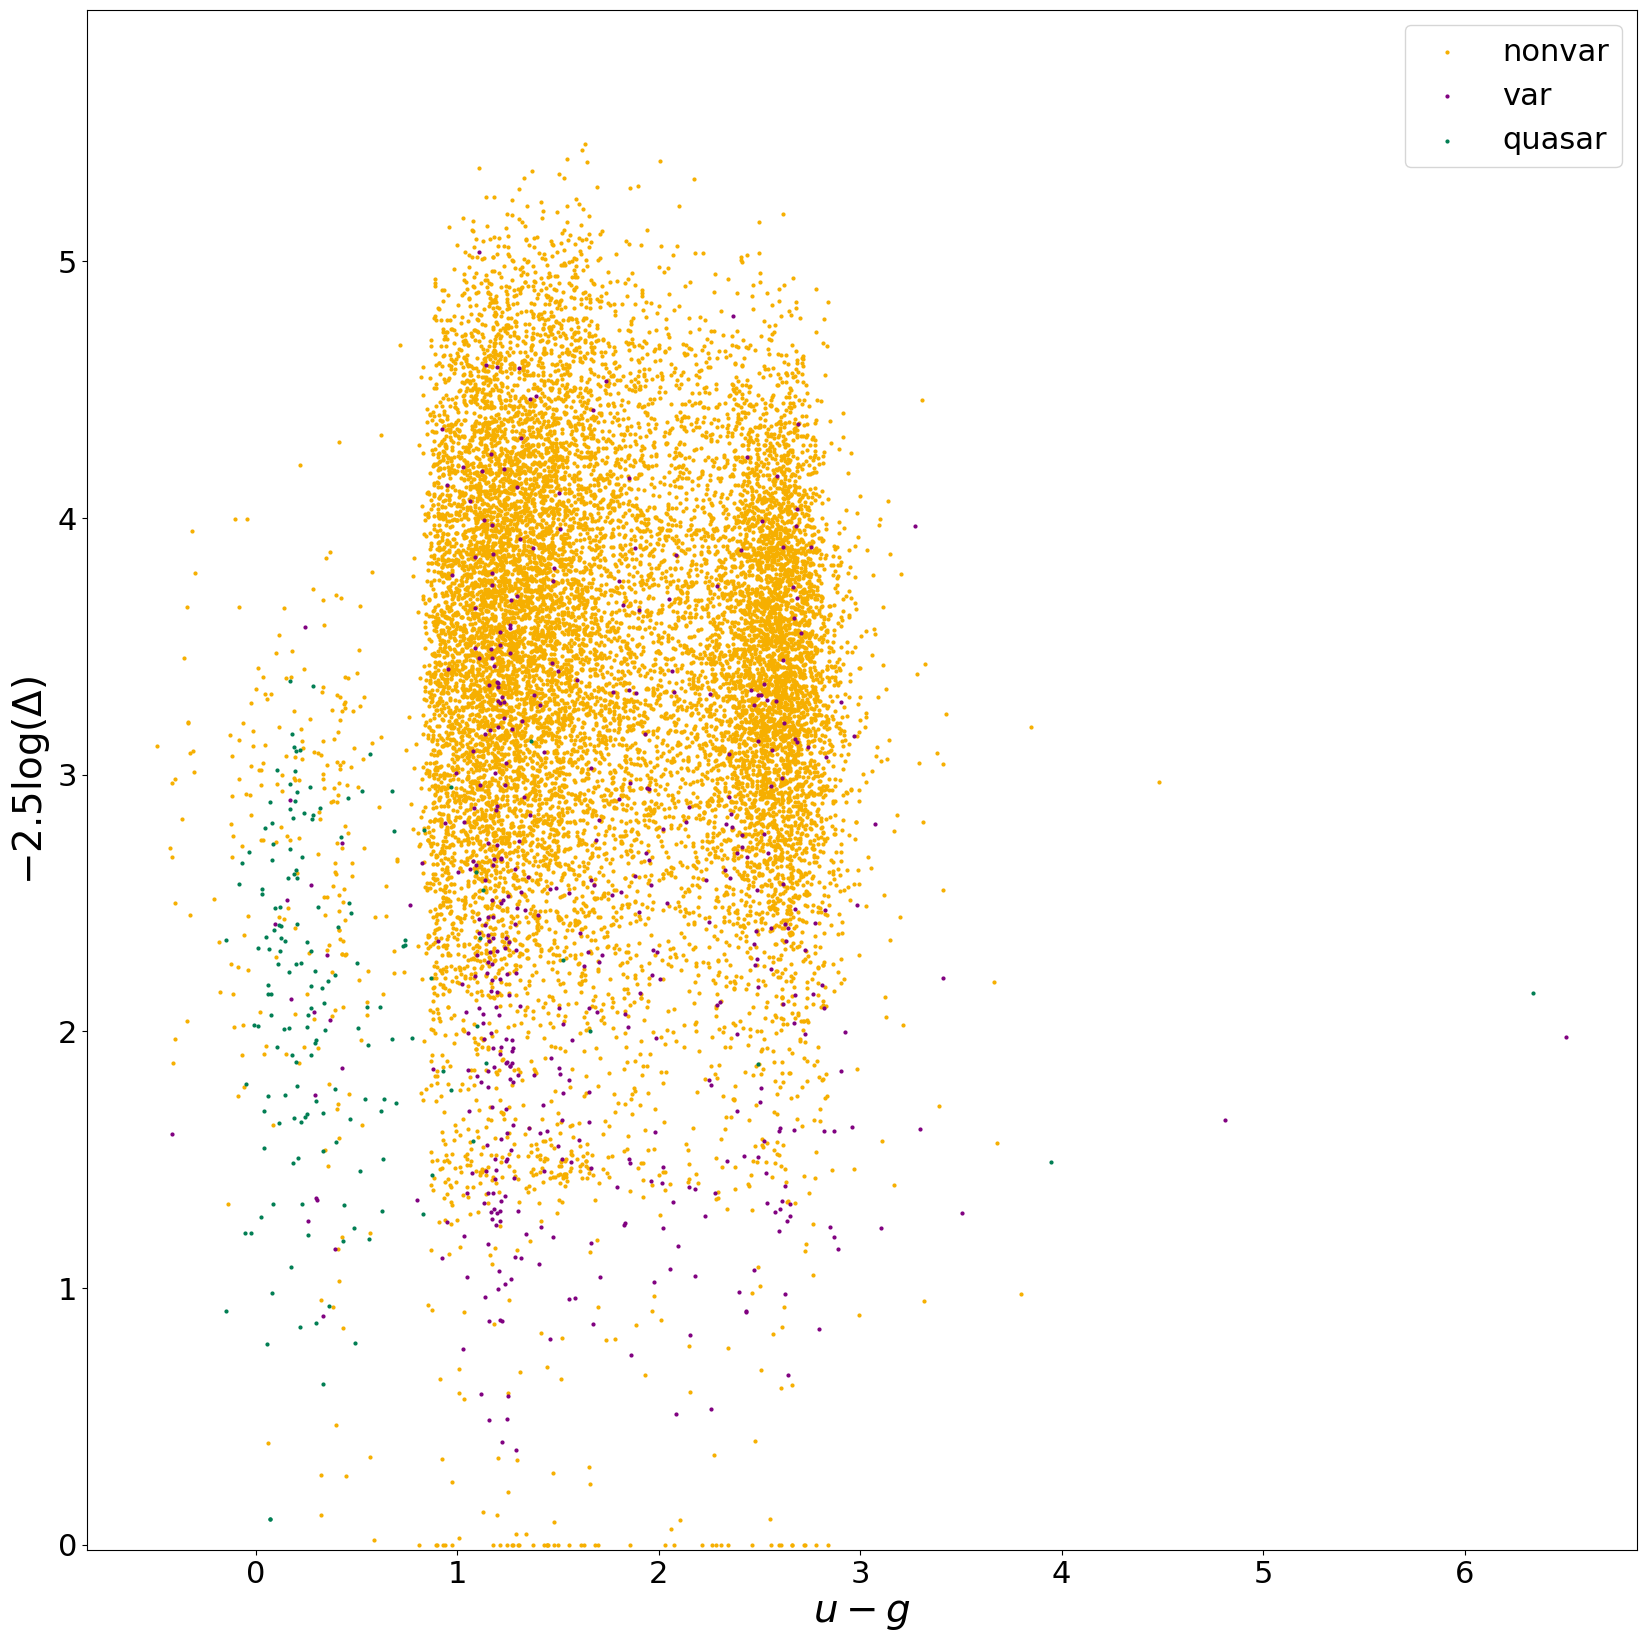

In [54]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 5.98)

plt.xlabel('$u-g$')
plt.ylabel('$-2.5 \\log(\\Delta$)')

plt.scatter(uMg(nonvar_subset), m(nonvar_subset[D_MEDIAN_COLNAME]), c=CN,  s=S, label='nonvar', alpha=AN)
plt.scatter(uMg(var_subset),    m(var_subset[D_MEDIAN_COLNAME]),    c=CV,    s=S, label='var',    alpha=AV)
plt.scatter(uMg(quasar_subset), m(quasar_subset[D_MEDIAN_COLNAME]), c=CQ,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

## color-color

In [58]:
TITLES = [['all', 'nonvar'], ['var', 'quasar']]

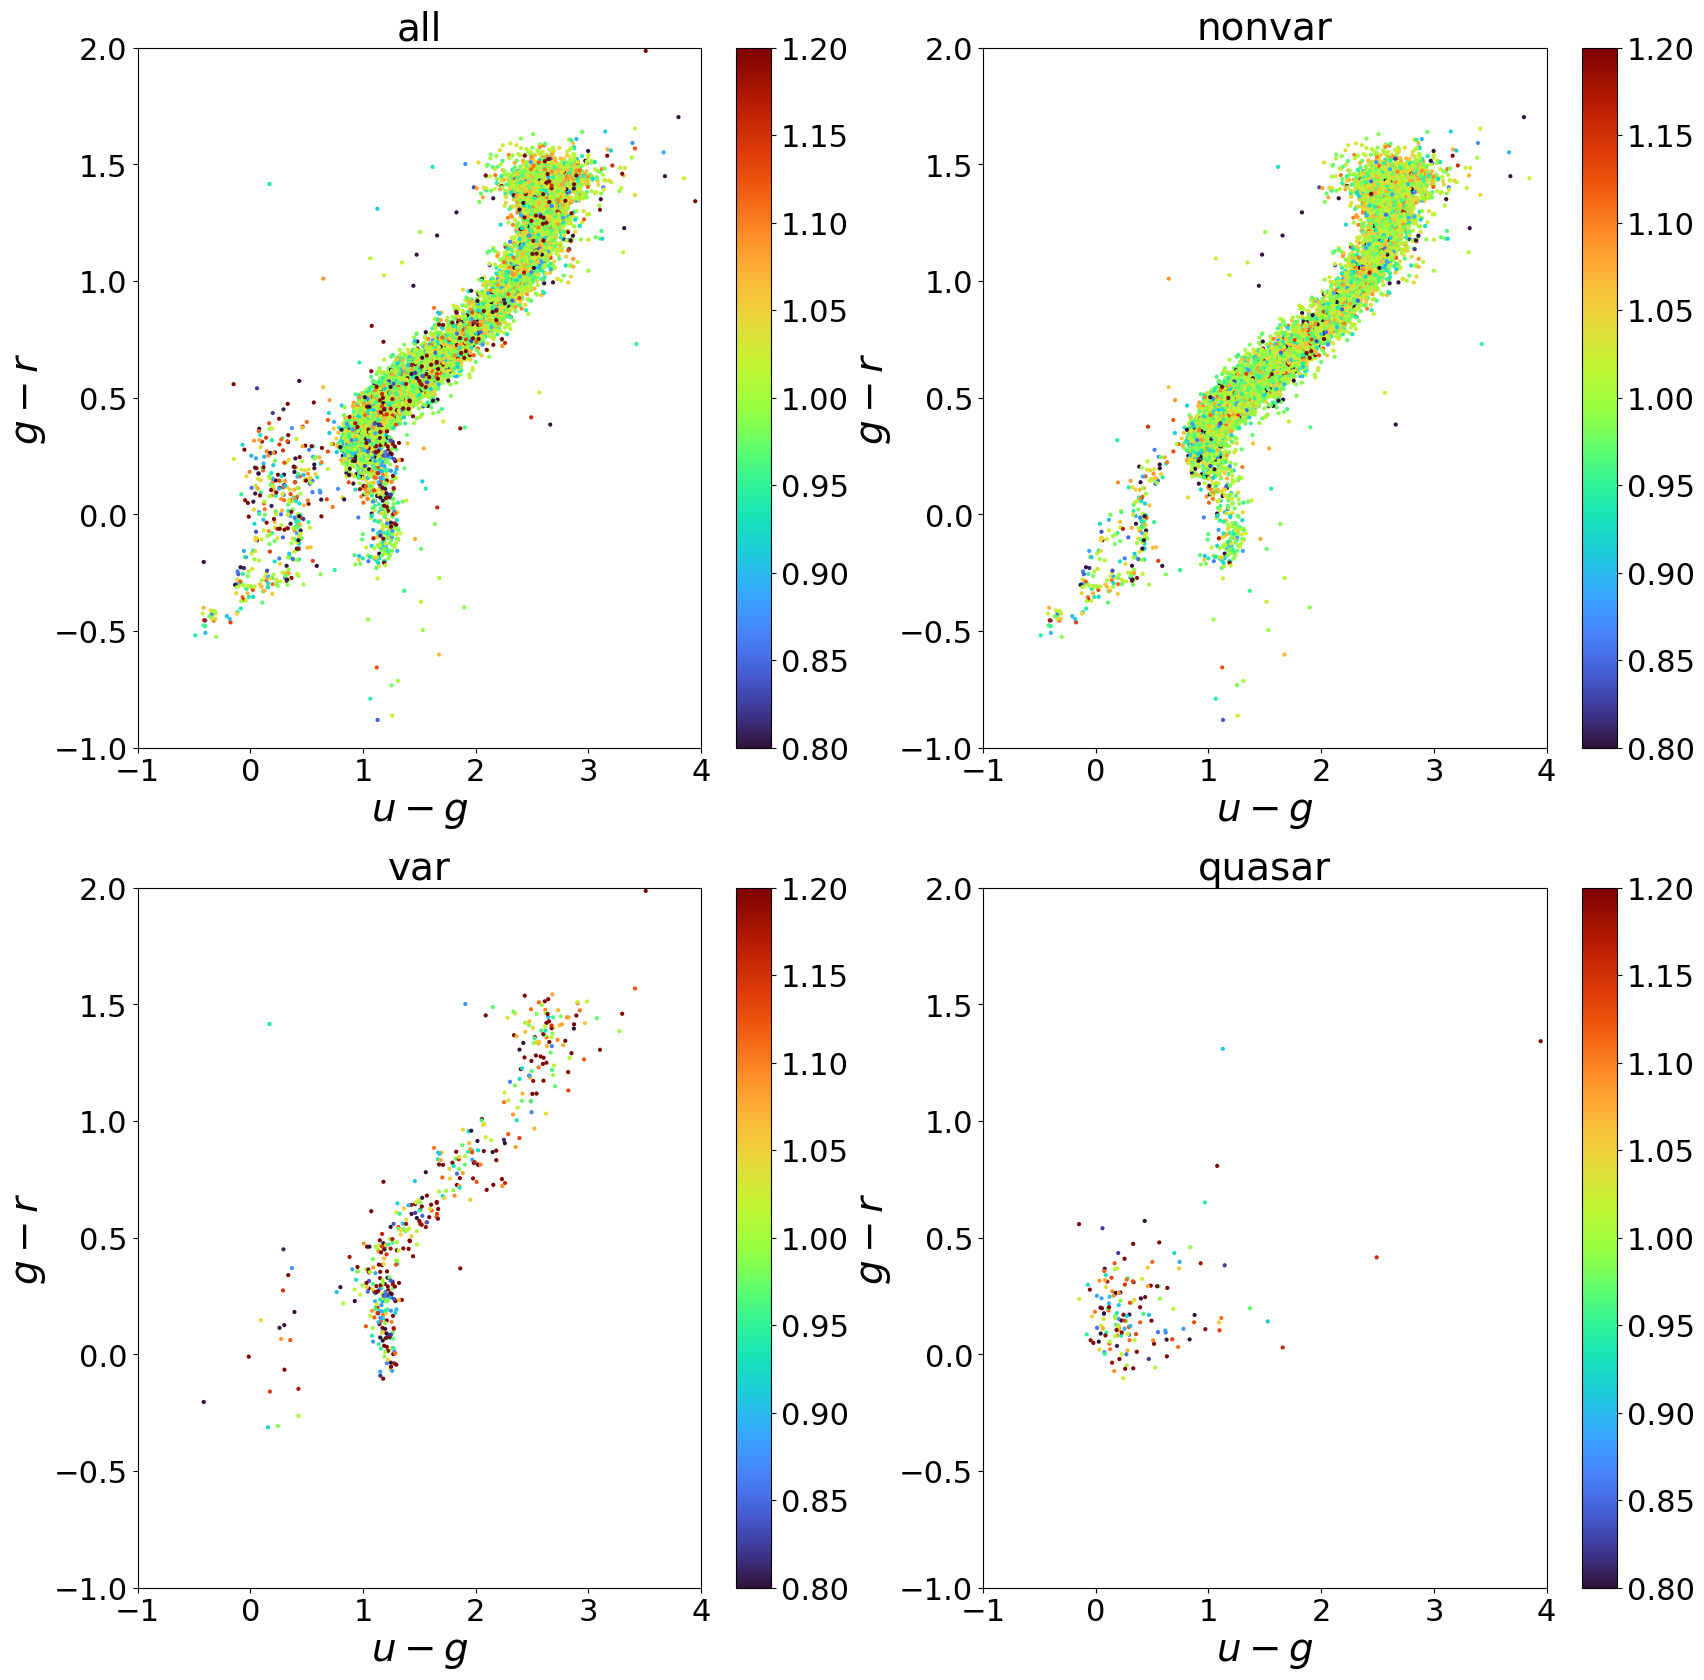

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

S_cc = 4
W_MAX = 1.2
W_MIN = 0.8

for i in (0, 1):
    for j in (0, 1):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(TITLES[i][j])

unambi_subset = pd.concat([nonvar_subset, var_subset, quasar_subset])

sc = ax[0][0].scatter(uMg(unambi_subset), gMr(unambi_subset), s=S_cc, label='all',
                      cmap='turbo', c=unambi_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

sc = ax[0][1].scatter(uMg(nonvar_subset), gMr(nonvar_subset), s=S_cc, label='all',
                      cmap='turbo', c=nonvar_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

sc = ax[1][0].scatter(uMg(var_subset), gMr(var_subset), s=S_cc, label='all',
                      cmap='turbo', c=var_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

sc = ax[1][1].scatter(uMg(quasar_subset), gMr(quasar_subset), s=S_cc, label='all',
                      cmap='turbo', c=quasar_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

# plt.scatter(uMg(nonvar_subset), gMr(nonvar_subset), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
# plt.scatter(uMg(var_subset),    gMr(var_subset),    c=C_BLUE,    s=S, label='var',    alpha=AV)
# plt.scatter(uMg(quasar_subset), gMr(quasar_subset), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.show()

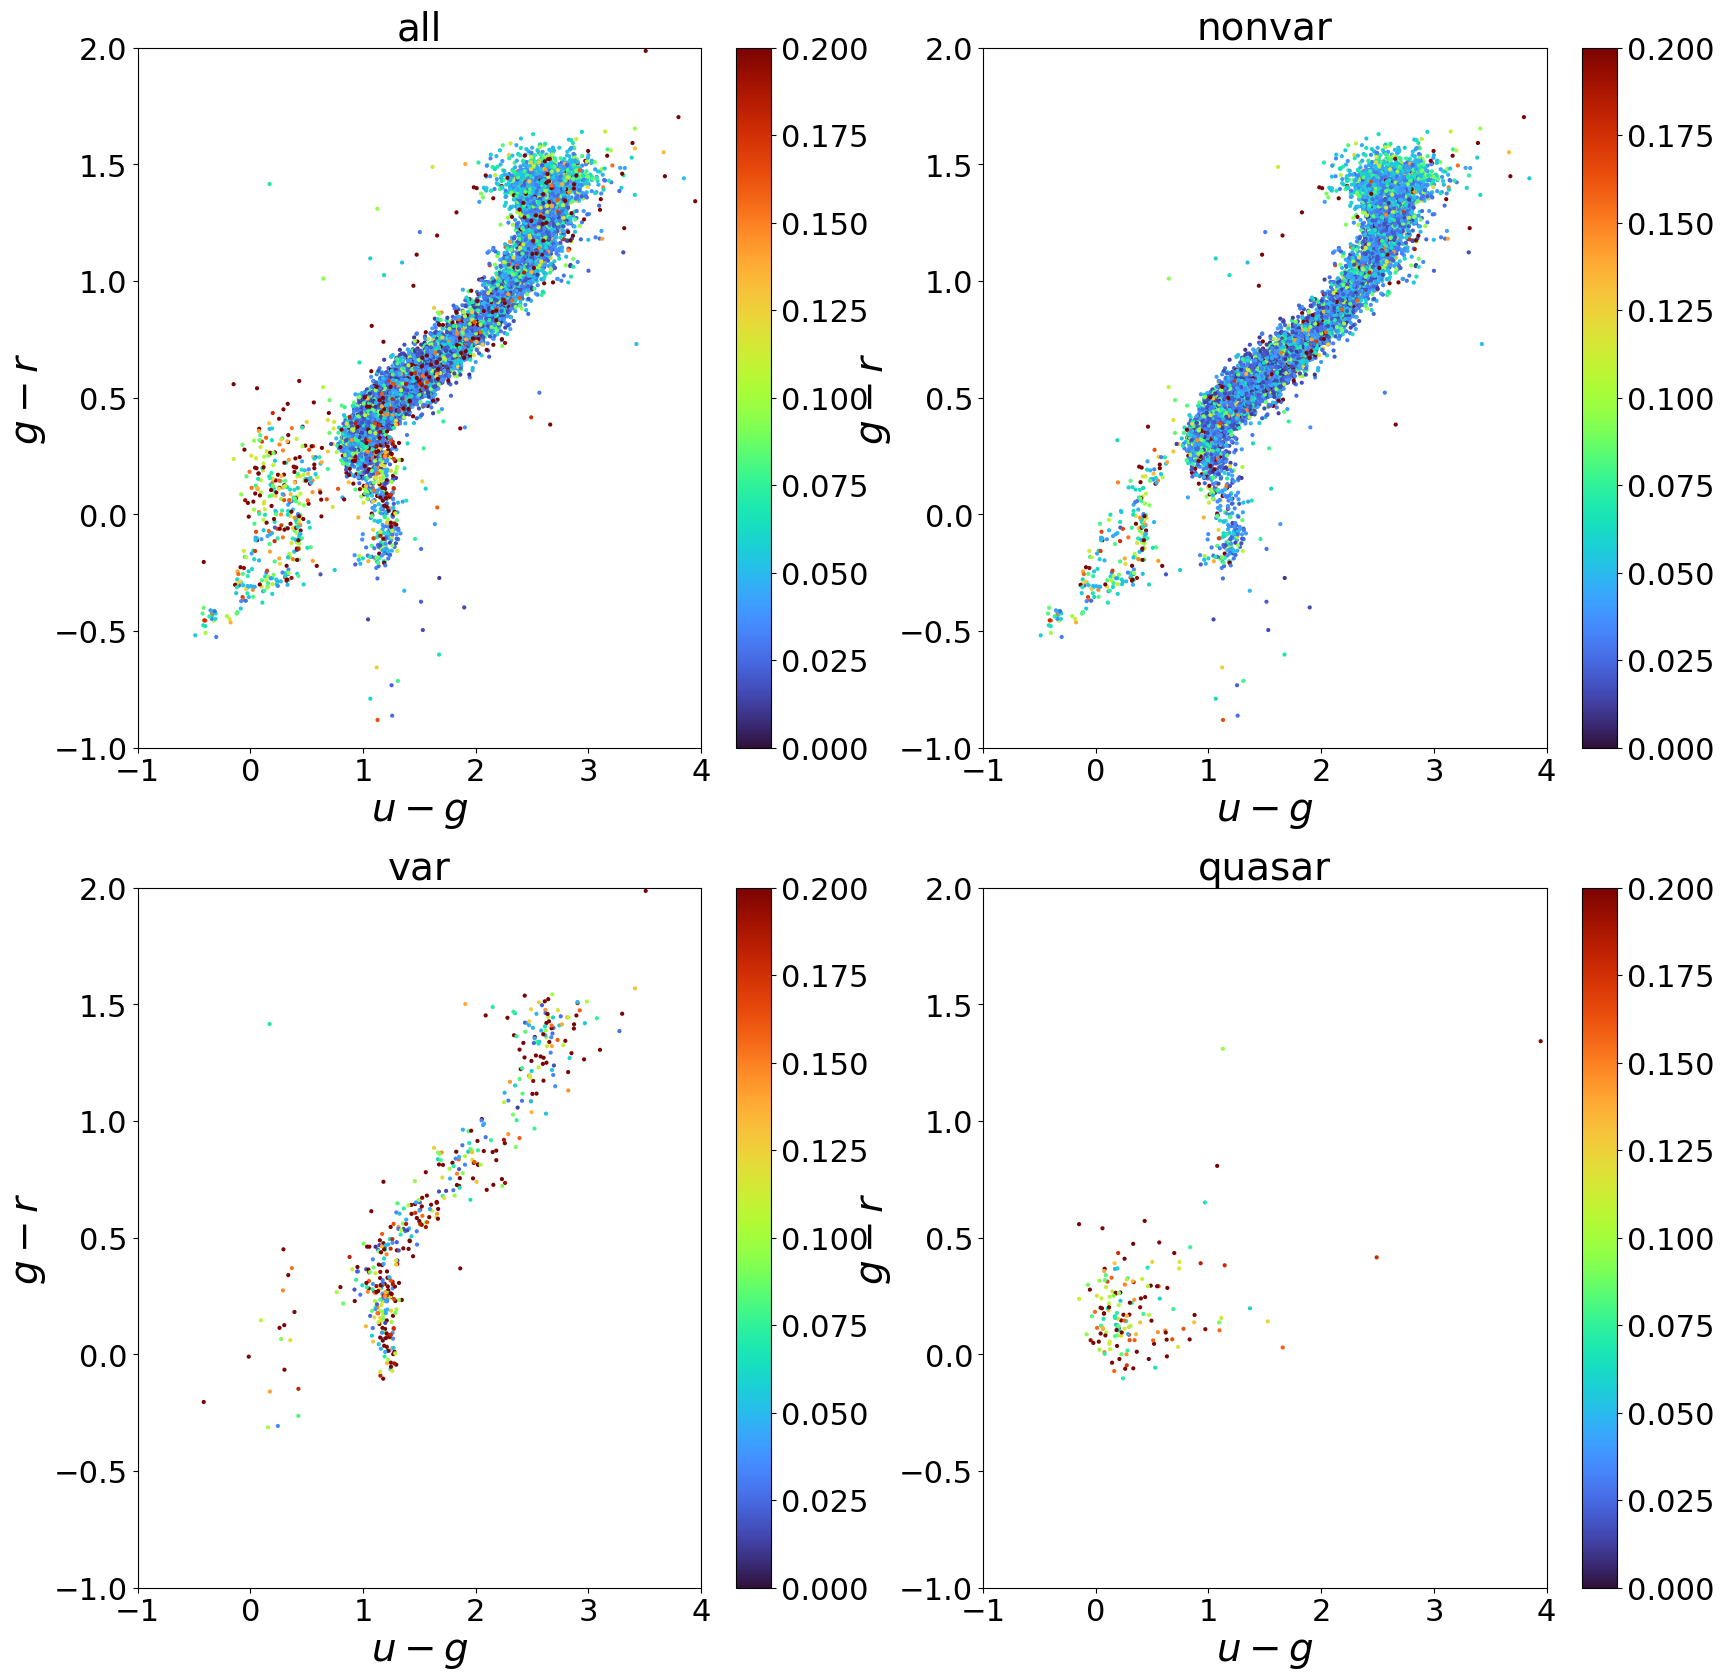

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for i in (0, 1):
    for j in (0, 1):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(TITLES[i][j])

unambi_subset = pd.concat([nonvar_subset, var_subset, quasar_subset])

D_MAX = 0.2
CMAP = 'turbo'

sc = ax[0][0].scatter(uMg(unambi_subset), gMr(unambi_subset), s=S_cc, label='all', alpha=1,
                      cmap=CMAP, c=(unambi_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=D_MAX)
plt.colorbar(sc)

sc = ax[0][1].scatter(uMg(nonvar_subset), gMr(nonvar_subset), s=S_cc, label='all', alpha=1,
                      cmap=CMAP, c=(nonvar_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=D_MAX)
plt.colorbar(sc)

sc = ax[1][0].scatter(uMg(var_subset), gMr(var_subset), s=S_cc, label='all', alpha=1,
                      cmap=CMAP, c=(var_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=D_MAX)
plt.colorbar(sc)

sc = ax[1][1].scatter(uMg(quasar_subset), gMr(quasar_subset), s=S_cc, label='all', alpha=1,
                      cmap=CMAP, c=(quasar_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=D_MAX)
plt.colorbar(sc)

plt.show()

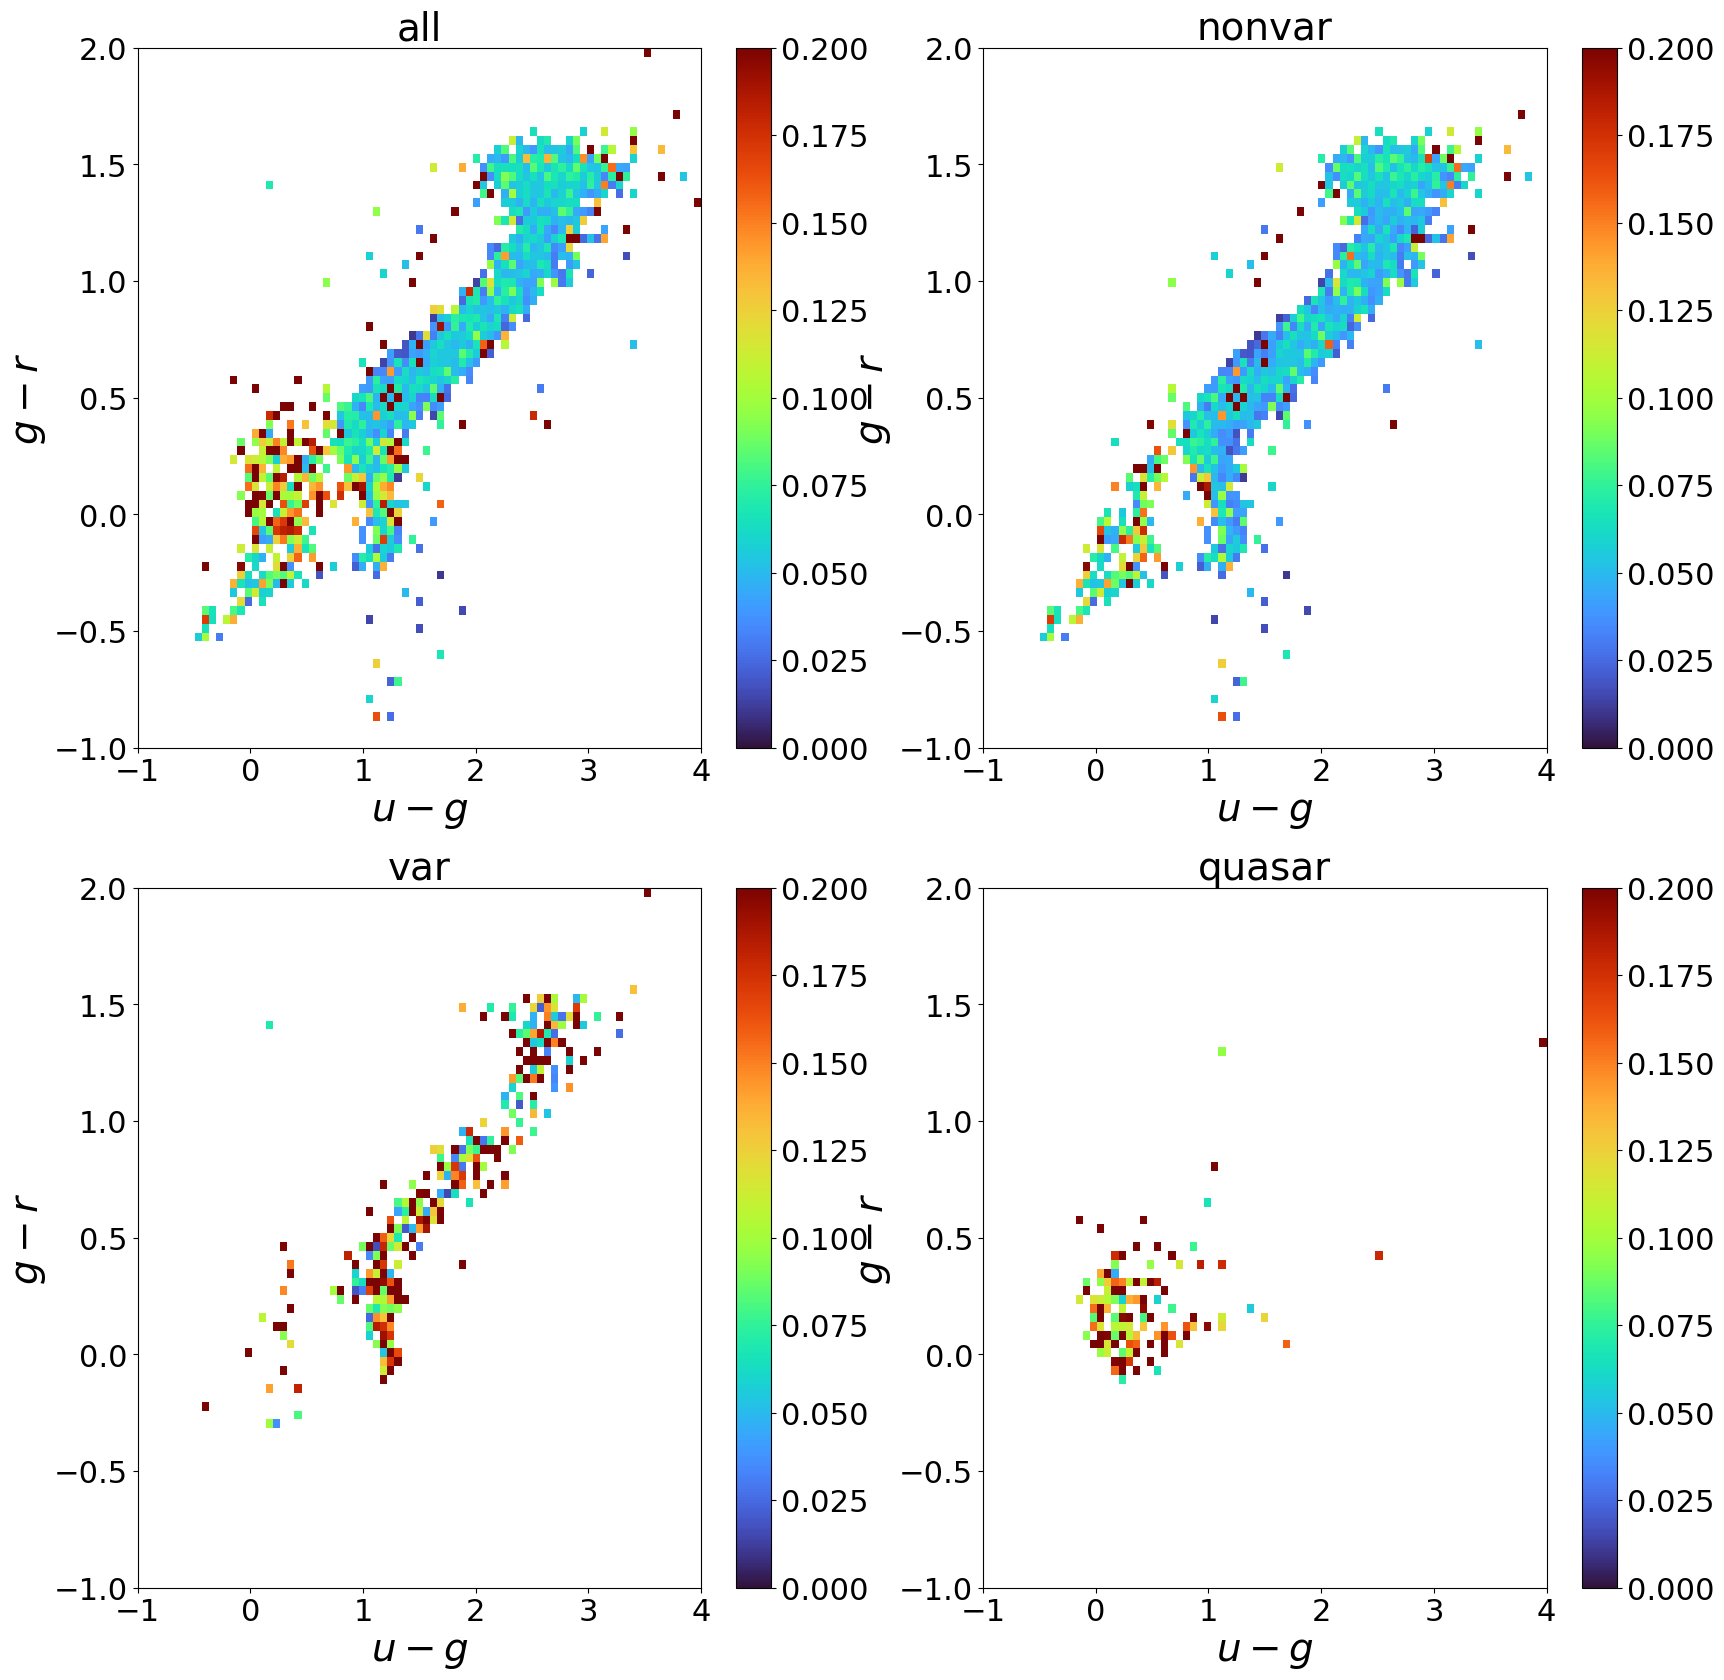

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

MIN_uMg = -1
MAX_uMg = 4
MIN_gMr = -1
MAX_gMr = 2
N_BINS = 80

bins_uMg = np.linspace(MIN_uMg, MAX_uMg, N_BINS)
bins_gMr = np.linspace(MIN_gMr, MAX_gMr, N_BINS)

# all
counts, _, _ = np.histogram2d(uMg(unambi_subset), gMr(unambi_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(unambi_subset), gMr(unambi_subset), bins=(bins_uMg, bins_gMr),
                              weights=(unambi_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[0][0].pcolormesh(bins_uMg, bins_gMr, mD, cmap=CMAP,
                           vmin=0, vmax=D_MAX)
fig.colorbar(mesh)

# nonvar
counts, _, _ = np.histogram2d(uMg(nonvar_subset), gMr(nonvar_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(nonvar_subset), gMr(nonvar_subset), bins=(bins_uMg, bins_gMr),
                              weights=(nonvar_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[0][1].pcolormesh(bins_uMg, bins_gMr, mD, cmap=CMAP,
                           vmin=0, vmax=D_MAX)
fig.colorbar(mesh)

# var
counts, _, _ = np.histogram2d(uMg(var_subset), gMr(var_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(var_subset), gMr(var_subset), bins=(bins_uMg, bins_gMr),
                              weights=(var_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[1][0].pcolormesh(bins_uMg, bins_gMr, mD, cmap=CMAP,
                           vmin=0, vmax=D_MAX)
fig.colorbar(mesh)

# quasar
counts, _, _ = np.histogram2d(uMg(quasar_subset), gMr(quasar_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(quasar_subset), gMr(quasar_subset), bins=(bins_uMg, bins_gMr),
                              weights=(quasar_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[1][1].pcolormesh(bins_uMg, bins_gMr, mD, cmap=CMAP,
                           vmin=0, vmax=D_MAX)
fig.colorbar(mesh)
    

for i in (0, 1):
    for j in (0, 1):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(TITLES[i][j])

# plt.scatter(uMg(nonvar_subset), gMr(nonvar_subset), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
# plt.scatter(uMg(var_subset),    gMr(var_subset),    c=C_BLUE,    s=S, label='var',    alpha=AV)
# plt.scatter(uMg(quasar_subset), gMr(quasar_subset), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.show()

# second mode

In [6]:
w_075_subset = nonvar_subset[(nonvar_subset[W_MEDIAN_COLNAME] < 0.77) & (nonvar_subset[W_MEDIAN_COLNAME] > 0.72) & (nonvar_subset[SGW_COLNAME] < 0.04)]
for objId in w_075_subset['objId']:
    print(objId)

1237656567042801734
1237663456705839238
1237663542606037272
1237663456705839294
1237663456704856307
1237663456704922066
1237657189815746724
1237656567042670631
1237663456705118457
1237656567042801765
1237663456705773612
1237657189815026244
1237656567042802188
1237657189815943438
1237663456704856194
1237657189815025894
1237663456704987259
1237656567042933063
1237656567586160705
1237657189815943175
1237663456705249449
1237656567042867322
1237663542606758031
1237663456704921795
1237656567043522730
1237656567043522645
1237656567042932752
1237663456704921812
1237657189815091311
1237657189815746666
1237657189814960210
1237663542605840627
1237663542605643971
1237663542606692519
1237663542605971688
1237663542606823965
1237663542606496012
1237663542605709375
1237663542605709456
1237663542606692568
1237663542606037398
1237663542606757946
1237663542605971884
1237663542606626965
1237663238741295309
1237663457242120356
1237666301094920400
1237663543679451606
1237663543142711359
1237663543142842541


In [7]:
w_075_subset = nonvar_subset[(nonvar_subset[W_MEDIAN_COLNAME] < 0.77) & (nonvar_subset[W_MEDIAN_COLNAME] > 0.72) & (nonvar_subset[SGW_COLNAME] < 0.04)]
for objId in w_075_subset['source_id']:
    print(objId)

2686786134260762112
2686660927373914880
2686913948191911680
2687036513673968128
2687552833167685760
2687539364150195584
2686664290332769536
2686777196433969152
2686817470342262144
2686784210115385728
2686674838772492672
2686807261204776448
2686737549590657152
2686983153000273280
2687556582674202112
2686779708989759872
2687559778129811328
2686734147976489600
2629989658536802432
2686607429261253632
2686895707469670784
2686739989132078080
2687044583917133312
2687564034442408704
2686594574423495296
2686594441280147328
2686733971882203392
2687539089272277504
2686802695654710016
2686665114966497024
2687533767807869824
2687572456873263360
2687582386837717760
2687056992078066304
2686912608162113536
2687043351262027392
2686867528185059328
2687582726140246528
2687583280190898176
2687060251957905920
2686914639686125184
2687045722083880192
2687664369173275008
2687054896133998848
3263672599427121024
2687676979197325568
3269684320987088768
2687956014632611072
2687736421544968832
2687692746021616000


In [8]:
w_075_subset

Unnamed: 0            source_id  clean_sdssdr13_oid  \
134           134  2686786134260762112            59149313   
455           455  2686660927373914880            63053574   
749           749  2686913948191911680            65281899   
1056         1056  2687036513673968128            63706147   
1090         1090  2687552833167685760            63087135   
...           ...                  ...                 ...   
21094       21094  2688182342229328640            81203167   
21348       21348  2688001197688582016            79978204   
21690       21690  2687472092077228160            79353243   
21701       21701  2688382900022145664            83528898   
21895       21895  2688392211511534848            84176343   

       original_ext_source_id  angular_distance     gaia_ra  gaia_dec  \
134       1237656567042801734          0.037165  322.712300 -1.098509   
455       1237663456705839238          0.025318  324.319531 -0.768899   
749       1237663542606037272          0.068628  322.913110 -0.589116   
1056      1237663456705839294          0.014302  324.360555 -0.714451   
1090      1237663456704856307          0.009269  322.070875 -0.766022   
...                       ...               ...         ...       ...   
21094     1237678617401622544          0.017038  322.911012  0.702520   
21348     1237663458315600260          0.035055  322.320822  0.603847   
21690     1237663458316452178          0.045675  324.344273  0.552678   
21701     1237663458852733072          0.061789  322.914936  0.900955   
21895     1237663458852536878          0.059272  322.561985  0.956184   

       phot_g_mean_mag      bp_g      g_rp  ...  quasar_match_id  \
134          16.375881  0.431028  0.601239  ...              NaN   
455          15.620714  0.290489  0.467399  ...              NaN   
749          17.385490  0.428305  0.573111  ...              NaN   
1056         15.022306  0.587304  0.724269  ...              NaN   
1090         15.813997  0.125193  0.206946  ...              NaN   
...                ...       ...       ...  ...              ...   
21094        16.104480  0.287594  0.464943  ...              NaN   
21348        15.911074  0.705782  0.816551  ...              NaN   
21690        15.590953  0.411109  0.586571  ...              NaN   
21701        16.300472  0.400381  0.565095  ...              NaN   
21895        17.257006  0.420706  0.573206  ...              NaN   

       quasar_match_num    w_mean     w_std  w_median    w_rrms    D_mean  \
134                   0  0.754104  0.015389  0.752858  0.008696  0.245896   
455                   0  0.726772  0.013396  0.724681  0.013208  0.273228   
749                   0  0.739772  0.031357  0.734319  0.033788  0.260228   
1056                  0  0.737285  0.039114  0.723720  0.017515  0.262845   
1090                  0  0.723883  0.018762  0.722642  0.015486  0.276117   
...                 ...       ...       ...       ...       ...       ...   
21094                 0  0.763828  0.035320  0.762373  0.017820  0.236172   
21348                 0  0.773665  0.037585  0.763490  0.013389  0.227770   
21690                 0  0.745958  0.010672  0.745104  0.007325  0.254042   
21701                 0  0.726892  0.013631  0.728580  0.012663  0.273108   
21895                 0  0.717125  0.045954  0.732588  0.024607  0.282875   

          D_std  D_median    D_rrms  
134    0.015389  0.247142  0.008696  
455    0.013396  0.275319  0.013208  
749    0.031357  0.265681  0.033788  
1056   0.038225  0.276280  0.017515  
1090   0.018762  0.277358  0.015486  
...         ...       ...       ...  
21094  0.035320  0.237627  0.017820  
21348  0.027584  0.236510  0.013389  
21690  0.010672  0.254896  0.007325  
21701  0.013631  0.271420  0.012663  
21895  0.045954  0.267412  0.024607  

[136 rows x 48 columns]

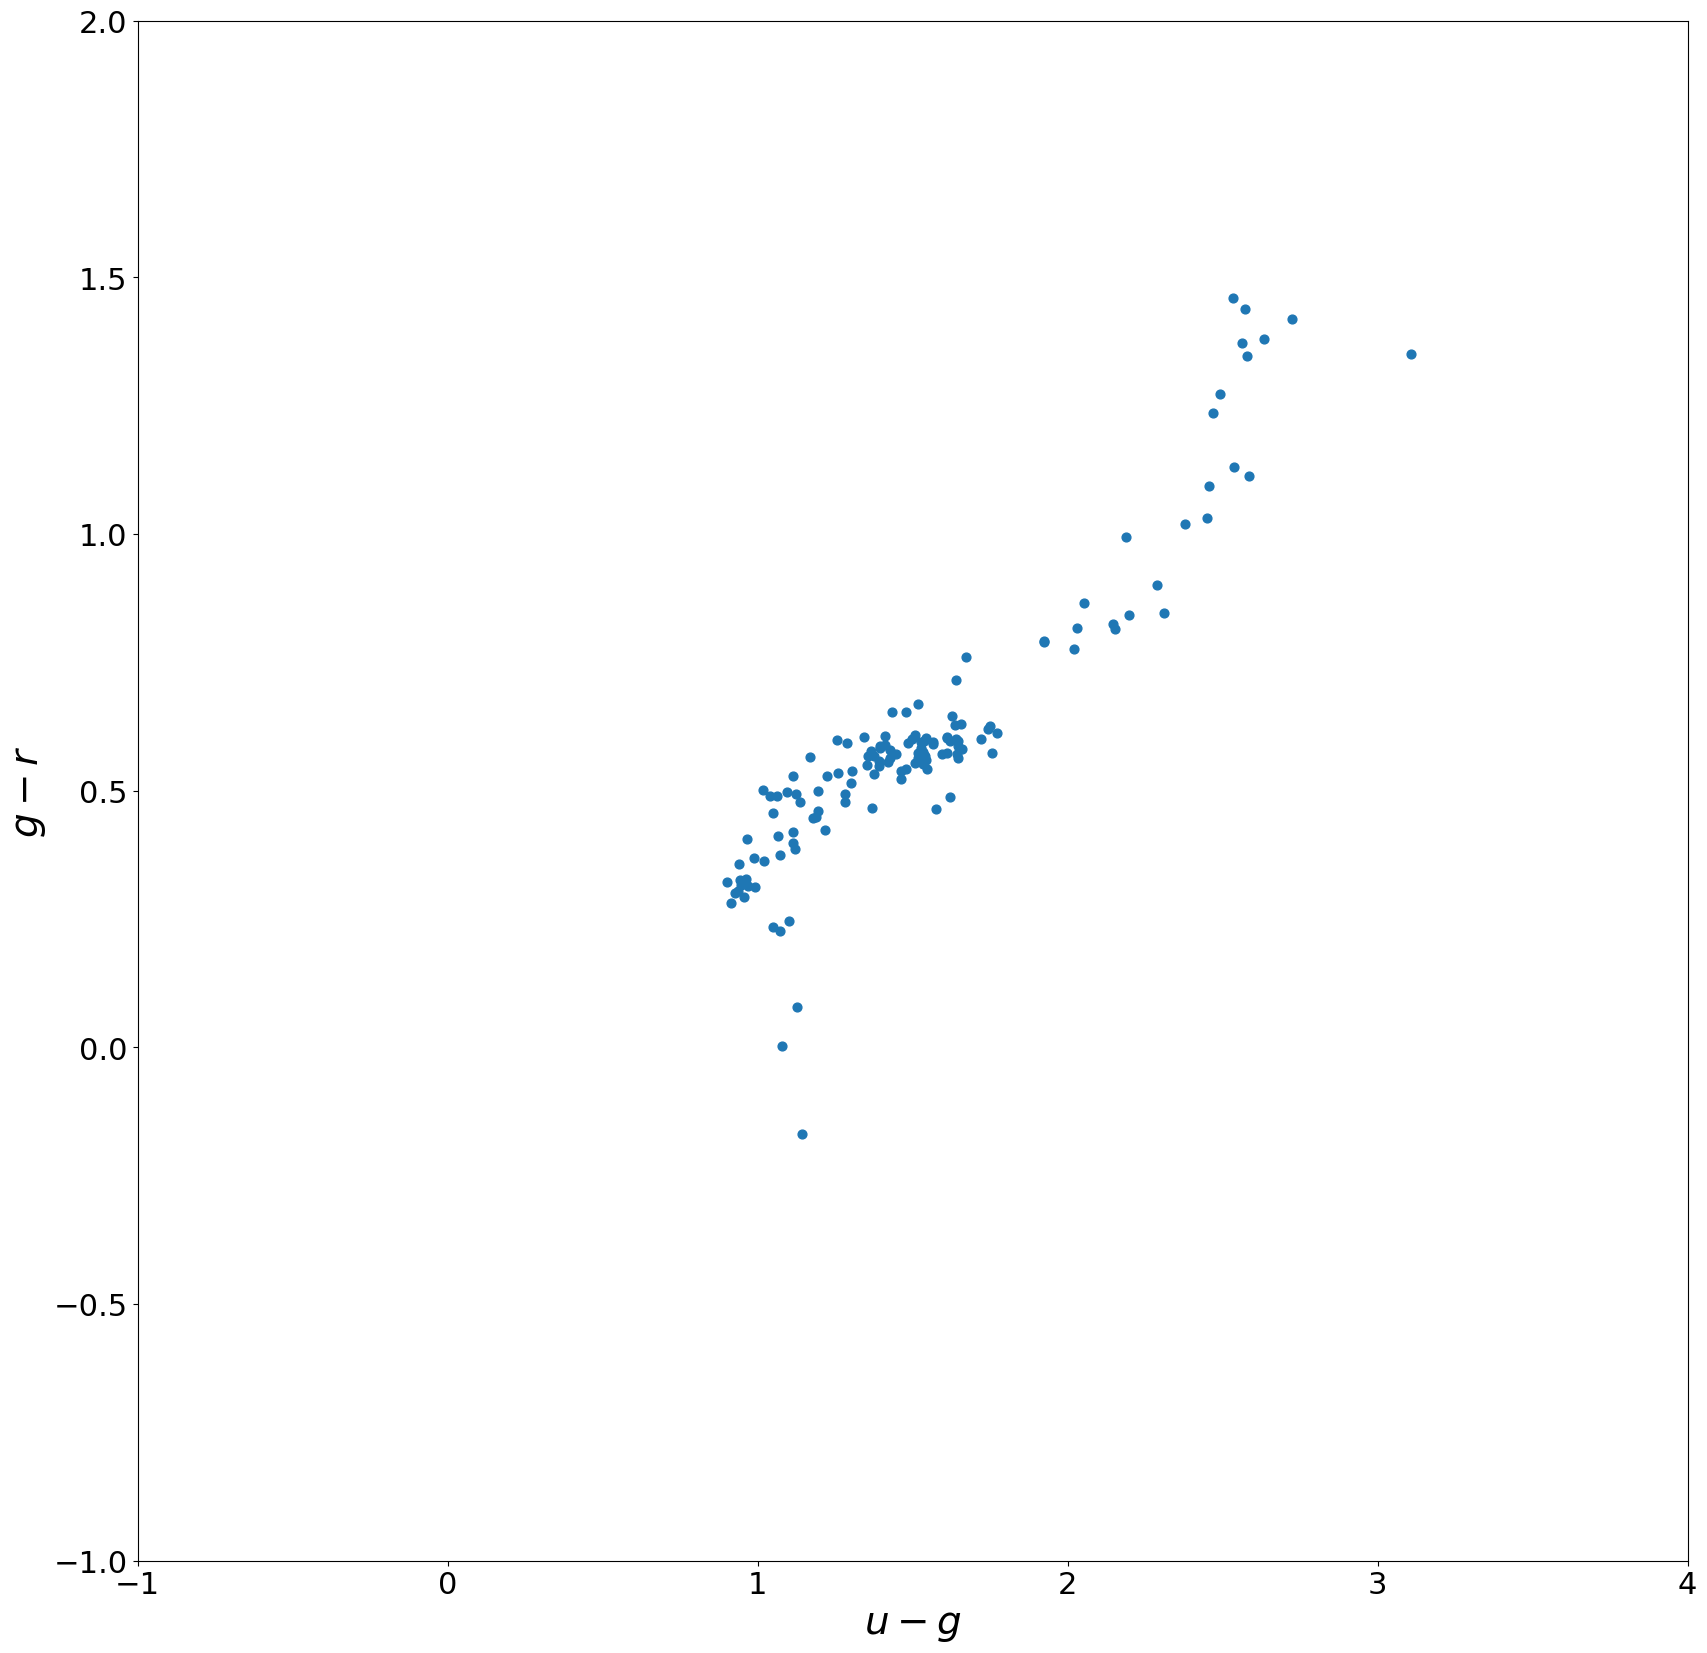

In [228]:
plt.figure(figsize=(20, 20))

plt.xlim(-1, 4)
plt.ylim(-1, 2)

plt.xlabel('$u-g$')
plt.ylabel('$g-r$')

plt.scatter(uMg(w_075_subset), gMr(w_075_subset), s=S)

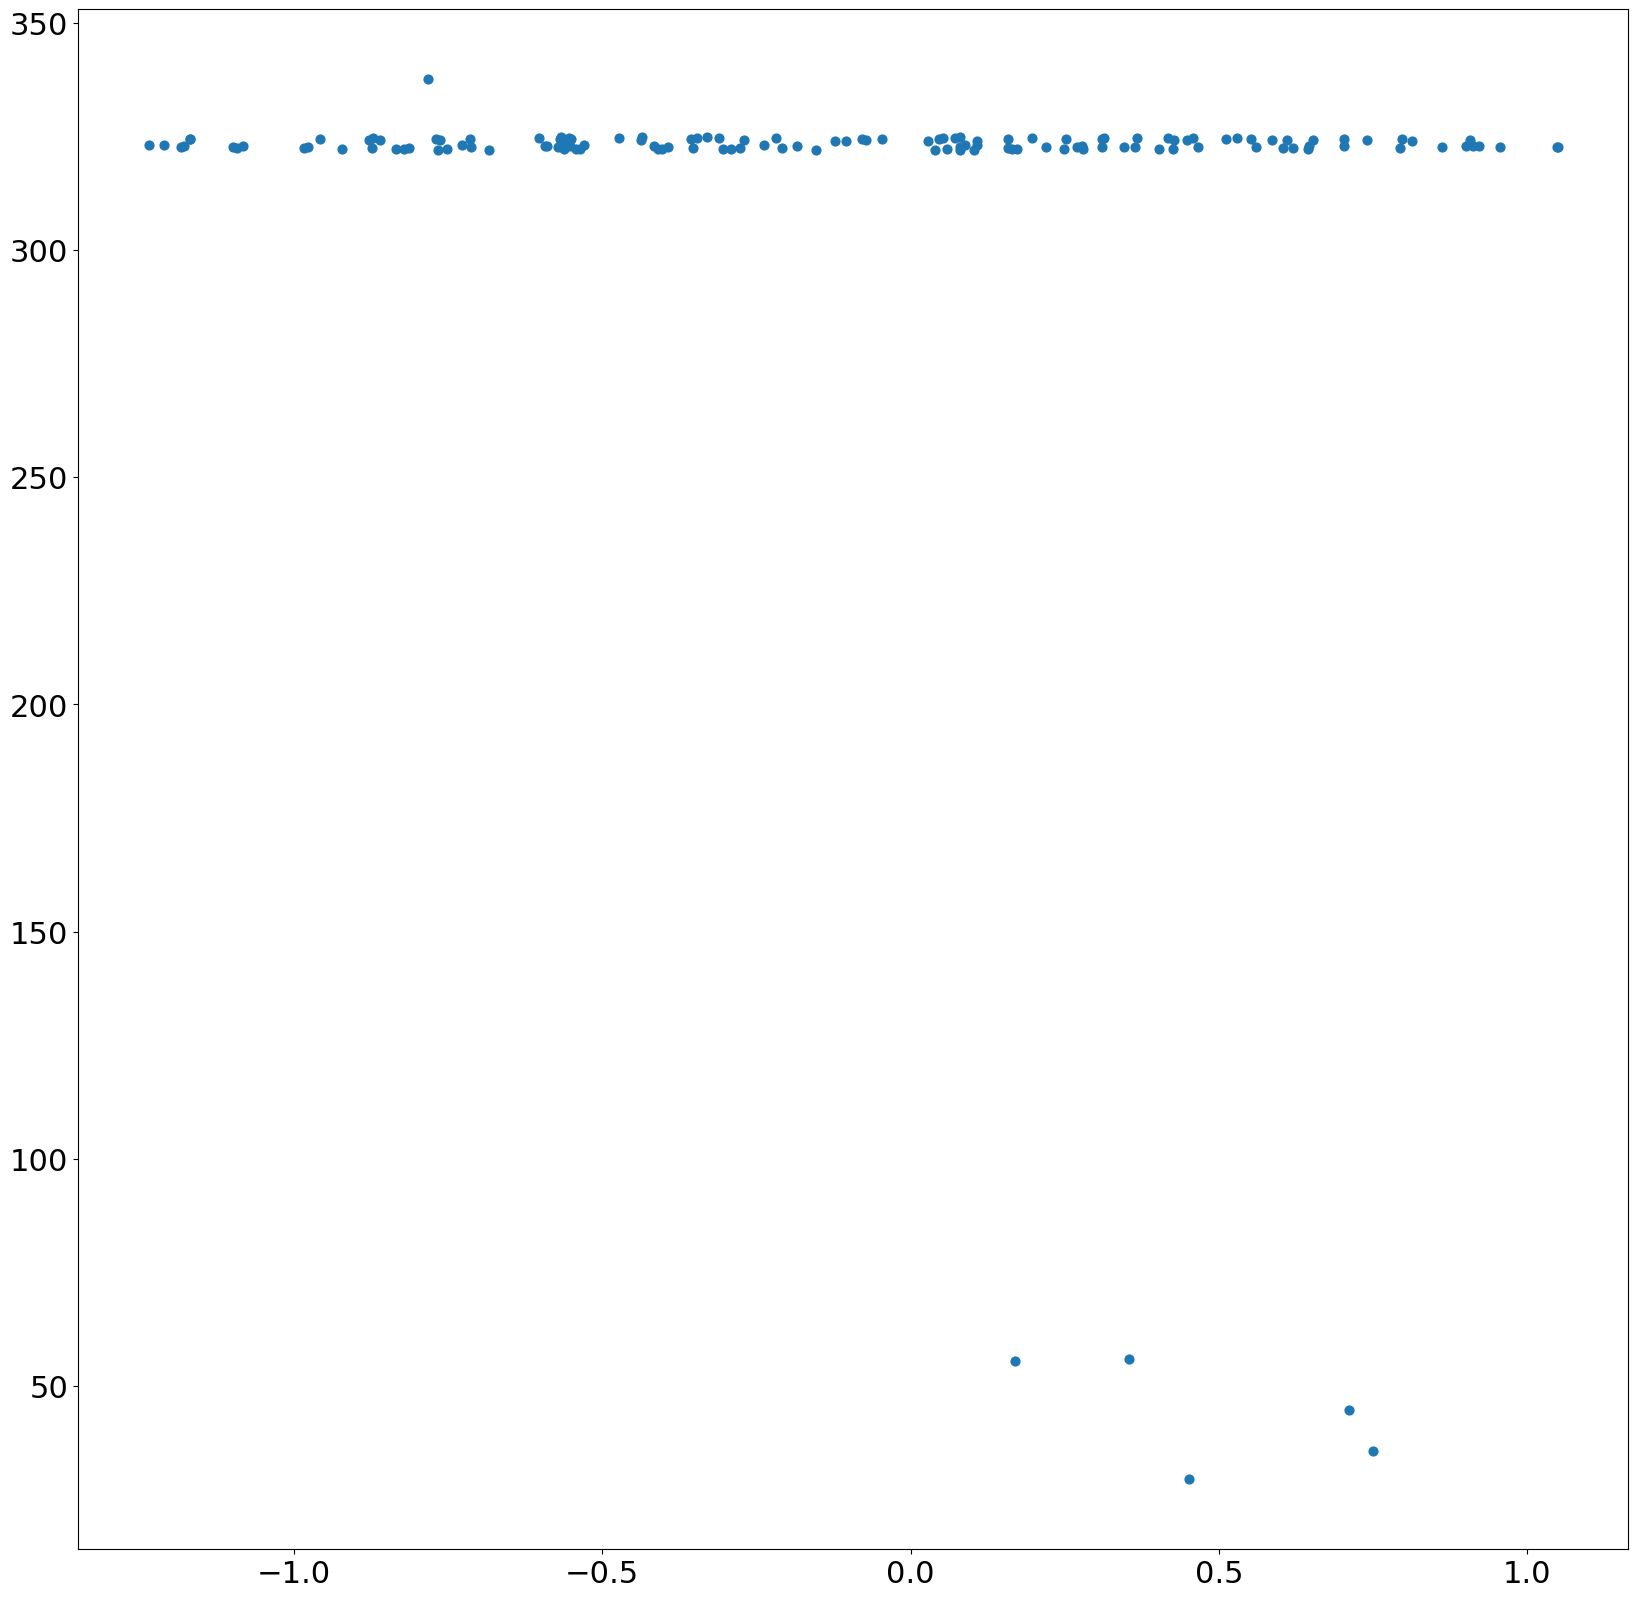

In [213]:
plt.figure(figsize=(20, 20))

plt.scatter(w_075_subset['gaia_dec'], w_075_subset['gaia_ra'], s=S)

In [215]:
list(w_075_subset['source_id'])

[2686786134260762112,
 2686660927373914880,
 2686913948191911680,
 2687036513673968128,
 2687552833167685760,
 2687539364150195584,
 2686664290332769536,
 2686777196433969152,
 2686817470342262144,
 2686784210115385728,
 2686674838772492672,
 2686807261204776448,
 2686737549590657152,
 2686983153000273280,
 2687556582674202112,
 2686779708989759872,
 2687559778129811328,
 2686734147976489600,
 2629989658536802432,
 2686607429261253632,
 2686895707469670784,
 2686739989132078080,
 2687044583917133312,
 2687564034442408704,
 2686594574423495296,
 2686594441280147328,
 2686733971882203392,
 2687539089272277504,
 2686802695654710016,
 2686665114966497024,
 2687533767807869824,
 2687572456873263360,
 2687582386837717760,
 2687056992078066304,
 2686912608162113536,
 2687043351262027392,
 2686867528185059328,
 2687582726140246528,
 2687583280190898176,
 2687060251957905920,
 2686914639686125184,
 2687045722083880192,
 2687664369173275008,
 2687054896133998848,
 3263672599427121024,
 268767697

In [217]:
from astroquery.gaia import Gaia

query = 'SELECT gs.source_id, gs.parallax, gs.pmra, gs.pmdec FROM gaiadr3.gaia_source gs \
         WHERE (gs.ra < 60 OR gs.ra > 300) AND (gs.dec > -1.67 AND gs.dec < 1.67) \
         AND gs.source_id IN ({})'.format(str(list(w_075_subset.source_id))[1:-1])

pdat = Gaia.launch_job_async(query).get_results().to_pandas()

INFO: Query finished. [astroquery.utils.tap.core]


In [218]:
pdat

source_id  parallax      pmra      pmdec
0         98754183803776  0.263292  0.082765  -2.801546
1    2501473791679968256  1.087927  5.079987 -11.176574
2    2507832984682927104  0.477292  5.710709  -1.377583
3    2629989658536802432  0.902646  3.516580 -17.295591
4    2686594441280147328  0.624372  4.138652  -9.760126
..                   ...       ...       ...        ...
131  2688392211511534848  0.321438 -7.131510  -5.224855
132  2688399152178486016  0.608379  7.209241  -2.843678
133  2688399942452480512  0.713719  3.672913  -6.254895
134  3263672599427121024  0.396241  9.330526  -0.377793
135  3269684320987088768  0.296477  3.260536  -0.533708

[136 rows x 4 columns]

In [221]:
w_075_subset = pd.merge(w_075_subset, pdat, left_on='source_id', right_on='source_id')

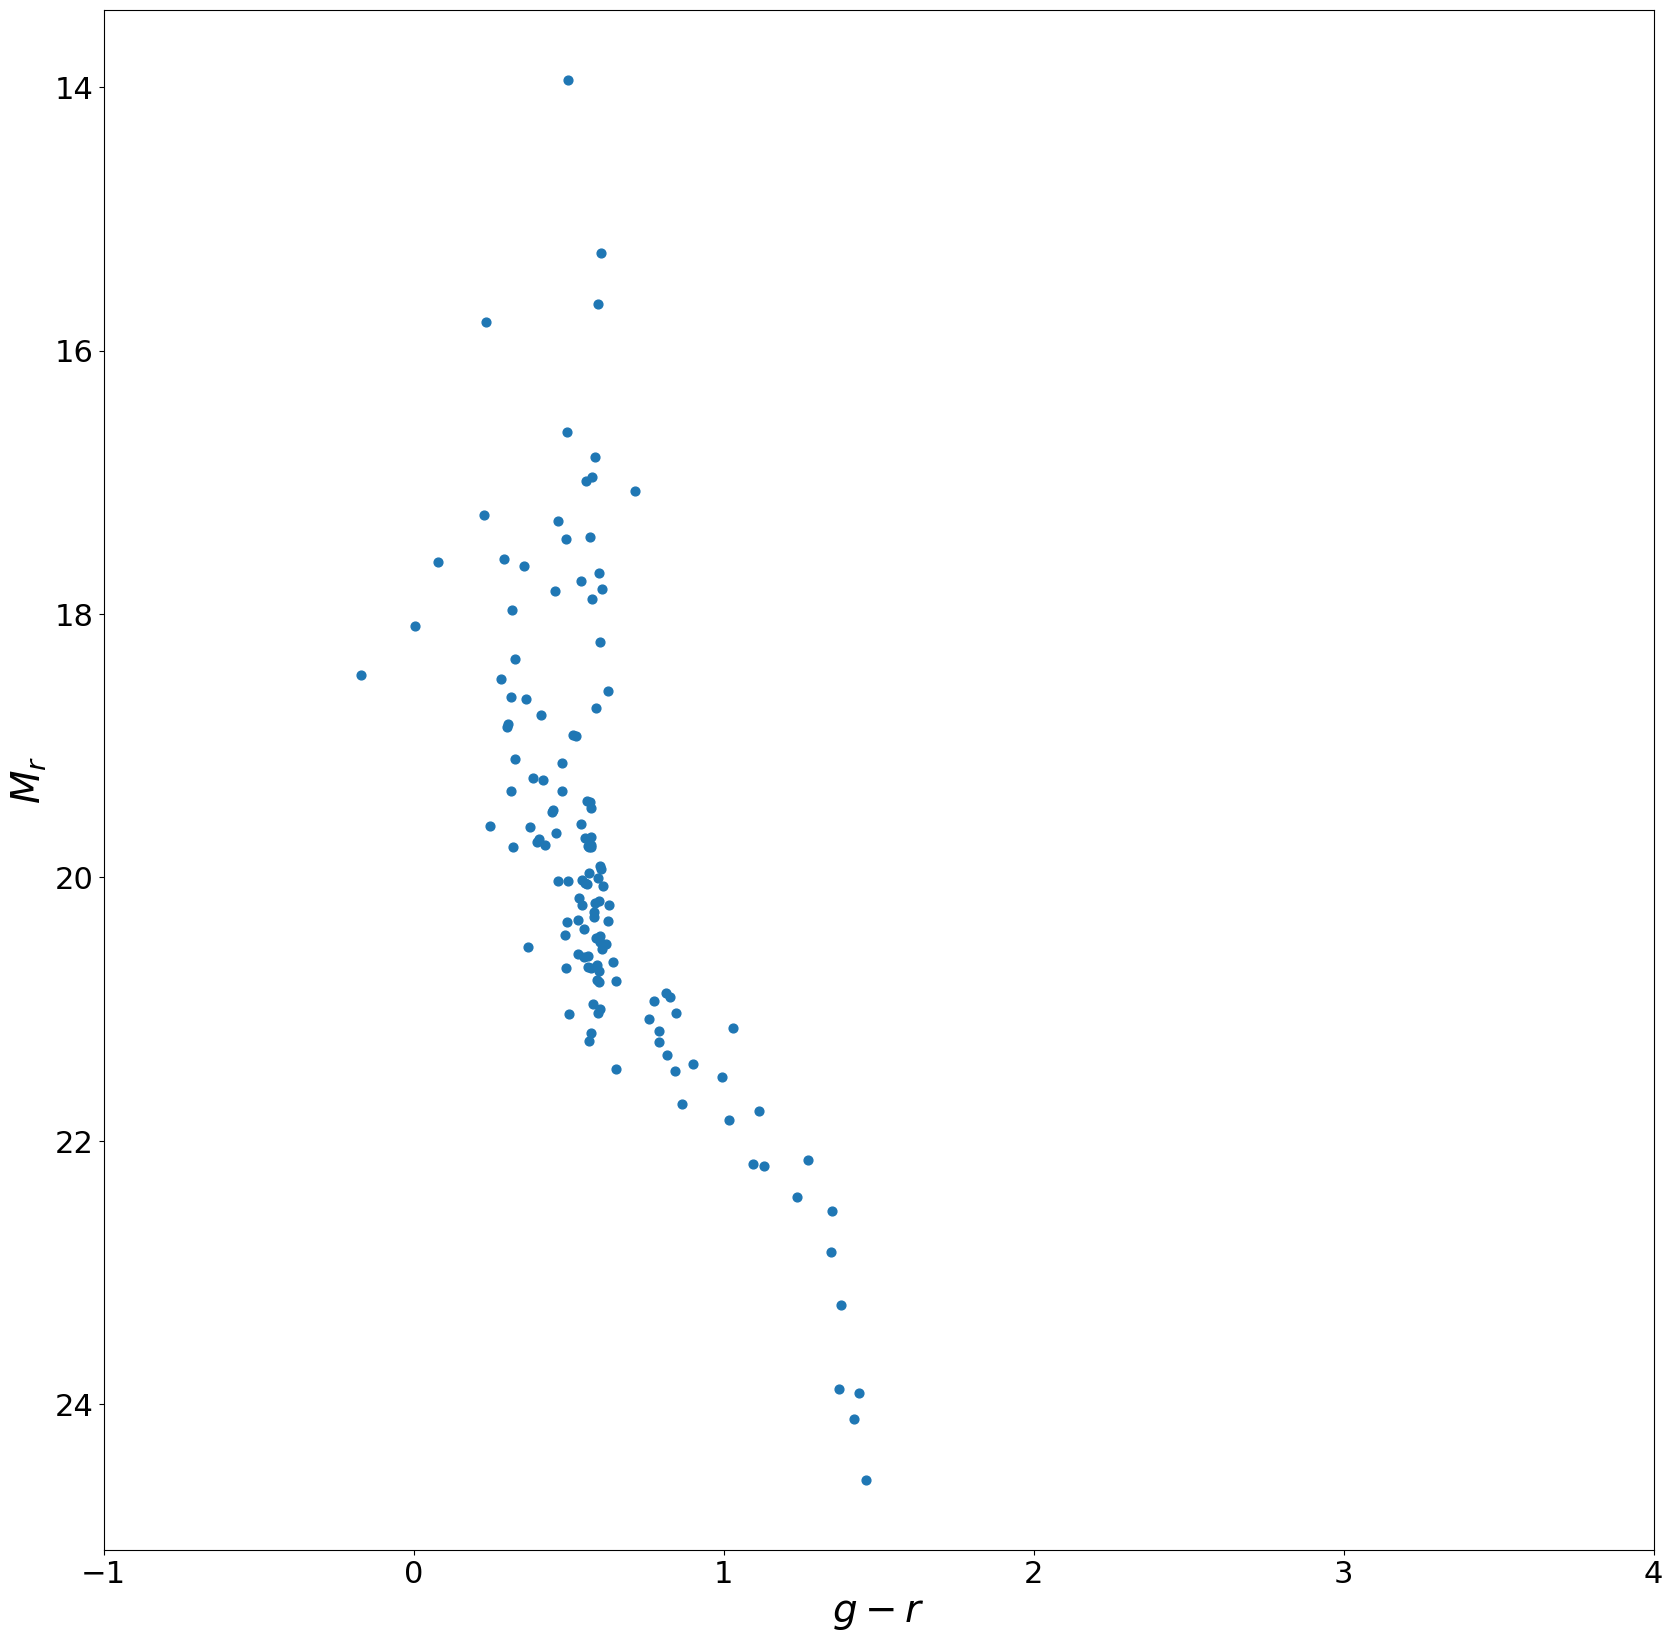

In [229]:
mag_abs = w_075_subset[R_MAG_COLNAME] + 5 + 5*np.log10(w_075_subset['parallax'])

plt.figure(figsize=(20, 20))

plt.xlim(-1, 4)
plt.gca().invert_yaxis()

plt.xlabel('$g-r$')
plt.ylabel('$M_r$')

plt.scatter(gMr(w_075_subset), mag_abs, s=S)